<a href="https://colab.research.google.com/github/sepamir1992/network_updating_RL/blob/main/Copy_of_A3C_backup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

jupyter notebook --NotebookApp.allow_origin='https://colab.
research.google.com' --port=8888 --NotebookApp.port_retries=0


Main Version but increase the number of rtt samples

In [ ]:
import json
import random
import time
from collections import deque
import gym
import keras
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
#import PIL
import matplotlib.pyplot as plt

import matplotlib.animation as animation
from tensorflow.keras.models import Model, load_model

In [ ]:
from gym import Env
from gym.spaces import Discrete, Box, Dict
import pandas as pd
import csv
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#import wandb
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
import sys

import gym
import argparse
import numpy as np
from threading import Thread, Lock
from multiprocessing import cpu_count
import string
import os

tf.keras.backend.set_floatx('float64')
#wandb.init(name='DQN', project="deep-rl-tf2")

In [ ]:
parser = argparse.ArgumentParser()
parser.add_argument('--gamma', type=float, default=0.99)
parser.add_argument('--update_interval', type=int, default=5)
parser.add_argument('--actor_lr', type=float, default=0.0005)
parser.add_argument('--critic_lr', type=float, default=0.001)
parser.add_argument("-f", required=False)

args = parser.parse_args()

CUR_EPISODE = 0

In [ ]:
import json
import random
import time
from collections import deque
import gym
import keras
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
#import PIL
import matplotlib.pyplot as plt

import matplotlib.animation as animation

from gym import Env
from gym.spaces import Discrete, Box, Dict
import pandas as pd
import csv
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
import random
import string
import os
import matplotlib.pyplot as plt

In [ ]:
rtt_cellular = []
file = open('rtt_cellular.txt', 'r')
for line in file:
  values = line.split()
  if 'time' in line:
    #print(values[6][5:])
    rtt_cellular.append(float(values[6][5:]))

In [ ]:
print(rtt_cellular)
print(len(rtt_cellular))

[75.8, 75.9, 75.8, 75.6, 75.8, 75.8, 75.8, 35.7, 32.3, 34.7, 34.6, 33.4, 26.9, 28.8, 29.6, 29.8, 34.2, 27.4, 27.9, 27.8, 33.7, 30.8, 32.8, 27.6, 31.6, 30.6, 32.6, 31.3, 32.5, 40.9, 31.0, 30.6, 31.6, 32.8, 30.2, 30.7, 29.2, 32.6, 33.4, 33.2, 32.8, 35.4, 32.5, 29.8, 32.0, 34.7, 27.5, 31.4, 33.8, 31.4, 30.8, 29.9, 28.0, 31.9, 31.3, 40.0, 36.2, 31.0, 28.0, 32.6, 37.0, 39.8, 29.4, 33.4, 30.9, 29.7, 32.9, 32.5, 36.1, 30.7, 31.4, 28.1, 31.9, 29.1, 31.0, 29.4, 31.0, 29.5, 31.0, 30.2, 33.0, 31.7, 34.0, 29.9, 35.8, 30.9, 30.9, 28.6, 33.8, 34.1, 32.2, 32.4, 31.7, 32.2, 36.2, 29.9, 34.6, 40.5, 35.3, 31.9, 31.4, 29.2, 28.4, 35.0, 31.7, 31.4, 41.6, 27.8, 27.7, 30.0, 34.1, 39.0, 36.3, 32.5, 30.7, 31.4, 27.8, 37.6, 29.4, 33.1, 27.1, 31.3, 30.1, 36.3, 29.7, 35.4, 31.4, 31.1, 31.6, 28.9, 31.8, 31.2, 34.4, 28.4, 31.5, 31.1, 36.0, 30.3, 30.9, 32.4, 27.8, 28.6, 31.2, 27.7, 30.3, 29.0, 31.5, 33.5, 31.0, 30.5, 28.1, 27.4, 29.1, 29.2, 37.5, 37.2, 34.0, 37.2, 31.9, 27.4, 28.8, 28.7, 28.2, 26.7, 28.3, 28.4, 33.

In [ ]:
rtt_wifi = []
file = open('rtt_wifi.txt', 'r')
for line in file:
  values = line.split()
  if 'time' in line:
    #print(values[6][5:])
    rtt_wifi.append(float(values[6][5:]))

In [ ]:
print(rtt_wifi)
print(len(rtt_wifi))

[24.2, 24.1, 24.3, 24.3, 24.0, 24.2, 24.2, 24.1, 24.1, 24.1, 24.3, 24.4, 24.3, 24.3, 24.0, 24.1, 23.9, 24.4, 24.2, 24.7, 24.1, 24.5, 24.0, 24.7, 23.8, 23.8, 24.8, 24.3, 23.9, 24.4, 24.9, 24.3, 23.8, 24.7, 23.9, 24.2, 24.1, 24.5, 24.7, 23.6, 24.8, 23.8, 24.7, 23.5, 24.9, 24.9, 25.0, 25.2, 24.8, 25.2, 24.3, 24.5, 25.1, 26.1, 26.8, 27.1, 26.6, 27.1, 26.5, 26.9, 26.9, 27.1, 26.9, 26.6, 26.9, 27.1, 27.2, 26.1, 27.0, 29.1, 29.3, 28.3, 28.4, 28.7, 29.1, 28.6, 29.0, 28.8, 29.3, 29.0, 28.2, 28.0, 28.8, 29.0, 29.0, 29.6, 30.5, 29.8, 30.7, 29.7, 30.2, 29.8, 30.5, 30.7, 29.9, 29.4, 29.4, 30.2, 29.5, 30.0, 29.4, 31.3, 31.7, 31.1, 31.5, 32.4, 31.6, 31.5, 31.4, 31.6, 31.8, 31.5, 31.5, 32.0, 31.9, 32.3, 31.5, 31.7, 31.3, 32.1, 31.8, 33.2, 32.0, 33.2, 33.1, 33.1, 32.6, 32.3, 32.7, 32.8, 33.0, 31.9, 32.1, 32.8, 33.1, 32.7, 33.2, 35.6, 35.4, 36.2, 35.7, 35.0, 35.0, 35.3, 35.9, 35.1, 34.9, 35.1, 35.2, 35.9, 36.1, 36.1, 35.8, 38.2, 37.9, 37.4, 37.8, 37.6, 38.1, 37.9, 37.8, 37.1, 37.6, 37.6, 38.0, 38.1, 37.

In [ ]:
from IPython.core.interactiveshell import observe
#reward = [0, 0]

class MultipathEnv (Env):

    def __init__(self):
        self.packet_size = 1500  # Specify the desired packet size in bytes

        self.rtt1 = 45  # RTT for WiFi network in milliseconds
        self.rtt2 = 50  # RTT for LTE network in milliseconds
        self.rtt_var1 = 5  # RTT variation for WiFi network in milliseconds
        self.rtt_var2 = 10  # RTT variation for LTE network in milliseconds

        self.bw1 = 10  # WiFi network bandwidth in Mbps
        self.bw2 = 5  # LTE network bandwidth in Mbps

        self.CapacityVarianceLow1 = 0
        self.CapacityVarianceHigh1 = 0.01
        self.RTTVarianceLow1 = 0
        self.RTTVarianceHigh1 = 8

        self.CapacityVarianceLow2 = 0
        self.CapacityVarianceHigh2 = 0.2
        self.RTTVarianceLow2 = 0
        self.RTTVarianceHigh2 = 2.8

        self.i = 0
        self.j = 0

        self.packet_loss1 = 0.1/100 # Set the desired packet loss rate (e.g., 0.1 for 10% packet loss)
        self.packet_loss2 = 0.5
        self.max_retransmissions = 3  # Set the maximum number of retransmissions for lost packets

        self.packet_loss = False
        self.delayed = False

        self.packet_size = 1500

        self.delayed_packets_I = []
        self.delayed_packets_I_wifi = []
        self.delayed_packets_I_lte = []
        #for per chunk
        self.delayed_packets_I_temp = []

        self.delayed_packets_P = []
        self.delayed_packets_P_wifi = []
        self.delayed_packets_P_lte = []
        #for per chunk
        self.delayed_packets_P_temp = []

        self.I_packets_delayed_per_chunk = {}
        self.P_packets_delayed_per_chunk = {}

        self.packet_lost_wifi = []
        self.packet_lost_lte = []
        #self.i_set =  [0, 31, 61, 91, 121, 151, 181]
        self.c = 0
        self.i_frame_checked = False

        #number of P-frames not received
        self.not_rec_p = 0

        #check chunk
        self.chunk_flag = 0
        self.chunk = {}

        # R = R(chunk) + R(Frame) = w1*Gp + w2*Di
        #R(frame) = R_i + R_f
        self.R_i = 0
        self.R_p = 0
        self.R_chunk = 0

        self.Reward_total = []
        self.reward = 0

        self.Reward = 0
        self.Reward_f = 0

        self.bytes_left = 0
        self.remained_bytes = 0

        #Set the Congestion Window
        self.BDP1 = (self.bw1*self.rtt1)*125 #Bytes
        self.BDP2 = (self.bw2*self.rtt2)*125  #Bytes
        self.cw1 = self.BDP1/2
        self.cw2 = self.BDP2/2

        #I frames: 5 I frames where each frame has 1500 packets => 1500*1500 Bytes = 2.25 MBytes each I frame
        self.num_iframes = 5
        self.Ibytes = 2.25 #Size of each MBytes
        self.Ipackets = 1500 #Number of Packets for each frame

        #I frames: 5 P frames for each I frame where each frame has 1000 packets => 1000*1500 Bytes = 1.5 MBytes is the size of each P frame
        self.num_pframes = 5
        self.Ibytes = 2.25 #Size of each MBytes
        self.Ipackets = 1500 #Number of Packets for each frame

        self.observation_space = Box(np.array([60, 50, 0, 2, 60, 50, 0, 1]), np.array([1000000, 300, 0.7, 200, 100000, 300, 0.7, 200]))
        self.state = [self.cw1, self.rtt1, self.packet_loss1, self.bw1, self.cw2, self.rtt2, self.packet_loss2, self.bw2]
        self.action_space = Discrete(2)

        #STALLING TIME
        self.stalling_time = 0  # Initialize stalling time to 0
        self.stalling_start_time = None  # Initialize stalling start time to None


    def packetize_image(self, image_path, packet_size, i):
        with open(image_path, 'rb') as file:
            image_data = file.read()


        packets = [image_data[j:j+packet_size] for j in range(0, len(image_data), packet_size)]


        # Introduce packet loss
        for k in range(len(packets)):
            if random.random() < 0:
                packets[k] = None  # Set packet to None to simulate loss


        #if i in [0, 31, 61, 91, 121, 151, 181]:
        if i==0 or i==31:
            labeled_packets = [('I', packet) for packet in packets]
        else:
            labeled_packets = [('P', packet) for packet in packets]

        #print(labeled_packets)

        return labeled_packets

    ##################################################################################################

    def save_image_from_packets(self, packets, i):
        i_packets = [packet for label, packet in packets if label == 'I']
        p_packets = [packet for label, packet in packets if label == 'P']

        if i_packets:
            image_data = b''.join(i_packets)
            image_type = 'I'
        elif p_packets:
            image_data = b''.join(p_packets)
            image_type = 'P'
        else:
            raise ValueError("No packets with valid labels found.")

        output_dir = r'D:\PhD Thesis Title\GLOBECOM EXTENSION\DASH\output'
        os.makedirs(output_dir, exist_ok=True)
        output_path = os.path.join(output_dir, f'frame_{image_type}_{i}.png')

        with open(output_path, 'wb') as file:
            file.write(image_data)

        print(f"Saved {image_type}-frame to {output_path}")

    ###################################################################################################

    def link_config (self, v):
      if v==0:
        bw = self.bw1 - (random.uniform(self.CapacityVarianceLow1,self.CapacityVarianceHigh1) * self.bw1)
        #print("Capacity1 = ",self.NetworkCapacity1)
        #self.NetworkRTT1 = self.rtt1 + (random.uniform(self.RTTVarianceLow1,self.RTTVarianceHigh1))
        if self.i<len(rtt_wifi)-1:
          rtt = rtt_wifi[self.i]
          self.i +=1
        else:
          self.i = 0
          rtt = rtt_wifi[self.i]
        #print("RTT1 = ", self.NetworkRTT1)
        rtt_var = self.rtt_var1

      elif v==1:

        #Add network fluctuations
        #print("Adding Fluctuaions for PATH 2 (Cellular")
        bw = self.bw2 - (random.uniform(self.CapacityVarianceLow2,self.CapacityVarianceHigh2) * self.bw2)
        #print("Capacity2 = ", self.NetworkCapacity2)
        #self.NetworkRTT2 = self.rtt2 + (random.uniform(self.RTTVarianceLow2,self.RTTVarianceHigh2))

        rtt_var = self.rtt_var2

        if self.j<len(rtt_cellular)-1:
          rtt = rtt_cellular[self.j]
          self.j +=1
        else:
          self.j = 0
          rtt = rtt_cellular[self.j]

        if v == 5:
            rtt = self.rtt1
            rtt_var = self.rtt_var1
            bw = self.bw1
        elif v ==6:
            rtt = self.rtt2
            rtt_var = self.rtt_var2
            bw = self.bw2

      return rtt, rtt_var, bw

    ##################################################################################################

    def send_p_frame(self, packet_loss, not_rec_p, R_p, i, action, total_bytes):
        #Do the scheduling Here
        #v = 0
        #for packet in self.image_packets:
        retransmissions = 0
        delayed = False
        rtt, rtt_var, bw = self.link_config(action)
        while not packet_loss:
            # Simulate packet loss based on the path
            if action == 0:
                if self.cw1 <= self.BDP1:
                  self.cw1 = self.cw1+ 1500 #Bytes
                else:
                   self.cw1 = (self.BDP1)/2


                if(self.bytes_left) < (self.cw1):
                       BytesToSendThisTime = self.bytes_left
                       self.bytes_left = total_bytes - BytesToSendThisTime
                else:
                       BytesToSendThisTime = self.cw1
                       self.bytes_left = total_bytes - BytesToSendThisTime

                if random.random() >= self.packet_loss1:
                    packet_size_bits = self.packet_size * 8
                    transmission_delay = (BytesToSendThisTime *8) / (bw * 1000000) * 1000  # Convert Mbps to bits/ms
                    #delay = max(0, np.random.normal(loc=rtt, scale=rtt_var) + transmission_delay) + retransmissions * rtt
                    delay = rtt + transmission_delay + retransmissions * rtt
                    if delay > 100:
                        #print(f"packet {v} delayed on WiFi with delay {delay:.2f} ms")
                        delayed = True
                        #Here we push per packet delay for P-frames/ punishment
                        Reward_f = R_p -10
                        #delayed_packets_P_wifi[v] = delay
                        #delayed_packets_P[v] = delay
                        self.delayed_packets_P_wifi.append(delay)
                        self.delayed_packets_P.append(delay)
                        self.delayed_packets_P_temp.append(delay)

                    else:
                        #print(f"Sending packet {v} on WiFi with delay {delay:.2f} ms")
                        #Here we push per packet delay for P-frames/ Still I don't know we need to reward that or not
                        Reward_f = R_p +1
                        #print(f"Sending packet {v} on WiFi")

                    break  # Exit the retransmission loop if packet sent successfully
            else:
                if self.cw2 <= self.BDP2:
                  self.cw2 = self.cw2+ 1500 #Bytes
                else:
                   self.cw2 = (self.BDP2)/2


                if(self.bytes_left) < (self.cw2):
                       BytesToSendThisTime = self.bytes_left
                       self.bytes_left = total_bytes - BytesToSendThisTime
                else:
                       BytesToSendThisTime = self.cw2
                       self.bytes_left = total_bytes - BytesToSendThisTime

                if random.random() >= self.packet_loss2:
                    packet_size_bits = self.packet_size * 8
                    transmission_delay = (BytesToSendThisTime*8) / (bw * 1000000) * 1000  # Convert Mbps to bits/ms
                    #delay = max(0, np.random.normal(loc=rtt, scale=rtt_var) + transmission_delay) + retransmissions * rtt
                    delay = rtt + transmission_delay + retransmissions * rtt
                    if delay > 100:
                        #print(f"packet {v} delayed on LTE with delay {delay:.2f} ms")
                        delayed = True
                        #Here we push per packet delay for P-frames/ punishment
                        Reward_f = R_p -10
                        #delayed_packets_P_lte[v] = delay
                        #delayed_packets_P[v] = delay
                        self.delayed_packets_P_lte.append(delay)
                        self.delayed_packets_P.append(delay)
                        self.delayed_packets_P_temp.append(delay)

                    else:
                        #print(f"Sending packet {v} on LTE with delay {delay:.2f} ms")
                        #Here we push per packet delay for P-frames/ Still I don't know we need to reward that or not
                        Reward_f = R_p +1
                        #print(f"Sending packet {v} on LTE")

                    break  # Exit the retransmission loop if packet sent successfully or delayed


            # Packet loss occurred, perform retransmission
            #print("packet loss occured, retransmission ...")
            if retransmissions < self.max_retransmissions:
                retransmissions += 1
                #if action == 0:
                    #print(f"Packet loss occurred on WiFi. Retransmitting packet {v}... (Retransmission {retransmissions})")
                #else:
                    #print(f"Packet loss occurred on LTE. Retransmitting packet {v}... (Retransmission {retransmissions})")
            else:
                if action == 0:
                    #print(f"Maximum retransmissions reached on WiFi. Packet {v} lost.")
                    packet_loss = True
                    self.packet_lost_wifi.append(action)
                    #print(f"Frame {i} could not be saved due to missing packets.")
                    not_rec_p = not_rec_p +1

                else:
                    #print(f"Maximum retransmissions reached on LTE. Packet {v} lost.")
                    packet_loss = True
                    #print(f"Frame {i} could not be saved due to missing packets.")
                    not_rec_p = not_rec_p +1

                break  # Exit the retransmission loop if maximum retransmissions reached


        #v = v +1


        #Frame Control
        if not packet_loss:
            # Save the received frame
            #self.save_image_from_packets(self.image_packets, i)
            pass
        else:
            Reward_f = 0


        return not_rec_p, Reward_f, self.bytes_left



    #############################################################################################

    def send_i_frame(self, packet_loss, R_i, i, action, total_bytes):
        #Do the scheduling Here
        #for packet in self.image_packets:
        retransmissions = 0
        delayed = False
        rtt, rtt_var, bw = self.link_config(action)
        while not packet_loss:
            # Simulate packet loss based on the path
            if action == 0: #Wifi selected
                if self.cw1 <= self.BDP1:
                  self.cw1 = self.cw1+ 1500 #Bytes
                else:
                   self.cw1 = (self.BDP1)/2


                if(self.bytes_left) < (self.cw1):
                       BytesToSendThisTime = self.bytes_left
                       self.bytes_left = total_bytes - BytesToSendThisTime
                else:
                       BytesToSendThisTime = self.cw1
                       self.bytes_left = total_bytes - BytesToSendThisTime

                if random.random() >= self.packet_loss1:
                    packet_size_bits = self.packet_size * 8
                    transmission_delay = (BytesToSendThisTime *8) / (bw * 1000000) * 1000  # Convert Mbps to bits/ms
                    #delay = max(0, np.random.normal(loc=rtt, scale=rtt_var) + transmission_delay) + retransmissions * rtt
                    delay = rtt + transmission_delay + retransmissions * rtt
                    #if self.image_packets[0][0] == 'I' and delay > 50:
                    if delay > 50:
                        #print(f"packet {v} delayed on WiFi with delay {delay:.2f} ms")
                        delayed = True
                        Reward_f = R_i -10
                        #delayed_packets_I_wifi[v] = delay
                        #delayed_packets_I[v] = delay
                        self.delayed_packets_I_wifi.append(delay)
                        self.delayed_packets_I.append(delay)
                        self.delayed_packets_I_temp.append(delay)

                    #elif self.image_packets[0][0] == 'I' and delay < 50:
                    elif delay < 50:
                        #print(f"Sending packet {v} on WiFi with delay {delay:.2f} ms")
                        Reward_f = R_i +1
                        #print(f"Sending packet {v} on WiFi")

                    break  # Exit the retransmission loop if packet sent successfully
            else:
                if self.cw2 <= self.BDP2:
                  self.cw2 = self.cw2+ 1500 #Bytes
                else:
                   self.cw2 = (self.BDP2)/2


                if(self.bytes_left) < (self.cw2):
                       BytesToSendThisTime = self.bytes_left
                       self.bytes_left = total_bytes - BytesToSendThisTime
                else:
                       BytesToSendThisTime = self.cw2
                       self.bytes_left = total_bytes - BytesToSendThisTime

                if random.random() >= self.packet_loss2:
                    packet_size_bits = self.packet_size * 8
                    transmission_delay = (BytesToSendThisTime*8) / (bw * 1000000) * 1000  # Convert Mbps to bits/ms
                    #self.delay = max(0, np.random.normal(loc=rtt, scale=rtt_var) + transmission_delay) + retransmissions * rtt
                    delay = rtt + transmission_delay + retransmissions * rtt
                    #print(delay)
                    #if self.image_packets[0][0] == 'I' and self.delay > 50:
                    if delay > 50:
                        #print(f"packet {v} delayed on LTE with delay {delay:.2f} ms")
                        delayed = True
                        Reward_f = R_i -10
                        #delayed_packets_I_lte[v] = delay
                        #delayed_packets_I[v] = delay
                        self.delayed_packets_I_lte.append(delay)
                        self.delayed_packets_I.append(delay)
                        self.delayed_packets_I_temp.append(delay)

                    #elif self.image_packets[0][0] == 'I' and self.delay < 50:
                    elif delay < 50:
                        #print(f"Sending packet {v} on LTE with delay {delay:.2f} ms")
                        #add
                        Reward_f = R_i +1
                        #print(f"Sending packet {v} on LTE")

                    break  # Exit the retransmission loop if packet sent successfully or delayed


            # Packet loss occurred, perform retransmission
            #print("packet loss occured, retransmission ...")
            if retransmissions < self.max_retransmissions:
                retransmissions += 1
                #if action == 0:
                 #   print(f"Packet loss occurred on WiFi. Retransmitting packet {v}... (Retransmission {retransmissions})")
                #else:
                 #   print(f"Packet loss occurred on LTE. Retransmitting packet {v}... (Retransmission {retransmissions})")
            else:
                if action == 0:
                    #print(f"Maximum retransmissions reached on WiFi. Packet {v} lost.")
                    packet_loss = True
                    i_frame_checked = False
                    self.packet_lost_wifi.append(action)
                    #print(f"Frame {i} could not be saved due to missing packets.")

                else:
                    #print(f"Maximum retransmissions reached on LTE. Packet {v} lost.")
                    packet_loss = True
                    i_frame_checked = False
                    #print(f"Frame {i} could not be saved due to missing packets.")

                break  # Exit the retransmission loop if maximum retransmissions reached


            #v = v +1

        #Frame Control
        if not packet_loss:
            # Save the received frame
            i_frame_checked = True
            remained_bytes = 0
            #self.save_image_from_packets(self.image_packets, i)

        else:
            Reward_f = 0

        return i_frame_checked, Reward_f, self.bytes_left


    ##############################################################

    def step(self, action, i, total_bytes):
        done = False
        bytes_sent = 0
        self.reward = 0
        w1 = 0.8
        w2 = 0.1
        w3 = 0.1
        delay_Ithresh = 50 #ms #for I packets
        #Capacity_max1 = self.bw1 +self.CapacityVarianceHigh1
        #Capacity_max2 = self.bw2 +self.CapacityVarianceHigh2
        packet_loss_max1 = 0.7/100
        #packet_loss_max2 = 0.7/100  #for WiFi
        packet_loss_max2 = 0.1/100 #for 5G and 4G
        packet_loss = False
        i_frame_checked = False
        self.remained_bytes = total_bytes
        #current_time = time.time()
        #for i in [0, 31]:

        #send I frame
        if i==0:
            #print("Sending I Frame")
            i_frame_checked, Reward_f, self.remained_bytes = self.send_i_frame(packet_loss, self.R_i, i, action, total_bytes)

            if not i_frame_checked:
              if self.stalling_start_time is None:
                self.stalling_start_time = time.time()  # Record the start time of stalling

            else:
            # If frame is received and not delayed
              if self.stalling_start_time is not None:
                stalling_duration = time.time() - self.stalling_start_time
                self.stalling_time += stalling_duration  # Add stalling duration to total stalling time
                self.stalling_start_time = None

            self.Reward_total.append(0.7*Reward_f)

        if i>0:
            #print("Sending P Frame")
            not_rec_p, Reward_f, self.remained_bytes = self.send_p_frame(packet_loss, self.not_rec_p, self.R_p, i, action, total_bytes)
            if self.stalling_start_time is None:
                self.stalling_start_time = time.time()  # Record the start time of stalling

            if self.stalling_start_time is not None:
                stalling_duration = time.time() - self.stalling_start_time
                self.stalling_time += stalling_duration  # Add stalling duration to total stalling time
                self.stalling_start_time = None

            self.Reward_total.append(0.7*Reward_f)
            #end of first chunk

            if i==30:
                rec_p = 29-not_rec_p
                self.chunk[1] = (1, 29-not_rec_p, not_rec_p)
                #Reward per chunk
                if rec_p > (0.8*29):
                    self.R_chunk += 1
                elif rec_p < (0.8*29) and rec_p > (0.5*29):
                    self.R_chunk += 0.5
                else:
                    self.R_chunk -= 10

                self.I_packets_delayed_per_chunk[1] = self.delayed_packets_I_temp
                self.P_packets_delayed_per_chunk[1] = self.delayed_packets_P_temp
                self.delayed_packets_P_temp = []
                self.delayed_packets_I_temp = []
                Reward = 0.7*Reward_f + 0.3*self.R_chunk
                self.Reward_total.append(Reward)
                #i=31
                done = True
                #print("done")
            else:
                Reward = 0.7*Reward_f
                self.Reward_total.append(Reward)




        self.state = [self.cw1, self.rtt1, self.packet_loss1, self.bw1, self.cw2, self.rtt2, self.packet_loss2, self.bw2]



        #info = {}
        return self.state, Reward_f, done, i_frame_checked, self.remained_bytes, self.stalling_time

# =============================================================================
#         if action == 0:
#           print("\033[92m {}\033[00m" .format("PATH 0"))
#           self.path0_picked +=1
#         else:
#           print("\033[91m {}\033[00m" .format("PATH 1"))
#           self.path1_picked +=1
# =============================================================================

    def reset (self):

      #For now we do not consider the changes in packet loss and capacity
      w1 = 0.8
      w2 = 0.1
      w3 = 0.1

      # Reset stalling-related variables
      #self.stalling_time = 0
      #self.stalling_start_time = None

      self.CapacityVarianceLow1 = 0
      self.CapacityVarianceHigh1 = 0.01
      self.RTTVarianceLow1 = 0
      self.RTTVarianceHigh1 = 8

      self.CapacityVarianceLow2 = 0
      self.CapacityVarianceHigh2 = 0.2
      self.RTTVarianceLow2 = 0
      self.RTTVarianceHigh2 = 2.8

      self.rtt1 = 45  # RTT for WiFi network in milliseconds
      self.rtt2 = 50  # RTT for LTE network in milliseconds
      self.rtt_var1 = 5  # RTT variation for WiFi network in milliseconds
      self.rtt_var2 = 10  # RTT variation for LTE network in milliseconds

      self.bw1 = 10  # WiFi network bandwidth in Mbps
      self.bw2 = 5  # LTE network bandwidth in Mbps

      #self.packet_loss1 = 0.1/100 # Set the desired packet loss rate (e.g., 0.1 for 10% packet loss)
      #self.packet_loss2 = 0.1
      self.packet_loss1 = random.uniform(0.006, 0.007)
      self.packet_loss2 = random.uniform(0.5, 0.6)
      self.max_retransmissions = 3  # Set the maximum number of retransmissions for lost packets

      self.packet_loss = False
      self.delayed = False

      self.delayed_packets_I = []
      self.delayed_packets_I_wifi = []
      self.delayed_packets_I_lte = []
      #for per chunk
      self.delayed_packets_I_temp = []

      self.delayed_packets_P = []
      self.delayed_packets_P_wifi = []
      self.delayed_packets_P_lte = []
      #for per chunk
      self.delayed_packets_P_temp = []

      self.I_packets_delayed_per_chunk = {}
      self.P_packets_delayed_per_chunk = {}

      self.packet_lost_wifi = []
      self.packet_lost_lte = []
      #self.i_set =  [0, 31, 61, 91, 121, 151, 181]
      self.c = 0
      self.i_frame_checked = False

      #number of P-frames not received
      self.not_rec_p = 0

      #check chunk
      self.chunk_flag = 0
      self.chunk = {}

      # R = R(chunk) + R(Frame) = w1*Gp + w2*Di
      #R(frame) = R_i + R_f
      self.R_i = 0
      self.R_p = 0
      self.R_chunk = 0

      self.Reward_total = []
      self.reward = 0

      #Set the Congestion Window
      self.BDP1 = (self.bw1*self.rtt1)*125 #Bytes
      self.BDP2 = (self.bw2*self.rtt2)*125  #Bytes
      self.cw1 = self.BDP1/2
      self.cw2 = self.BDP2/2

      #I frames: 5 I frames where each frame has 1500 packets => 1500*1500 Bytes = 2.25 MBytes each I frame
      self.num_iframes = 5
      self.Ibytes = 2.25 #Size of each MBytes
      self.Ipackets = 1500 #Number of Packets for each frame

      self.reward=0
      self.state = [self.cw1, self.rtt1, self.packet_loss1, self.bw1, self.cw2, self.rtt2, self.packet_loss2, self.bw2]
      #print("new_state after reset = ", self.state)


      return self.state

In [ ]:
env = MultipathEnv()
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
packet_size = 1500

#env.observation_space
#env.select_action()
env.reset()

C:\Users\17789\anaconda3\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


[28125.0, 45, 0.006342299858947981, 10, 15625.0, 50, 0.5633898902261578, 5]

In [ ]:
class Actor:
    def __init__(self, state_dim, action_dim):
        self.state_size = state_size
        self.action_size = action_size
        self.model = self.create_model()
        self.opt = tf.keras.optimizers.Adam(args.actor_lr)
        self.entropy_beta = 0.01

    def create_model(self):
        return tf.keras.Sequential([
            Input((self.state_size,)),
            Dense(32, activation='relu'),
            Dense(16, activation='relu'),
            Dense(self.action_size, activation='softmax')
        ])

    def compute_loss(self, actions, logits, advantages):
        ce_loss = tf.keras.losses.SparseCategoricalCrossentropy(
            from_logits=True)
        entropy_loss = tf.keras.losses.CategoricalCrossentropy(
            from_logits=True)
        actions = tf.cast(actions, tf.int32)
        policy_loss = ce_loss(
            actions, logits, sample_weight=tf.stop_gradient(advantages))
        entropy = entropy_loss(logits, logits)
        return policy_loss - self.entropy_beta * entropy

    def train(self, states, actions, advantages):
        with tf.GradientTape() as tape:
            logits = self.model(states, training=True)
            loss = self.compute_loss(
                actions, logits, advantages)
        grads = tape.gradient(loss, self.model.trainable_variables)
        self.opt.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss

In [ ]:
class Critic:
    def __init__(self, state_dim):
        self.state_size = state_size
        self.model = self.create_model()
        self.opt = tf.keras.optimizers.Adam(args.critic_lr)

    def create_model(self):
        return tf.keras.Sequential([
            Input((self.state_size,)),
            Dense(32, activation='relu'),
            Dense(16, activation='relu'),
            Dense(16, activation='relu'),
            Dense(1, activation='linear')
        ])

    def compute_loss(self, v_pred, td_targets):
        mse = tf.keras.losses.MeanSquaredError()
        return mse(td_targets, v_pred)

    def train(self, states, td_targets):
        with tf.GradientTape() as tape:
            v_pred = self.model(states, training=True)
            assert v_pred.shape == td_targets.shape
            loss = self.compute_loss(v_pred, tf.stop_gradient(td_targets))
        grads = tape.gradient(loss, self.model.trainable_variables)
        self.opt.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss

In [ ]:
class Agent:
    def __init__(self):
        env = MultipathEnv()
        #self.env_name = env_name
        self.state_size = env.observation_space.shape[0]
        self.action_size = env.action_space.n

        self.global_actor = Actor(self.state_size, self.action_size)
        self.global_critic = Critic(self.state_size)
        #self.num_workers = cpu_count()
        self.num_workers = 1


    def train(self, max_episodes=1000):
        workers = []


        for i in range(self.num_workers):
            env = MultipathEnv()
            workers.append(WorkerAgent(
                env, self.global_actor, self.global_critic, max_episodes))

        for worker in workers:
            worker.start()

        for worker in workers:
            worker.join()




In [ ]:
stall_set = set()

In [ ]:
class WorkerAgent(Thread):
    def __init__(self, env, global_actor, global_critic, max_episodes):
        Thread.__init__(self)
        self.lock = Lock()
        self.env = env
        self.state_size = self.env.observation_space.shape[0]
        self.action_size = self.env.action_space.n
        self.episode_reward_temp = []

        self.max_episodes = max_episodes
        self.global_actor = global_actor
        self.global_critic = global_critic
        self.actor = Actor(self.state_size, self.action_size)
        self.critic = Critic(self.state_size)

        self.actor.model.set_weights(self.global_actor.model.get_weights())
        self.critic.model.set_weights(self.global_critic.model.get_weights())



    def n_step_td_target(self, rewards, next_v_value, done):
        td_targets = np.zeros_like(rewards)
        cumulative = 0
        if not done:
            cumulative = next_v_value

        #for k in reversed(range(0, len(rewards))):
        for k in reversed(range(0, len(rewards))):
            cumulative = args.gamma * cumulative + rewards[k]
            td_targets[k] = cumulative
            #print(td_targets)
            #wandb.log({'Cumulative Reward': td_targets[k]})
        return td_targets

    def advatnage(self, td_targets, baselines):
        return td_targets - baselines

    def list_to_batch(self, list):
        batch = list[0]
        for elem in list[1:]:
            batch = np.append(batch, elem, axis=0)
        return batch

    def train(self):
        #global CUR_EPISODE
        epsilon = 1
        Start = time.time()
        S = []


        #while self.max_episodes >= CUR_EPISODE:
        for m in range(0, self.max_episodes):
            state_batch = []
            action_batch = []
            reward_batch = []

            episode_reward, done = 0, False

            state = self.env.reset()
            score = 0
            i=0
            FIN = False #Frame is done

            while not done:
                probs = self.actor.model.predict(
                    np.reshape(state, [1, self.state_size]))
                #env.render()
                #action = random.choice([0,1])
                if i ==0:
                    image_path = r'D:\PhD Thesis Title\GLOBECOM EXTENSION\DASH\renamed1\\' + str(i) + '.png'
                    image_packets = env.packetize_image(image_path, packet_size, i)
                    #print(str(i)+" frame size: ", len(image_packets))
                    #print("Total_Bytes: ", len(image_packets)*1500)
                    Total_Bytes = len(image_packets)*1500
                    while not FIN:
                        #action = random.choice([0,1])
                        if np.random.rand() < epsilon:
                                action = np.random.choice(self.action_size)
                        else:
                                action = np.argmax(probs)
                        n_state, reward, done, i_checked, remained_bytes, stalling_time = env.step(action, i, Total_Bytes)
                        Total_Bytes = remained_bytes
                        score+=reward
                        #print(remained_bytes)
                        if remained_bytes==0:
                            FIN = True
                            #print(FIN)
                            S.append(score)
                        else:
                            FIN = False


                    if FIN==True:
                        for i in range (i+1, i+31):
                            #print(i)
                            FIN = False
                            image_path = r'D:\PhD Thesis Title\GLOBECOM EXTENSION\DASH\renamed1\\' + str(i) + '.png'
                            image_packets = env.packetize_image(image_path, packet_size, i)
                            #print(str(i)+" frame size: ", len(image_packets))
                            #print("Total_Bytes: ", len(image_packets)*1500)
                            Total_Bytes = len(image_packets)*1500
                            while not FIN:
                                #action = random.choice([0,1])
                                if np.random.rand() < epsilon:
                                      action = np.random.choice(self.action_size)
                                else:
                                      action = np.argmax(probs)
                                n_state, reward, done, i_checked, remained_bytes, stalling_time = env.step(action, i, Total_Bytes)
                                Total_Bytes = remained_bytes
                                score+=reward
                                #print(remained_bytes)
                                if remained_bytes==0:
                                    FIN = True
                                    #print(FIN)
                                else:
                                    FIN = False
                            #print(done)

                            if done==True:
                                print("done")
                                #print(m)
                                print("score", score)
                                S.append(score)
                                stall_set.add(stalling_time)
                                print("Stalling Time = ", stalling_time)



            #print('Episode:{} Score:{}'.format(episode, score))

            state = np.reshape(state, [1, self.state_size])
            action = np.reshape(action, [1, 1])
            next_state = np.reshape(n_state, [1, self.state_size])
            reward = np.reshape(reward, [1, 1])

            state_batch.append(state)
            action_batch.append(action)
            reward_batch.append(reward)

            if len(state_batch) >= args.update_interval or done:
                states = self.list_to_batch(state_batch)
                actions = self.list_to_batch(action_batch)
                rewards = self.list_to_batch(reward_batch)

                next_v_value = self.critic.model.predict(next_state)
                td_targets = self.n_step_td_target(
                    rewards, next_v_value, done)
                advantages = td_targets - self.critic.model.predict(states)

                with self.lock:
                    actor_loss = self.global_actor.train(
                        states, actions, advantages)
                    #wandb.log({'Actor Loss': actor_loss})

                    critic_loss = self.global_critic.train(
                        states, td_targets)


                    self.actor.model.set_weights(
                        self.global_actor.model.get_weights())
                    self.critic.model.set_weights(
                        self.global_critic.model.get_weights())

                state_batch = []
                action_batch = []
                reward_batch = []
                td_target_batch = []
                advatnage_batch = []

            episode_reward += reward[0][0]
            #wandb.log({'Reward': reward[0][0]})
            state = next_state[0]
            epsilon = max(epsilon * 0.5, 0.01)
            #wandb.log({'epsilon': epsilon})
            #print('EP{} EpisodeReward={}'.format(m, episode_reward))
            print(m, episode_reward)

            #wandb.log({'EPISODE-Reward': episode_reward})
            #wandb.log({'Actor Loss': actor_loss})
            #wandb.log({'Critic Loss': critic_loss})
            #CUR_EPISODE += 1
            self.episode_reward_temp.append(episode_reward)
            episode_reward = 0

        #print(store_delay)
        print(self.episode_reward_temp)
        print(S)
        Finish = time.time()
        print('Whole Time: ', Finish - Start)
        print(stall_set)





    def run(self):
        self.train()




In [ ]:
#def main():
 #   env_name = 'CartPole-v1'
  #  agent = Agent(env_name)
   # agent.train()

In [ ]:
#env_name = MultipathEnv()
agent = Agent()
agent.train()

done
score -9487
Stalling Time =  0.0010042190551757812
0 1
done
score -5332
Stalling Time =  0.0010042190551757812


C:\Users\17789\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
C:\Users\17789\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1 -10
done
score -2350
Stalling Time =  0.0010042190551757812
2 -10
done
score -2965
Stalling Time =  0.0010042190551757812
3 1
done
score -3384
Stalling Time =  0.0010042190551757812
4 1
done
score -3723
Stalling Time =  0.0010042190551757812
5 1
done
score -4111
Stalling Time =  0.0010042190551757812
6 1
done
score -4381
Stalling Time =  0.005007266998291016
7 1
done
score -4299
Stalling Time =  0.005007266998291016
8 1
done
score -4389
Stalling Time =  0.005007266998291016
9 1
done
score -4230
Stalling Time =  0.005007266998291016
10 1
done
score -4360
Stalling Time =  0.005007266998291016
11 1
done
score -4403
Stalling Time =  0.005007266998291016
12 1
done
score -4419
Stalling Time =  0.005007266998291016
13 1
done
score -4317
Stalling Time =  0.005007266998291016
14 1
done
score -4362
Stalling Time =  0.008610248565673828
15 1
done
score -4391
Stalling Time =  0.008610248565673828
16 1
done
score -4418
Stalling Time =  0.008610248565673828
17 1
done
score -4331
Stalling Time =  0

Workers = 1

In [ ]:
stall_set1 = {0.0, 0.0060007572174072266, 0.0221405029296875, 0.010007619857788086, 0.021008014678955078, 0.023144006729125977, 0.02438950538635254, 0.024892330169677734, 0.025894880294799805, 0.029900312423706055, 0.03390383720397949, 0.03590726852416992, 0.03941035270690918, 0.04341387748718262, 0.04391646385192871, 0.04536843299865723, 0.3442528247833252, 0.08335232734680176, 0.0854945182800293, 0.0865788459777832, 0.0870819091796875, 0.08816766738891602, 0.08957242965698242, 0.0925757884979248, 0.20557522773742676, 0.1522209644317627, 0.07444000244140625, 0.1340479850769043, 0.31967902183532715, 0.27657341957092285, 0.3392488956451416, 0.18227434158325195, 0.1935276985168457, 0.30966997146606445, 0.35176920890808105, 0.2725687026977539, 0.18636417388916016, 0.3277444839477539, 0.07794332504272461, 0.08194160461425781, 0.05111336708068848, 0.05011320114135742, 0.04837512969970703, 0.05211353302001953, 0.05373978614807129, 0.05774068832397461, 0.058783769607543945, 0.06679844856262207, 0.2921462059020996, 0.30216383934020996, 0.3131730556488037, 0.17322731018066406, 0.18126130104064941, 0.3156759738922119, 0.2641167640686035, 0.35608911514282227, 0.14016222953796387, 0.17524218559265137, 0.07079935073852539, 0.07187557220458984, 0.1905052661895752, 0.20206975936889648, 0.20743703842163086, 0.16122698783874512, 0.2154402732849121, 0.21645498275756836, 0.2660095691680908, 0.2685675621032715, 0.18075871467590332, 0.2830994129180908, 0.3432497978210449, 0.3477663993835449, 0.296649694442749, 0.21595263481140137, 0.15822386741638184, 0.1940305233001709, 0.1035759449005127, 0.10507988929748535, 0.1130836009979248, 0.11501669883728027, 0.12603068351745605, 0.1275334358215332, 0.12954401969909668, 0.20257186889648438, 0.19907021522521973, 0.13705873489379883, 0.24814271926879883, 0.3061647415161133, 0.33174610137939453, 0.36510181427001953, 0.19803357124328613, 0.24046826362609863, 0.13154387474060059, 0.3237283229827881, 0.25263023376464844, 0.2805767059326172, 0.28709983825683594, 0.3600902557373047, 0.22945237159729004, 0.2881453037261963, 0.24448251724243164, 0.33574557304382324}

Workers = 2

In [ ]:
stall_set2 = {0.0, 0.004004478454589844, 0.011737346649169922, 0.008024930953979492, 0.010529518127441406, 0.015738248825073242, 0.016240835189819336, 0.01834416389465332, 0.020349979400634766, 0.022459983825683594, 0.025461912155151367, 0.026965618133544922, 0.027468204498291016, 0.029074430465698242, 0.0309445858001709, 0.03305363655090332, 0.15051937103271484, 0.3089132308959961, 0.4976339340209961, 0.5330877304077148, 0.5810461044311523, 0.8709259033203125, 0.48285603523254395, 0.6298439502716064, 0.641120195388794, 0.7215111255645752, 0.08851742744445801, 0.0890200138092041, 0.0895235538482666, 0.09302711486816406, 0.09402966499328613, 0.0950324535369873, 0.09904265403747559, 0.1407918930053711, 0.1941215991973877, 0.14240384101867676, 0.7682640552520752, 0.202286958694458, 0.4552454948425293, 0.4618525505065918, 0.5001368522644043, 0.516578197479248, 0.5688395500183105, 0.729583740234375, 0.1126859188079834, 0.31020331382751465, 0.5542600154876709, 0.5753476619720459, 0.7052319049835205, 0.140289306640625, 0.1768798828125, 0.2057952880859375, 0.22784423828125, 0.24239349365234375, 0.3756866455078125, 0.49086761474609375, 0.52264404296875, 0.6116714477539062, 0.6506423950195312, 0.34526705741882324, 0.1834108829498291, 0.1930849552154541, 0.3242037296295166, 0.3822202682495117, 0.4158632755279541, 0.5996325016021729, 0.6426241397857666, 0.6792452335357666, 0.7827379703521729, 0.778733491897583, 0.12400102615356445, 0.2168278694152832, 0.28371477127075195, 0.4763340950012207, 0.516075611114502, 0.5885624885559082, 0.7007222175598145, 0.7092442512512207, 0.7152485847473145, 0.7996068000793457, 0.8604190349578857, 0.1821753978729248, 0.2052924633026123, 0.3202521800994873, 0.48786234855651855, 0.49363017082214355, 0.503166913986206, 0.6074683666229248, 0.7480018138885498, 0.810112714767456, 0.874932050704956, 0.20378971099853516, 0.2822122573852539, 0.33223819732666016, 0.5139551162719727, 0.5150156021118164, 0.5647516250610352, 0.6196756362915039, 0.7167520523071289, 0.7887430191040039, 0.8564157485961914, 0.7555084228515625, 0.38422513008117676, 0.173875093460083, 0.08011603355407715, 0.08150935173034668, 0.08701443672180176, 0.043060302734375, 0.03905940055847168, 0.03705596923828125, 0.04706287384033203, 0.05457592010498047, 0.06560206413269043, 0.06979656219482422, 0.4043440818786621, 0.4345870018005371, 0.5713438987731934, 0.6910567283630371, 0.7017683982849121, 0.8231520652770996, 0.8744292259216309, 0.2681748867034912, 0.40723586082458496, 0.4476335048675537, 0.4788377285003662, 0.678231954574585, 0.6837480068206787, 0.12120246887207031, 0.20902442932128906, 0.2110309600830078, 0.32219886779785156, 0.3362293243408203, 0.7469425201416016, 0.7767245769500732, 0.12069916725158691, 0.18098664283752441, 0.22934937477111816, 0.36469483375549316, 0.40586304664611816, 0.42757630348205566, 0.5295736789703369, 0.5487539768218994, 0.5778524875640869, 0.5875494480133057, 0.8474571704864502, 0.29072046279907227, 0.39882898330688477, 0.4254937171936035, 0.434084415435791, 0.44362878799438477, 0.47233057022094727, 0.550257682800293, 0.6832451820373535, 0.6941170692443848, 0.42650723457336426, 0.16872668266296387, 0.24038958549499512, 0.6930568218231201, 0.184462308883667, 0.24940776824951172, 0.3132200241088867, 0.07402372360229492, 0.07453632354736328, 0.07704305648803711, 0.19627857208251953, 0.148514986038208, 0.12220525741577148, 0.12975454330444336, 0.14190053939819336, 0.15152502059936523, 0.1604626178741455, 0.6613569259643555, 0.8510284423828125, 0.6672451496124268, 0.21983647346496582, 0.22884678840637207, 0.23287510871887207, 0.2669098377227783, 0.4199402332305908, 0.5290710926055908, 0.5410950183868408, 0.8258469104766846, 0.8485138416290283, 0.8759384155273438, 0.21282529830932617, 0.22384214401245117, 0.3544802665710449, 0.3676791191101074, 0.39579343795776367, 0.4649538993835449, 0.7923007011413574, 0.39078402519226074, 0.3773152828216553, 0.4138600826263428, 0.5966222286224365, 0.669299840927124, 0.7335851192474365, 0.7867376804351807, 0.18908262252807617, 0.19524526596069336, 0.18496489524841309, 0.18796801567077637, 0.10004520416259766, 0.10532569885253906, 0.10683083534240723, 0.10817313194274902, 0.10867571830749512, 0.11068010330200195, 0.21933364868164062, 0.2769584655761719, 0.4700050354003906, 0.6595268249511719, 0.6855430603027344, 0.8669242858886719, 0.13375496864318848, 0.19828438758850098, 0.2997324466705322, 0.3282358646392822, 0.5185816287994385, 0.6319773197174072, 0.6371195316314697, 0.6870462894439697, 0.4094967842102051, 0.4587521553039551, 0.5120129585266113, 0.5657620429992676, 0.7777295112609863, 0.7897458076477051, 0.8253445625305176, 0.23637843132019043, 0.36717677116394043, 0.4089934825897217, 0.5080077648162842, 0.7117354869842529, 0.8443496227264404, 0.6555252075195312, 0.6331188678741455, 0.17798328399658203, 0.33826160430908203, 0.40182971954345703, 0.5587663650512695, 0.8754358291625977, 0.770392656326294, 0.862921953201294, 0.7385952472686768, 0.19778180122375488, 0.2691776752471924, 0.3184177875518799, 0.34685254096984863, 0.4868595600128174, 0.5051701068878174, 0.6034672260284424, 0.6258442401885986, 0.7264530658721924, 0.27045202255249023, 0.277982234954834, 0.371182918548584, 0.45181798934936523, 0.5582633018493652, 0.5607504844665527, 0.6466422080993652, 0.672971248626709, 0.7250189781188965, 0.31722378730773926, 0.25891661643981934, 0.5928781032562256, 0.6021358966827393, 0.6156747341156006, 0.7733972072601318, 0.8313500881195068, 0.8794000148773193, 0.11668968200683594, 0.15102195739746094, 0.1540050506591797, 0.4084911346435547, 0.5266475677490234, 0.6962184906005859, 0.7245159149169922, 0.8523998260498047, 0.2208387851715088, 0.3596022129058838, 0.43858933448791504, 0.43962693214416504, 0.5370924472808838, 0.5447523593902588, 0.67610764503479, 0.7345945835113525, 0.7425978183746338, 0.7463819980621338, 0.12270975112915039, 0.2313523292541504, 0.27295541763305664, 0.3947892189025879, 0.4557480812072754, 0.7520051002502441, 0.7753434181213379, 0.11919283866882324}

Woekers = 3

In [ ]:
stall_set3 = {0.008698701858520508, 0.009200572967529297, 0.023209810256958008, 0.009702920913696289, 0.011204242706298828, 0.029241085052490234, 0.02974390983581543, 0.03421282768249512, 0.034715890884399414, 0.03521847724914551, 0.04623222351074219, 0.0514218807220459, 0.06042766571044922, 0.06329059600830078, 0.06379342079162598, 0.06605243682861328, 0.23956966400146484, 0.24692440032958984, 0.48123836517333984, 0.4880514144897461, 0.5183324813842773, 0.38065266609191895, 0.39525532722473145, 0.40517354011535645, 0.43933796882629395, 0.10500621795654297, 0.10604524612426758, 0.10654759407043457, 0.10705041885375977, 0.10805273056030273, 0.1190648078918457, 0.1315314769744873, 0.18909192085266113, 0.22817111015319824, 0.18281102180480957, 0.9358794689178467, 0.36225080490112305, 0.4132075309753418, 0.6978373527526855, 0.8504211902618408, 0.9956889152526855, 0.7249996662139893, 0.3153073787689209, 0.3281095027923584, 0.5630033016204834, 0.6152875423431396, 0.7042081356048584, 0.8112790584564209, 0.9761807918548584, 0.903120756149292, 0.3223114013671875, 0.348480224609375, 0.710418701171875, 0.920654296875, 0.9750137329101562, 1.0023739337921143, 1.004310131072998, 1.0053143501281738, 1.0070345401763916, 1.007537841796875, 0.2150270938873291, 0.3434755802154541, 0.39171624183654785, 0.5494005680084229, 0.6510317325592041, 0.9834840297698975, 0.1665654182434082, 0.2056126594543457, 0.4170231819152832, 0.46230602264404297, 0.6973347663879395, 0.832817554473877, 0.27849698066711426, 0.27613139152526855, 0.39475321769714355, 0.44617533683776855, 0.5619971752166748, 0.6490256786346436, 0.7076961994171143, 0.38871097564697266, 0.49826908111572266, 0.5194025039672852, 0.5389871597290039, 0.5956506729125977, 0.6909265518188477, 0.7926340103149414, 0.8452844619750977, 0.9296503067016602, 0.166062593460083, 0.09689903259277344, 0.09890174865722656, 0.10450363159179688, 0.08151626586914062, 0.08026289939880371, 0.07855892181396484, 0.08292198181152344, 0.08592677116394043, 0.0897519588470459, 0.09101009368896484, 0.9378936290740967, 1.009648084640503, 0.4188551902770996, 0.47709035873413086, 0.6609587669372559, 0.6904234886169434, 0.7850508689880371, 0.8323149681091309, 0.8490386009216309, 0.9185576438903809, 0.9291472434997559, 1.0147294998168945, 0.28692030906677246, 0.4213578701019287, 0.556405782699585, 0.6202943325042725, 0.623300313949585, 0.6420152187347412, 0.6679017543792725, 0.7628190517425537, 0.8755204677581787, 0.8880326747894287, 0.7407524585723877, 1.0175755023956299, 0.21328163146972656, 0.2379932403564453, 0.24587440490722656, 0.49776649475097656, 0.5073261260986328, 0.7244968414306641, 0.9477710723876953, 0.9626941680908203, 0.858924150466919, 0.21277832984924316, 0.21379303932189941, 0.42319703102111816, 0.5972006320953369, 0.6673986911773682, 0.7158377170562744, 0.7775449752807617, 0.9286444187164307, 0.2739129066467285, 0.29993677139282227, 0.30744409561157227, 0.4183526039123535, 0.7688241004943848, 0.784548282623291, 0.8417000770568848, 0.9139580726623535, 0.9607839584350586, 0.3784511089324951, 0.40081286430358887, 0.5205180644989014, 0.9829814434051514, 0.20817852020263672, 0.17580699920654297, 0.0922086238861084, 0.09589290618896484, 0.09639573097229004, 0.21169424057006836, 0.19909191131591797, 0.2271108627319336, 0.1748044490814209, 0.20918822288513184, 0.21822714805603027, 0.22867369651794434, 0.27512645721435547, 0.43984103202819824, 0.8348226547241211, 0.19858860969543457, 0.2693512439727783, 0.2796356678009033, 0.37031102180480957, 0.37642979621887207, 0.4830811023712158, 0.5946457386016846, 0.6623871326446533, 0.7765228748321533, 0.8022720813751221, 0.3309619426727295, 0.24537229537963867, 0.3262515068054199, 0.3339724540710449, 0.42269468307495117, 0.44434690475463867, 0.4845461845397949, 0.7750811576843262, 0.9363818168640137, 0.7176883220672607, 0.8688113689422607, 1.0187978744506836, 0.9211666584014893, 0.2994344234466553, 0.3759267330169678, 0.5483663082122803, 0.6727941036224365, 0.721973180770874, 0.8715169429779053, 0.9041402339935303, 0.23906683921813965, 0.1320338249206543, 0.1325371265411377, 0.14127755165100098, 0.14251255989074707, 0.1441359519958496, 0.14863944053649902, 0.1496424674987793, 0.15514636039733887, 0.15805888175964355, 0.21603775024414062, 0.4618034362792969, 0.4802360534667969, 0.5344810485839844, 0.7276725769042969, 0.7444725036621094, 0.9122962951660156, 0.47202229499816895, 0.16929268836975098, 0.4787333011627197, 0.6585581302642822, 0.7940561771392822, 0.909160852432251, 0.9196436405181885, 0.9647867679595947, 0.9889872074127197, 0.9921839237213135, 1.008605718612671, 0.20969057083129883, 0.22974824905395508, 0.33346986770629883, 0.4438443183898926, 0.5053677558898926, 0.8017697334289551, 0.8676648139953613, 0.9894897937774658, 0.23198819160461426, 0.2705504894256592, 0.3689696788787842, 0.37138819694519043, 0.47823023796081543, 0.4942595958709717, 0.5478637218475342, 0.5771300792694092, 0.6575362682342529, 0.7483108043670654, 0.7896316051483154, 0.8665173053741455, 0.24064350128173828, 0.5473604202270508, 0.575627326965332, 0.6747255325317383, 0.9117937088012695, 0.20712018013000488, 0.3754246234893799, 0.3937504291534424, 0.40648388862609863, 0.4760868549346924, 0.6243031024932861, 0.6400120258331299, 0.8122990131378174, 0.3314642906188965, 0.392728328704834, 0.6337790489196777, 0.727170467376709, 0.7604193687438965, 0.8183035850524902, 0.839932918548584, 0.864926815032959, 0.894650936126709, 0.896054744720459, 0.27191710472106934, 0.36710143089294434, 0.40805602073669434, 0.9104440212249756, 0.9167459011077881, 0.9612863063812256, 0.7037060260772705, 0.30969810485839844, 0.4755840301513672, 0.5686092376708984, 0.5816326141357422, 0.6037731170654297, 0.8362026214599609, 0.9021053314208984, 0.9801845550537109, 0.3749220371246338, 0.3832075595855713, 0.40698838233947754, 0.41519761085510254, 0.575124979019165, 0.6162900924682617, 0.7478086948394775, 0.9961912631988525, 0.16828012466430664, 0.1971116065979004, 0.4137101173400879, 0.5439896583557129, 0.6248154640197754, 0.7592530250549316, 0.9346528053283691, 0.5178287029266357, 0.18799471855163574}

Workers = 4

In [ ]:
stall_set4 = {0.0, 0.0005033016204833984, 0.0035276412963867188, 0.0015215873718261719, 0.003025531768798828, 0.006030559539794922, 0.012035608291625977, 0.012538433074951172, 0.02554631233215332, 0.026049137115478516, 0.026551246643066406, 0.029056787490844727, 0.04468488693237305, 0.0511164665222168, 0.053374528884887695, 0.05437493324279785, 0.42847347259521484, 0.43465328216552734, 0.5068807601928711, 0.6808919906616211, 0.7478857040405273, 0.28586506843566895, 0.44417500495910645, 0.46008992195129395, 0.4878685474395752, 0.16002726554870605, 0.16053009033203125, 0.1615433692932129, 0.17717409133911133, 0.17917823791503906, 0.18041706085205078, 0.18092989921569824, 0.37818074226379395, 0.4037332534790039, 0.2702343463897705, 0.6127848625183105, 0.656653881072998, 0.41042304039001465, 0.4968869686126709, 0.5078885555267334, 0.5892102718353271, 0.5992658138275146, 0.6285474300384521, 0.6874158382415771, 0.7048413753509521, 0.7207105159759521, 0.28636932373046875, 0.30199432373046875, 0.427459716796875, 0.4306793212890625, 0.43119049072265625, 0.59222412109375, 0.646636962890625, 0.6612930297851562, 0.6771087646484375, 0.703826904296875, 0.4508364200592041, 0.7088549137115479, 0.7175447940826416, 0.3596196174621582, 0.42958879470825195, 0.47518205642700195, 0.4963841438293457, 0.5512547492980957, 0.5462501049041748, 0.5912177562713623, 0.4007120132446289, 0.5907144546508789, 0.6533365249633789, 0.6937799453735352, 0.7158517837524414, 0.458085298538208, 0.1319878101348877, 0.13749051094055176, 0.15149402618408203, 0.058487892150878906, 0.05637812614440918, 0.055377960205078125, 0.06836128234863281, 0.06886458396911621, 0.08449625968933105, 0.08499884605407715, 0.655472993850708, 0.5552687644958496, 0.6306014060974121, 0.6603789329528809, 0.4159409999847412, 0.47834181785583496, 0.4326496124267578, 0.6715946197509766, 0.6927127838134766, 0.7464694976806641, 0.45201754570007324, 0.2582266330718994, 0.39235901832580566, 0.5159094333648682, 0.7211782932281494, 0.6052696704864502, 0.258730411529541, 0.6705803871154785, 0.713869571685791, 0.5322201251983643, 0.3386104106903076, 0.4436671733856201, 0.44719958305358887, 0.5230052471160889, 0.6192882061004639, 0.6594264507293701, 0.6623027324676514, 0.3501157760620117, 0.6963071823120117, 0.10022592544555664, 0.10072946548461914, 0.11635541915893555, 0.31914424896240234, 0.39087986946105957, 0.30351781845092773, 0.39385175704956055, 0.3947153091430664, 0.24371886253356934, 0.3685472011566162, 0.7346832752227783, 0.7360565662384033, 0.4979586601257324, 0.5387454032897949, 0.6415896415710449, 0.457080602645874, 0.504962682723999, 0.5229451656341553, 0.5967442989349365, 0.3966939449310303, 0.3229796886444092, 0.1965627670288086, 0.19757390022277832, 0.20257925987243652, 0.20302700996398926, 0.21865391731262207, 0.21915674209594727, 0.21966028213500977, 0.23066473007202148, 0.23116707801818848, 0.4661524295806885, 0.5291407108306885, 0.5639688968658447, 0.5847055912017822, 0.5937387943267822, 0.5982553958892822, 0.6361048221588135, 0.5209240913391113, 0.6265988349914551, 0.7439694404602051, 0.38237452507019043, 0.4485137462615967, 0.5342299938201904, 0.5382430553436279, 0.5568511486053467, 0.7434661388397217, 0.38033008575439453, 0.42195606231689453, 0.44981861114501953, 0.4671602249145508, 0.556279182434082, 0.597752571105957, 0.4656498432159424, 0.48436474800109863, 0.5661747455596924, 0.6401188373565674, 0.6952946186065674, 0.445188045501709, 0.579190731048584, 0.5932364463806152, 0.640622615814209, 0.6858954429626465, 0.6290504932403564, 0.23321318626403809, 0.41695189476013184, 0.47936034202575684, 0.5169198513031006, 0.5275094509124756, 0.5563485622406006, 0.6790292263031006, 0.24422264099121094, 0.37932395935058594, 0.4027233123779297, 0.5711803436279297, 0.6275157928466797, 0.6665630340576172, 0.6726055145263672, 0.6869029998779297, 0.6993236541748047, 0.4067366123199463, 0.45702195167541504, 0.52193284034729, 0.5300657749176025, 0.6426222324371338, 0.3928360939025879, 0.46460580825805664, 0.47066354751586914, 0.4883713722229004, 0.5280137062072754, 0.6057801246643066, 0.6947922706604004, 0.6988205909729004, 0.30249667167663574, 0.36304354667663574}

In [ ]:
stall_set_w3 = {0.008698701858520508, 0.009200572967529297, 0.023209810256958008, 0.009702920913696289, 0.011204242706298828, 0.029241085052490234, 0.02974390983581543, 0.03421282768249512, 0.034715890884399414, 0.03521847724914551, 0.04623222351074219, 0.0514218807220459, 0.06042766571044922, 0.06329059600830078, 0.06379342079162598, 0.06605243682861328, 0.23956966400146484, 0.24692440032958984, 0.48123836517333984, 0.4880514144897461, 0.5183324813842773, 0.38065266609191895, 0.39525532722473145, 0.40517354011535645, 0.43933796882629395, 0.10500621795654297, 0.10604524612426758, 0.10654759407043457, 0.10705041885375977, 0.10805273056030273, 0.1190648078918457, 0.1315314769744873, 0.18909192085266113, 0.22817111015319824, 0.18281102180480957, 0.9358794689178467, 0.36225080490112305, 0.4132075309753418, 0.6978373527526855, 0.8504211902618408, 0.9956889152526855, 0.7249996662139893, 0.3153073787689209, 0.3281095027923584, 0.5630033016204834, 0.6152875423431396, 0.7042081356048584, 0.8112790584564209, 0.9761807918548584, 0.903120756149292, 0.3223114013671875, 0.348480224609375, 0.710418701171875, 0.920654296875, 0.9750137329101562, 1.0023739337921143, 1.004310131072998, 1.0053143501281738, 1.0070345401763916, 1.007537841796875, 0.2150270938873291, 0.3434755802154541, 0.39171624183654785, 0.5494005680084229, 0.6510317325592041, 0.9834840297698975, 0.1665654182434082, 0.2056126594543457, 0.4170231819152832, 0.46230602264404297, 0.6973347663879395, 0.832817554473877, 0.27849698066711426, 0.27613139152526855, 0.39475321769714355, 0.44617533683776855, 0.5619971752166748, 0.6490256786346436, 0.7076961994171143, 0.38871097564697266, 0.49826908111572266, 0.5194025039672852, 0.5389871597290039, 0.5956506729125977, 0.6909265518188477, 0.7926340103149414, 0.8452844619750977, 0.9296503067016602, 0.166062593460083, 0.09689903259277344, 0.09890174865722656, 0.10450363159179688, 0.08151626586914062, 0.08026289939880371, 0.07855892181396484, 0.08292198181152344, 0.08592677116394043, 0.0897519588470459, 0.09101009368896484, 0.9378936290740967, 1.009648084640503, 0.4188551902770996, 0.47709035873413086, 0.6609587669372559, 0.6904234886169434, 0.7850508689880371, 0.8323149681091309, 0.8490386009216309, 0.9185576438903809, 0.9291472434997559, 1.0147294998168945, 0.28692030906677246, 0.4213578701019287, 0.556405782699585, 0.6202943325042725, 0.623300313949585, 0.6420152187347412, 0.6679017543792725, 0.7628190517425537, 0.8755204677581787, 0.8880326747894287, 0.7407524585723877, 1.0175755023956299, 0.21328163146972656, 0.2379932403564453, 0.24587440490722656, 0.49776649475097656, 0.5073261260986328, 0.7244968414306641, 0.9477710723876953, 0.9626941680908203, 0.858924150466919, 0.21277832984924316, 0.21379303932189941, 0.42319703102111816, 0.5972006320953369, 0.6673986911773682, 0.7158377170562744, 0.7775449752807617, 0.9286444187164307, 0.2739129066467285, 0.29993677139282227, 0.30744409561157227, 0.4183526039123535, 0.7688241004943848, 0.784548282623291, 0.8417000770568848, 0.9139580726623535, 0.9607839584350586, 0.3784511089324951, 0.40081286430358887, 0.5205180644989014, 0.9829814434051514, 0.20817852020263672, 0.17580699920654297, 0.0922086238861084, 0.09589290618896484, 0.09639573097229004, 0.21169424057006836, 0.19909191131591797, 0.2271108627319336, 0.1748044490814209, 0.20918822288513184, 0.21822714805603027, 0.22867369651794434, 0.27512645721435547, 0.43984103202819824, 0.8348226547241211, 0.19858860969543457, 0.2693512439727783, 0.2796356678009033, 0.37031102180480957, 0.37642979621887207, 0.4830811023712158, 0.5946457386016846, 0.6623871326446533, 0.7765228748321533, 0.8022720813751221, 0.3309619426727295, 0.24537229537963867, 0.3262515068054199, 0.3339724540710449, 0.42269468307495117, 0.44434690475463867, 0.4845461845397949, 0.7750811576843262, 0.9363818168640137, 0.7176883220672607, 0.8688113689422607, 1.0187978744506836, 0.9211666584014893, 0.2994344234466553, 0.3759267330169678, 0.5483663082122803, 0.6727941036224365, 0.721973180770874, 0.8715169429779053, 0.9041402339935303, 0.23906683921813965, 0.1320338249206543, 0.1325371265411377, 0.14127755165100098, 0.14251255989074707, 0.1441359519958496, 0.14863944053649902, 0.1496424674987793, 0.15514636039733887, 0.15805888175964355, 0.21603775024414062, 0.4618034362792969, 0.4802360534667969, 0.5344810485839844, 0.7276725769042969, 0.7444725036621094, 0.9122962951660156, 0.47202229499816895, 0.16929268836975098, 0.4787333011627197, 0.6585581302642822, 0.7940561771392822, 0.909160852432251, 0.9196436405181885, 0.9647867679595947, 0.9889872074127197, 0.9921839237213135, 1.008605718612671, 0.20969057083129883, 0.22974824905395508, 0.33346986770629883, 0.4438443183898926, 0.5053677558898926, 0.8017697334289551, 0.8676648139953613, 0.9894897937774658, 0.23198819160461426, 0.2705504894256592, 0.3689696788787842, 0.37138819694519043, 0.47823023796081543, 0.4942595958709717, 0.5478637218475342, 0.5771300792694092, 0.6575362682342529, 0.7483108043670654, 0.7896316051483154, 0.8665173053741455, 0.24064350128173828, 0.5473604202270508, 0.575627326965332, 0.6747255325317383, 0.9117937088012695, 0.20712018013000488, 0.3754246234893799, 0.3937504291534424, 0.40648388862609863, 0.4760868549346924, 0.6243031024932861, 0.6400120258331299, 0.8122990131378174, 0.3314642906188965, 0.392728328704834, 0.6337790489196777, 0.727170467376709, 0.7604193687438965, 0.8183035850524902, 0.839932918548584, 0.864926815032959, 0.894650936126709, 0.896054744720459, 0.27191710472106934, 0.36710143089294434, 0.40805602073669434, 0.9104440212249756, 0.9167459011077881, 0.9612863063812256, 0.7037060260772705, 0.30969810485839844, 0.4755840301513672, 0.5686092376708984, 0.5816326141357422, 0.6037731170654297, 0.8362026214599609, 0.9021053314208984, 0.9801845550537109, 0.3749220371246338, 0.3832075595855713, 0.40698838233947754, 0.41519761085510254, 0.575124979019165, 0.6162900924682617, 0.7478086948394775, 0.9961912631988525, 0.16828012466430664, 0.1971116065979004, 0.4137101173400879, 0.5439896583557129, 0.6248154640197754, 0.7592530250549316, 0.9346528053283691, 0.5178287029266357, 0.18799471855163574}
stall_set_w4 = {0.0, 0.0005033016204833984, 0.0035276412963867188, 0.0015215873718261719, 0.003025531768798828, 0.006030559539794922, 0.012035608291625977, 0.012538433074951172, 0.02554631233215332, 0.026049137115478516, 0.026551246643066406, 0.029056787490844727, 0.04468488693237305, 0.0511164665222168, 0.053374528884887695, 0.05437493324279785, 0.42847347259521484, 0.43465328216552734, 0.5068807601928711, 0.6808919906616211, 0.7478857040405273, 0.28586506843566895, 0.44417500495910645, 0.46008992195129395, 0.4878685474395752, 0.16002726554870605, 0.16053009033203125, 0.1615433692932129, 0.17717409133911133, 0.17917823791503906, 0.18041706085205078, 0.18092989921569824, 0.37818074226379395, 0.4037332534790039, 0.2702343463897705, 0.6127848625183105, 0.656653881072998, 0.41042304039001465, 0.4968869686126709, 0.5078885555267334, 0.5892102718353271, 0.5992658138275146, 0.6285474300384521, 0.6874158382415771, 0.7048413753509521, 0.7207105159759521, 0.28636932373046875, 0.30199432373046875, 0.427459716796875, 0.4306793212890625, 0.43119049072265625, 0.59222412109375, 0.646636962890625, 0.6612930297851562, 0.6771087646484375, 0.703826904296875, 0.4508364200592041, 0.7088549137115479, 0.7175447940826416, 0.3596196174621582, 0.42958879470825195, 0.47518205642700195, 0.4963841438293457, 0.5512547492980957, 0.5462501049041748, 0.5912177562713623, 0.4007120132446289, 0.5907144546508789, 0.6533365249633789, 0.6937799453735352, 0.7158517837524414, 0.458085298538208, 0.1319878101348877, 0.13749051094055176, 0.15149402618408203, 0.058487892150878906, 0.05637812614440918, 0.055377960205078125, 0.06836128234863281, 0.06886458396911621, 0.08449625968933105, 0.08499884605407715, 0.655472993850708, 0.5552687644958496, 0.6306014060974121, 0.6603789329528809, 0.4159409999847412, 0.47834181785583496, 0.4326496124267578, 0.6715946197509766, 0.6927127838134766, 0.7464694976806641, 0.45201754570007324, 0.2582266330718994, 0.39235901832580566, 0.5159094333648682, 0.7211782932281494, 0.6052696704864502, 0.258730411529541, 0.6705803871154785, 0.713869571685791, 0.5322201251983643, 0.3386104106903076, 0.4436671733856201, 0.44719958305358887, 0.5230052471160889, 0.6192882061004639, 0.6594264507293701, 0.6623027324676514, 0.3501157760620117, 0.6963071823120117, 0.10022592544555664, 0.10072946548461914, 0.11635541915893555, 0.31914424896240234, 0.39087986946105957, 0.30351781845092773, 0.39385175704956055, 0.3947153091430664, 0.24371886253356934, 0.3685472011566162, 0.7346832752227783, 0.7360565662384033, 0.4979586601257324, 0.5387454032897949, 0.6415896415710449, 0.457080602645874, 0.504962682723999, 0.5229451656341553, 0.5967442989349365, 0.3966939449310303, 0.3229796886444092, 0.1965627670288086, 0.19757390022277832, 0.20257925987243652, 0.20302700996398926, 0.21865391731262207, 0.21915674209594727, 0.21966028213500977, 0.23066473007202148, 0.23116707801818848, 0.4661524295806885, 0.5291407108306885, 0.5639688968658447, 0.5847055912017822, 0.5937387943267822, 0.5982553958892822, 0.6361048221588135, 0.5209240913391113, 0.6265988349914551, 0.7439694404602051, 0.38237452507019043, 0.4485137462615967, 0.5342299938201904, 0.5382430553436279, 0.5568511486053467, 0.7434661388397217, 0.38033008575439453, 0.42195606231689453, 0.44981861114501953, 0.4671602249145508, 0.556279182434082, 0.597752571105957, 0.4656498432159424, 0.48436474800109863, 0.5661747455596924, 0.6401188373565674, 0.6952946186065674, 0.445188045501709, 0.579190731048584, 0.5932364463806152, 0.640622615814209, 0.6858954429626465, 0.6290504932403564, 0.23321318626403809, 0.41695189476013184, 0.47936034202575684, 0.5169198513031006, 0.5275094509124756, 0.5563485622406006, 0.6790292263031006, 0.24422264099121094, 0.37932395935058594, 0.4027233123779297, 0.5711803436279297, 0.6275157928466797, 0.6665630340576172, 0.6726055145263672, 0.6869029998779297, 0.6993236541748047, 0.4067366123199463, 0.45702195167541504, 0.52193284034729, 0.5300657749176025, 0.6426222324371338, 0.3928360939025879, 0.46460580825805664, 0.47066354751586914, 0.4883713722229004, 0.5280137062072754, 0.6057801246643066, 0.6947922706604004, 0.6988205909729004, 0.30249667167663574, 0.36304354667663574}

In [ ]:
stall_set_DQN = [x + random.uniform(0.0001, 0.2) for x in stall_set_w3]
stall_set_Peekaboo = [x + random.uniform(0.0, 0.8) for x in stall_set_w4]

In [ ]:
i_prev=0
for i in stall_set:
  time = i + i_prev
  i_prev = time

print(time)

124.8315224647522


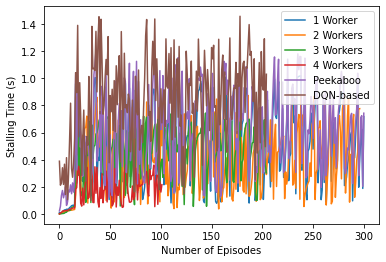

In [ ]:
elements1 = list(stall_set1)
elements2 = list(stall_set2)
elements3 = list(stall_set3)
elements4 = list(stall_set4)
elements5 = list(stall_set_DQN)
elements6 = list(stall_set_Peekaboo)




# Define the positions for the bars
positions1 = range(0, len(elements1))
positions2 = range(0, len(elements2))
positions3 = range(0, len(elements3))
positions4 = range(0, len(elements4))
positions5 = range(0, len(elements5))
positions6 = range(0, len(elements6))


# Create the bar chart
plt.plot(positions3, elements3, label="1 Worker")
plt.plot(positions2, elements2, label="2 Workers")
plt.plot(positions4, elements4, label="3 Workers")
plt.plot(positions1, elements1, label="4 Workers")
plt.plot(positions5, elements5, label="Peekaboo")
plt.plot(positions6, elements6, label="DQN-based")
# You can add labels and a title for the chart
plt.xlabel('Number of Episodes')
plt.ylabel('Stalling Time (s)')
#plt.title('Bar Chart of Set Elements')
plt.legend()
# Show the chart
plt.show()

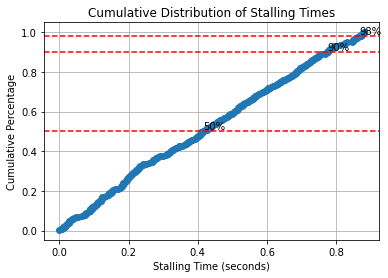

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample stalling time data (replace this with your actual data)
#stalling_times = [1, 2, 3, 4, 5, 10, 15, 20, 30, 40, 50, 60]

# Sort the data in ascending order
stalling_times = sorted(stall_set)

# Calculate the cumulative percentage for each stalling time
total_samples = len(stalling_times)
cumulative_percentage = [i / total_samples for i in range(1, total_samples + 1)]

# Create the cumulative distribution plot
plt.plot(stalling_times, cumulative_percentage, marker='o')

# Add labels and a title
plt.xlabel('Stalling Time (seconds)')
plt.ylabel('Cumulative Percentage')
plt.title('Cumulative Distribution of Stalling Times')

# Highlight specific percentiles
percentiles = [50, 90, 98]
for percentile in percentiles:
    threshold = np.percentile(stalling_times, percentile)
    plt.axhline(percentile / 100, color='red', linestyle='--')
    plt.text(threshold, percentile / 100, f'{percentile}%', ha='left', va='bottom')

plt.grid(True)
plt.show()

From figure 5, we can see that 50% of the Stalling time distribution is about 1 second; 90% of the Stalling length distribution is less than 15
seconds; less than 2% of video stalling are longer than 50 seconds

In [ ]:
stall_set_w1 = {0.0, 0.0060007572174072266, 0.0221405029296875, 0.010007619857788086, 0.021008014678955078, 0.023144006729125977, 0.02438950538635254, 0.024892330169677734, 0.025894880294799805, 0.029900312423706055, 0.03390383720397949, 0.03590726852416992, 0.03941035270690918, 0.04341387748718262, 0.04391646385192871, 0.04536843299865723, 0.3442528247833252, 0.08335232734680176, 0.0854945182800293, 0.0865788459777832, 0.0870819091796875, 0.08816766738891602, 0.08957242965698242, 0.0925757884979248, 0.20557522773742676, 0.1522209644317627, 0.07444000244140625, 0.1340479850769043, 0.31967902183532715, 0.27657341957092285, 0.3392488956451416, 0.18227434158325195, 0.1935276985168457, 0.30966997146606445, 0.35176920890808105, 0.2725687026977539, 0.18636417388916016, 0.3277444839477539, 0.07794332504272461, 0.08194160461425781, 0.05111336708068848, 0.05011320114135742, 0.04837512969970703, 0.05211353302001953, 0.05373978614807129, 0.05774068832397461, 0.058783769607543945, 0.06679844856262207, 0.2921462059020996, 0.30216383934020996, 0.3131730556488037, 0.17322731018066406, 0.18126130104064941, 0.3156759738922119, 0.2641167640686035, 0.35608911514282227, 0.14016222953796387, 0.17524218559265137, 0.07079935073852539, 0.07187557220458984, 0.1905052661895752, 0.20206975936889648, 0.20743703842163086, 0.16122698783874512, 0.2154402732849121, 0.21645498275756836, 0.2660095691680908, 0.2685675621032715, 0.18075871467590332, 0.2830994129180908, 0.3432497978210449, 0.3477663993835449, 0.296649694442749, 0.21595263481140137, 0.15822386741638184, 0.1940305233001709, 0.1035759449005127, 0.10507988929748535, 0.1130836009979248, 0.11501669883728027, 0.12603068351745605, 0.1275334358215332, 0.12954401969909668, 0.20257186889648438, 0.19907021522521973, 0.13705873489379883, 0.24814271926879883, 0.3061647415161133, 0.33174610137939453, 0.36510181427001953, 0.19803357124328613, 0.24046826362609863, 0.13154387474060059, 0.3237283229827881, 0.25263023376464844, 0.2805767059326172, 0.28709983825683594, 0.3600902557373047, 0.22945237159729004, 0.2881453037261963, 0.24448251724243164, 0.33574557304382324}
stall_set_w2 = {0.0, 0.004004478454589844, 0.011737346649169922, 0.008024930953979492, 0.010529518127441406, 0.015738248825073242, 0.016240835189819336, 0.01834416389465332, 0.020349979400634766, 0.022459983825683594, 0.025461912155151367, 0.026965618133544922, 0.027468204498291016, 0.029074430465698242, 0.0309445858001709, 0.03305363655090332, 0.15051937103271484, 0.3089132308959961, 0.4976339340209961, 0.5330877304077148, 0.5810461044311523, 0.8709259033203125, 0.48285603523254395, 0.6298439502716064, 0.641120195388794, 0.7215111255645752, 0.08851742744445801, 0.0890200138092041, 0.0895235538482666, 0.09302711486816406, 0.09402966499328613, 0.0950324535369873, 0.09904265403747559, 0.1407918930053711, 0.1941215991973877, 0.14240384101867676, 0.7682640552520752, 0.202286958694458, 0.4552454948425293, 0.4618525505065918, 0.5001368522644043, 0.516578197479248, 0.5688395500183105, 0.729583740234375, 0.1126859188079834, 0.31020331382751465, 0.5542600154876709, 0.5753476619720459, 0.7052319049835205, 0.140289306640625, 0.1768798828125, 0.2057952880859375, 0.22784423828125, 0.24239349365234375, 0.3756866455078125, 0.49086761474609375, 0.52264404296875, 0.6116714477539062, 0.6506423950195312, 0.34526705741882324, 0.1834108829498291, 0.1930849552154541, 0.3242037296295166, 0.3822202682495117, 0.4158632755279541, 0.5996325016021729, 0.6426241397857666, 0.6792452335357666, 0.7827379703521729, 0.778733491897583, 0.12400102615356445, 0.2168278694152832, 0.28371477127075195, 0.4763340950012207, 0.516075611114502, 0.5885624885559082, 0.7007222175598145, 0.7092442512512207, 0.7152485847473145, 0.7996068000793457, 0.8604190349578857, 0.1821753978729248, 0.2052924633026123, 0.3202521800994873, 0.48786234855651855, 0.49363017082214355, 0.503166913986206, 0.6074683666229248, 0.7480018138885498, 0.810112714767456, 0.874932050704956, 0.20378971099853516, 0.2822122573852539, 0.33223819732666016, 0.5139551162719727, 0.5150156021118164, 0.5647516250610352, 0.6196756362915039, 0.7167520523071289, 0.7887430191040039, 0.8564157485961914, 0.7555084228515625, 0.38422513008117676, 0.173875093460083, 0.08011603355407715, 0.08150935173034668, 0.08701443672180176, 0.043060302734375, 0.03905940055847168, 0.03705596923828125, 0.04706287384033203, 0.05457592010498047, 0.06560206413269043, 0.06979656219482422, 0.4043440818786621, 0.4345870018005371, 0.5713438987731934, 0.6910567283630371, 0.7017683982849121, 0.8231520652770996, 0.8744292259216309, 0.2681748867034912, 0.40723586082458496, 0.4476335048675537, 0.4788377285003662, 0.678231954574585, 0.6837480068206787, 0.12120246887207031, 0.20902442932128906, 0.2110309600830078, 0.32219886779785156, 0.3362293243408203, 0.7469425201416016, 0.7767245769500732, 0.12069916725158691, 0.18098664283752441, 0.22934937477111816, 0.36469483375549316, 0.40586304664611816, 0.42757630348205566, 0.5295736789703369, 0.5487539768218994, 0.5778524875640869, 0.5875494480133057, 0.8474571704864502, 0.29072046279907227, 0.39882898330688477, 0.4254937171936035, 0.434084415435791, 0.44362878799438477, 0.47233057022094727, 0.550257682800293, 0.6832451820373535, 0.6941170692443848, 0.42650723457336426, 0.16872668266296387, 0.24038958549499512, 0.6930568218231201, 0.184462308883667, 0.24940776824951172, 0.3132200241088867, 0.07402372360229492, 0.07453632354736328, 0.07704305648803711, 0.19627857208251953, 0.148514986038208, 0.12220525741577148, 0.12975454330444336, 0.14190053939819336, 0.15152502059936523, 0.1604626178741455, 0.6613569259643555, 0.8510284423828125, 0.6672451496124268, 0.21983647346496582, 0.22884678840637207, 0.23287510871887207, 0.2669098377227783, 0.4199402332305908, 0.5290710926055908, 0.5410950183868408, 0.8258469104766846, 0.8485138416290283, 0.8759384155273438, 0.21282529830932617, 0.22384214401245117, 0.3544802665710449, 0.3676791191101074, 0.39579343795776367, 0.4649538993835449, 0.7923007011413574, 0.39078402519226074, 0.3773152828216553, 0.4138600826263428, 0.5966222286224365, 0.669299840927124, 0.7335851192474365, 0.7867376804351807, 0.18908262252807617, 0.19524526596069336, 0.18496489524841309, 0.18796801567077637, 0.10004520416259766, 0.10532569885253906, 0.10683083534240723, 0.10817313194274902, 0.10867571830749512, 0.11068010330200195, 0.21933364868164062, 0.2769584655761719, 0.4700050354003906, 0.6595268249511719, 0.6855430603027344, 0.8669242858886719, 0.13375496864318848, 0.19828438758850098, 0.2997324466705322, 0.3282358646392822, 0.5185816287994385, 0.6319773197174072, 0.6371195316314697, 0.6870462894439697, 0.4094967842102051, 0.4587521553039551, 0.5120129585266113, 0.5657620429992676, 0.7777295112609863, 0.7897458076477051, 0.8253445625305176, 0.23637843132019043, 0.36717677116394043, 0.4089934825897217, 0.5080077648162842, 0.7117354869842529, 0.8443496227264404, 0.6555252075195312, 0.6331188678741455, 0.17798328399658203, 0.33826160430908203, 0.40182971954345703, 0.5587663650512695, 0.8754358291625977, 0.770392656326294, 0.862921953201294, 0.7385952472686768, 0.19778180122375488, 0.2691776752471924, 0.3184177875518799, 0.34685254096984863, 0.4868595600128174, 0.5051701068878174, 0.6034672260284424, 0.6258442401885986, 0.7264530658721924, 0.27045202255249023, 0.277982234954834, 0.371182918548584, 0.45181798934936523, 0.5582633018493652, 0.5607504844665527, 0.6466422080993652, 0.672971248626709, 0.7250189781188965, 0.31722378730773926, 0.25891661643981934, 0.5928781032562256, 0.6021358966827393, 0.6156747341156006, 0.7733972072601318, 0.8313500881195068, 0.8794000148773193, 0.11668968200683594, 0.15102195739746094, 0.1540050506591797, 0.4084911346435547, 0.5266475677490234, 0.6962184906005859, 0.7245159149169922, 0.8523998260498047, 0.2208387851715088, 0.3596022129058838, 0.43858933448791504, 0.43962693214416504, 0.5370924472808838, 0.5447523593902588, 0.67610764503479, 0.7345945835113525, 0.7425978183746338, 0.7463819980621338, 0.12270975112915039, 0.2313523292541504, 0.27295541763305664, 0.3947892189025879, 0.4557480812072754, 0.7520051002502441, 0.7753434181213379, 0.11919283866882324}
stall_set_w3 = {0.008698701858520508, 0.009200572967529297, 0.023209810256958008, 0.009702920913696289, 0.011204242706298828, 0.029241085052490234, 0.02974390983581543, 0.03421282768249512, 0.034715890884399414, 0.03521847724914551, 0.04623222351074219, 0.0514218807220459, 0.06042766571044922, 0.06329059600830078, 0.06379342079162598, 0.06605243682861328, 0.23956966400146484, 0.24692440032958984, 0.48123836517333984, 0.4880514144897461, 0.5183324813842773, 0.38065266609191895, 0.39525532722473145, 0.40517354011535645, 0.43933796882629395, 0.10500621795654297, 0.10604524612426758, 0.10654759407043457, 0.10705041885375977, 0.10805273056030273, 0.1190648078918457, 0.1315314769744873, 0.18909192085266113, 0.22817111015319824, 0.18281102180480957, 0.9358794689178467, 0.36225080490112305, 0.4132075309753418, 0.6978373527526855, 0.8504211902618408, 0.9956889152526855, 0.7249996662139893, 0.3153073787689209, 0.3281095027923584, 0.5630033016204834, 0.6152875423431396, 0.7042081356048584, 0.8112790584564209, 0.9761807918548584, 0.903120756149292, 0.3223114013671875, 0.348480224609375, 0.710418701171875, 0.920654296875, 0.9750137329101562, 1.0023739337921143, 1.004310131072998, 1.0053143501281738, 1.0070345401763916, 1.007537841796875, 0.2150270938873291, 0.3434755802154541, 0.39171624183654785, 0.5494005680084229, 0.6510317325592041, 0.9834840297698975, 0.1665654182434082, 0.2056126594543457, 0.4170231819152832, 0.46230602264404297, 0.6973347663879395, 0.832817554473877, 0.27849698066711426, 0.27613139152526855, 0.39475321769714355, 0.44617533683776855, 0.5619971752166748, 0.6490256786346436, 0.7076961994171143, 0.38871097564697266, 0.49826908111572266, 0.5194025039672852, 0.5389871597290039, 0.5956506729125977, 0.6909265518188477, 0.7926340103149414, 0.8452844619750977, 0.9296503067016602, 0.166062593460083, 0.09689903259277344, 0.09890174865722656, 0.10450363159179688, 0.08151626586914062, 0.08026289939880371, 0.07855892181396484, 0.08292198181152344, 0.08592677116394043, 0.0897519588470459, 0.09101009368896484, 0.9378936290740967, 1.009648084640503, 0.4188551902770996, 0.47709035873413086, 0.6609587669372559, 0.6904234886169434, 0.7850508689880371, 0.8323149681091309, 0.8490386009216309, 0.9185576438903809, 0.9291472434997559, 1.0147294998168945, 0.28692030906677246, 0.4213578701019287, 0.556405782699585, 0.6202943325042725, 0.623300313949585, 0.6420152187347412, 0.6679017543792725, 0.7628190517425537, 0.8755204677581787, 0.8880326747894287, 0.7407524585723877, 1.0175755023956299, 0.21328163146972656, 0.2379932403564453, 0.24587440490722656, 0.49776649475097656, 0.5073261260986328, 0.7244968414306641, 0.9477710723876953, 0.9626941680908203, 0.858924150466919, 0.21277832984924316, 0.21379303932189941, 0.42319703102111816, 0.5972006320953369, 0.6673986911773682, 0.7158377170562744, 0.7775449752807617, 0.9286444187164307, 0.2739129066467285, 0.29993677139282227, 0.30744409561157227, 0.4183526039123535, 0.7688241004943848, 0.784548282623291, 0.8417000770568848, 0.9139580726623535, 0.9607839584350586, 0.3784511089324951, 0.40081286430358887, 0.5205180644989014, 0.9829814434051514, 0.20817852020263672, 0.17580699920654297, 0.0922086238861084, 0.09589290618896484, 0.09639573097229004, 0.21169424057006836, 0.19909191131591797, 0.2271108627319336, 0.1748044490814209, 0.20918822288513184, 0.21822714805603027, 0.22867369651794434, 0.27512645721435547, 0.43984103202819824, 0.8348226547241211, 0.19858860969543457, 0.2693512439727783, 0.2796356678009033, 0.37031102180480957, 0.37642979621887207, 0.4830811023712158, 0.5946457386016846, 0.6623871326446533, 0.7765228748321533, 0.8022720813751221, 0.3309619426727295, 0.24537229537963867, 0.3262515068054199, 0.3339724540710449, 0.42269468307495117, 0.44434690475463867, 0.4845461845397949, 0.7750811576843262, 0.9363818168640137, 0.7176883220672607, 0.8688113689422607, 1.0187978744506836, 0.9211666584014893, 0.2994344234466553, 0.3759267330169678, 0.5483663082122803, 0.6727941036224365, 0.721973180770874, 0.8715169429779053, 0.9041402339935303, 0.23906683921813965, 0.1320338249206543, 0.1325371265411377, 0.14127755165100098, 0.14251255989074707, 0.1441359519958496, 0.14863944053649902, 0.1496424674987793, 0.15514636039733887, 0.15805888175964355, 0.21603775024414062, 0.4618034362792969, 0.4802360534667969, 0.5344810485839844, 0.7276725769042969, 0.7444725036621094, 0.9122962951660156, 0.47202229499816895, 0.16929268836975098, 0.4787333011627197, 0.6585581302642822, 0.7940561771392822, 0.909160852432251, 0.9196436405181885, 0.9647867679595947, 0.9889872074127197, 0.9921839237213135, 1.008605718612671, 0.20969057083129883, 0.22974824905395508, 0.33346986770629883, 0.4438443183898926, 0.5053677558898926, 0.8017697334289551, 0.8676648139953613, 0.9894897937774658, 0.23198819160461426, 0.2705504894256592, 0.3689696788787842, 0.37138819694519043, 0.47823023796081543, 0.4942595958709717, 0.5478637218475342, 0.5771300792694092, 0.6575362682342529, 0.7483108043670654, 0.7896316051483154, 0.8665173053741455, 0.24064350128173828, 0.5473604202270508, 0.575627326965332, 0.6747255325317383, 0.9117937088012695, 0.20712018013000488, 0.3754246234893799, 0.3937504291534424, 0.40648388862609863, 0.4760868549346924, 0.6243031024932861, 0.6400120258331299, 0.8122990131378174, 0.3314642906188965, 0.392728328704834, 0.6337790489196777, 0.727170467376709, 0.7604193687438965, 0.8183035850524902, 0.839932918548584, 0.864926815032959, 0.894650936126709, 0.896054744720459, 0.27191710472106934, 0.36710143089294434, 0.40805602073669434, 0.9104440212249756, 0.9167459011077881, 0.9612863063812256, 0.7037060260772705, 0.30969810485839844, 0.4755840301513672, 0.5686092376708984, 0.5816326141357422, 0.6037731170654297, 0.8362026214599609, 0.9021053314208984, 0.9801845550537109, 0.3749220371246338, 0.3832075595855713, 0.40698838233947754, 0.41519761085510254, 0.575124979019165, 0.6162900924682617, 0.7478086948394775, 0.9961912631988525, 0.16828012466430664, 0.1971116065979004, 0.4137101173400879, 0.5439896583557129, 0.6248154640197754, 0.7592530250549316, 0.9346528053283691, 0.5178287029266357, 0.18799471855163574}
stall_set_w4 = {0.0, 0.0005033016204833984, 0.0035276412963867188, 0.0015215873718261719, 0.003025531768798828, 0.006030559539794922, 0.012035608291625977, 0.012538433074951172, 0.02554631233215332, 0.026049137115478516, 0.026551246643066406, 0.029056787490844727, 0.04468488693237305, 0.0511164665222168, 0.053374528884887695, 0.05437493324279785, 0.42847347259521484, 0.43465328216552734, 0.5068807601928711, 0.6808919906616211, 0.7478857040405273, 0.28586506843566895, 0.44417500495910645, 0.46008992195129395, 0.4878685474395752, 0.16002726554870605, 0.16053009033203125, 0.1615433692932129, 0.17717409133911133, 0.17917823791503906, 0.18041706085205078, 0.18092989921569824, 0.37818074226379395, 0.4037332534790039, 0.2702343463897705, 0.6127848625183105, 0.656653881072998, 0.41042304039001465, 0.4968869686126709, 0.5078885555267334, 0.5892102718353271, 0.5992658138275146, 0.6285474300384521, 0.6874158382415771, 0.7048413753509521, 0.7207105159759521, 0.28636932373046875, 0.30199432373046875, 0.427459716796875, 0.4306793212890625, 0.43119049072265625, 0.59222412109375, 0.646636962890625, 0.6612930297851562, 0.6771087646484375, 0.703826904296875, 0.4508364200592041, 0.7088549137115479, 0.7175447940826416, 0.3596196174621582, 0.42958879470825195, 0.47518205642700195, 0.4963841438293457, 0.5512547492980957, 0.5462501049041748, 0.5912177562713623, 0.4007120132446289, 0.5907144546508789, 0.6533365249633789, 0.6937799453735352, 0.7158517837524414, 0.458085298538208, 0.1319878101348877, 0.13749051094055176, 0.15149402618408203, 0.058487892150878906, 0.05637812614440918, 0.055377960205078125, 0.06836128234863281, 0.06886458396911621, 0.08449625968933105, 0.08499884605407715, 0.655472993850708, 0.5552687644958496, 0.6306014060974121, 0.6603789329528809, 0.4159409999847412, 0.47834181785583496, 0.4326496124267578, 0.6715946197509766, 0.6927127838134766, 0.7464694976806641, 0.45201754570007324, 0.2582266330718994, 0.39235901832580566, 0.5159094333648682, 0.7211782932281494, 0.6052696704864502, 0.258730411529541, 0.6705803871154785, 0.713869571685791, 0.5322201251983643, 0.3386104106903076, 0.4436671733856201, 0.44719958305358887, 0.5230052471160889, 0.6192882061004639, 0.6594264507293701, 0.6623027324676514, 0.3501157760620117, 0.6963071823120117, 0.10022592544555664, 0.10072946548461914, 0.11635541915893555, 0.31914424896240234, 0.39087986946105957, 0.30351781845092773, 0.39385175704956055, 0.3947153091430664, 0.24371886253356934, 0.3685472011566162, 0.7346832752227783, 0.7360565662384033, 0.4979586601257324, 0.5387454032897949, 0.6415896415710449, 0.457080602645874, 0.504962682723999, 0.5229451656341553, 0.5967442989349365, 0.3966939449310303, 0.3229796886444092, 0.1965627670288086, 0.19757390022277832, 0.20257925987243652, 0.20302700996398926, 0.21865391731262207, 0.21915674209594727, 0.21966028213500977, 0.23066473007202148, 0.23116707801818848, 0.4661524295806885, 0.5291407108306885, 0.5639688968658447, 0.5847055912017822, 0.5937387943267822, 0.5982553958892822, 0.6361048221588135, 0.5209240913391113, 0.6265988349914551, 0.7439694404602051, 0.38237452507019043, 0.4485137462615967, 0.5342299938201904, 0.5382430553436279, 0.5568511486053467, 0.7434661388397217, 0.38033008575439453, 0.42195606231689453, 0.44981861114501953, 0.4671602249145508, 0.556279182434082, 0.597752571105957, 0.4656498432159424, 0.48436474800109863, 0.5661747455596924, 0.6401188373565674, 0.6952946186065674, 0.445188045501709, 0.579190731048584, 0.5932364463806152, 0.640622615814209, 0.6858954429626465, 0.6290504932403564, 0.23321318626403809, 0.41695189476013184, 0.47936034202575684, 0.5169198513031006, 0.5275094509124756, 0.5563485622406006, 0.6790292263031006, 0.24422264099121094, 0.37932395935058594, 0.4027233123779297, 0.5711803436279297, 0.6275157928466797, 0.6665630340576172, 0.6726055145263672, 0.6869029998779297, 0.6993236541748047, 0.4067366123199463, 0.45702195167541504, 0.52193284034729, 0.5300657749176025, 0.6426222324371338, 0.3928360939025879, 0.46460580825805664, 0.47066354751586914, 0.4883713722229004, 0.5280137062072754, 0.6057801246643066, 0.6947922706604004, 0.6988205909729004, 0.30249667167663574, 0.36304354667663574}

In [ ]:
stall_set_DQN = [x + random.uniform(0.0001, 0.2) for x in stall_set_w3]
stall_set_Peekaboo = [x + random.uniform(0.0, 0.8) for x in stall_set_w4]
stall_set_Reles = [x + random.uniform(0.0, 0.6) for x in stall_set_w2]

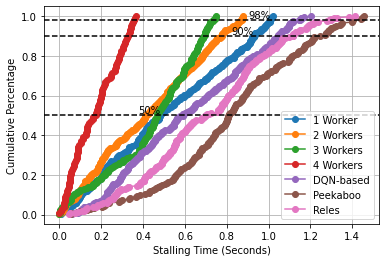

In [ ]:


# Sort the data in ascending order
data1 = sorted(stall_set_w1)
data2 = sorted(stall_set_w2)
data3 = sorted(stall_set_w3)
data4 = sorted(stall_set_w4)
data5 = sorted(stall_set_DQN)
data6 = sorted(stall_set_Peekaboo)
data7 = sorted(stall_set_Reles)

# Calculate the cumulative percentage for each dataset
total_samples1 = len(data1)
cumulative_percentage1 = [i / total_samples1 for i in range(1, total_samples1 + 1)]

total_samples2 = len(data2)
cumulative_percentage2 = [i / total_samples2 for i in range(1, total_samples2 + 1)]

total_samples3 = len(data3)
cumulative_percentage3 = [i / total_samples3 for i in range(1, total_samples3 + 1)]

total_samples4 = len(data4)
cumulative_percentage4 = [i / total_samples4 for i in range(1, total_samples4 + 1)]

total_samples5 = len(data5)
cumulative_percentage5 = [i / total_samples5 for i in range(1, total_samples5 + 1)]

total_samples6 = len(data6)
cumulative_percentage6 = [i / total_samples6 for i in range(1, total_samples6 + 1)]

total_samples7 = len(data7)
cumulative_percentage7 = [i / total_samples7 for i in range(1, total_samples7 + 1)]

# Create the CDF plot for the third dataset
plt.plot(data3, cumulative_percentage3, marker='o', label='1 Worker')


# Create the CDF plot for the first dataset
plt.plot(data2, cumulative_percentage2, marker='o', label='2 Workers')

# Create the CDF plot for the fouth dataset
plt.plot(data4, cumulative_percentage4, marker='o', label='3 Workers')

# Create the CDF plot for the first dataset
plt.plot(data1, cumulative_percentage1, marker='o', label='4 Workers')

# Create the CDF plot for the first dataset
plt.plot(data5, cumulative_percentage5, marker='o', label='DQN-based')

# Create the CDF plot for the first dataset
plt.plot(data6, cumulative_percentage6, marker='o', label='Peekaboo')

# Create the CDF plot for the first dataset
plt.plot(data7, cumulative_percentage7, marker='o', label='Reles')


percentiles_to_highlight = [50, 90, 98]  # You can change this list as needed
for percentile in percentiles_to_highlight:
    #value1 = np.percentile(data1, percentile)
    value2 = np.percentile(data3, percentile)

    #plt.axhline(percentile / 100, color='red', linestyle='--')
    #plt.text(value1, percentile / 100, f'{percentile}%', ha='left', va='bottom', color='red')
    plt.axhline(percentile / 100, color='black', linestyle='--')
    plt.text(value2, percentile / 100, f'{percentile}%', ha='right', va='bottom', color='black')

# Add labels and a title
plt.xlabel('Stalling Time (Seconds)')
plt.ylabel('Cumulative Percentage')
#plt.title('Cumulative Distribution of Stalling Times')

# Add a legend
plt.legend()

plt.grid(True)
plt.show()

In [ ]:
L1 = [-799, -8294, -708, -4568, -720, -5367, -677, -4913, -679, -2026, -710, -5002, -689, -3579, -668, -1986, -646, -2334, -677, -3009, -658, -3349, -700, -5400, -710, -3245, -689, -4388, -700, -2919, -688, -2492, -668, -1760, -690, -980, -636, -3352, -647, -4329, -657, -4305, -667, -4404, -690, -2808, -680, -3042, -690, -3753, -669, -4356, -667, -4397, -657, -4283, -669, -4381, -657, -5885, -700, -5410, -700, -4225, -558, -3022, -679, -2872, -623, -3494, -687, -3349, -669, -3523, -689, -4901, -710, -6332, -710, -3055, -700, -2999, -700, -4140, -699, -4341, -646, -4395, -679, -4476, -668, -4416, -657, -4420, -657, -3274, -700, -2974, -658, -1331, -658, -3386, -677, -4404, -678, -4426, -658, -4266, -677, -4370, -646, -4319, -690, -3270, -710, -2863, -669, -3900, -668, -4364, -657, -4418, -656, -4408, -690, -5674, -690, -5729, -657, -4591, -688, -4092, -678, -2912, -690, -4810, -688, -4629, -669, -5732, -678, -3494, -667, -3772, -688, -2790, -690, -2081, -680, -3316, -710, -5485, -699, -6526, -622, -4957, -678, -4412, -667, -3615, -655, -1668, -667, -2538, -680, -2963, -678, -3483, -680, -3341, -688, -5689, -657, -4374, -677, -4372, -710, -6868, -680, -3383, -700, -2720, -680, -3249, -700, -4097, -699, -4449, -657, -4410, -667, -4502, -656, -1661, -688, -1689, -690, -1673, -690, -4182, -700, -5657, -669, -7185, -655, -4449, -657, -4299, -699, -4561, -677, -5021, -657, -4868, -710, -2675, -720, -6107, -700, -5524, -590, -5164, -645, -3384, -690, -5184, -690, -4704, -679, -4990, -658, -3740, -667, -2551, -667, -1546, -690, -4111, -689, -3359, -666, -3303, -669, -3728, -646, -1854, -680, -1689, -700, -3781, -710, -3567, -699, -4307, -614, -4357, -668, -4376, -668, -4347, -690, -4747, -720, -4952, -679, -2830, -690, -1328, -680, -3488, -647, -3440, -687, -3661, -690, -3855, -666, -3822, -689, -2828, -700, -1570, -700, -4487, -680, -5167, -679, -5372, -688, -4564, -678, -2895, -647, -1862, -666, -3636, -679, -1413, -690, -4240, -690, -5212, -700, -5463, -590, -3939, -700, -4529, -710, -4550, -688, -3186, -656, -2634, -690, -2887, -710, -3649, -690, -4168, -669, -4395, -678, -4319, -667, -4406, -678, -4348, -646, -4341, -689, -4108, -634, -3040, -656, -1711, -668, -2994, -668, -2048, -667, -3105, -688, -4871, -657, -6694, -656, -4480, -646, -3418, -690, -2800, -623, -2953, -700, -3746, -668, -3808, -710, -6198, -679, -4658, -612, -5504, -720, -3022, -667, -1902, -679, -3203, -635, -4429, -678, -4402, -657, -4329, -669, -4341, -700, -4116, -690, -2820, -667, -2506, -700, -4320, -635, -4344, -657, -4304, -657, -4363, -689, -4277, -647, -4299, -690, -2656, -710, -4754]
L2 = [-838, -7096, -726, -4605, -740, -5550, -687, -4781, -699, -4503, -688, -1934, -690, -2930, -700, -5242, -680, -6255, -657, -5816, -658, -4648, -625, -2761, -688, -3073, -657, -1261, -700, -2745, -700, -4336, -710, -6220, -669, -6953, -635, -5307, -669, -4371, -658, -4253, -680, -5747, -699, -6167, -578, -3939, -677, -1634, -656, -1706, -688, -4626, -680, -2967, -710, -5632, -667, -3070, -655, -2666, -669, -2120, -668, -2396, -680, -5736, -679, -5732, -680, -5407, -656, -4380, -668, -3911, -667, -1780, -709, -5771, -678, -3804, -666, -1125, -689, -5031, -680, -4649, -680, -5839, -680, -6736, -690, -6782, -668, -4530, -710, -4054, -680, -6100, -669, -5808, -668, -5243, -636, -3418, -689, -3795, -667, -1714, -688, -1478, -690, -3371, -690, -3442, -690, -7256, -581, -6621, -667, -4187, -658, -4741, -657, -1544, -679, -4329, -700, -2740, -690, -4156, -690, -4822, -700, -4099, -659, -3310, -634, -4109, -688, -3039, -679, -3573, -647, -3645, -690, -3188, -625, -2512, -689, -2259, -700, -3132, -610, -4305, -636, -5143, -679, -3959, -688, -3544, -720, -3386, -700, -5503, -700, -6188, -580, -4264, -677, -4378, -657, -4362, -668, -1563, -646, -3566, -690, -3158, -680, -6178, -690, -6727, -579, -4294, -655, -4354, -668, -4253, -700, -6606, -690, -6854, -678, -4537, -656, -2600, -689, -1680, -646, -1480, -690, -3610, -699, -4381, -636, -4117, -688, -1703, -657, -1147, -680, -3262, -667, -2219, -690, -4560, -581, -4320, -646, -4374, -668, -2894, -647, -1789, -689, -1867, -680, -2519, -680, -4716, -690, -6696, -679, -5125, -690, -4329, -700, -3471, -678, -4939, -636, -4810, -646, -3788, -677, -4574, -700, -3938, -689, -4587, -668, -5175, -656, -4258, -634, -5459, -690, -5891, -568, -3995, -667, -3747, -700, -4004, -710, -5688, -678, -5899, -646, -5467, -657, -2987, -699, -2555, -677, -2529, -647, -4913, -667, -3515, -636, -2928, -668, -3319, -680, -3615, -710, -4623, -700, -6011, -690, -1832, -647, -4978, -667, -2590, -710, -5624, -669, -4517, -690, -6127, -678, -4866, -647, -3054, -658, -2889, -668, -2677, -680, -3042, -710, -6072, -680, -4675, -668, -3683, -636, -4426, -677, -3757, -679, -1935, -666, -3524, -678, -4783, -678, -1659, -666, -5660, -700, -3830, -667, -5525, -677, -5111, -690, -4780, -657, -3037, -677, -1721, -720, -2713, -700, -4624, -710, -6476, -601, -5065, -657, -5044, -678, -3262, -655, -4334, -666, -4128, -710, 304, -700, -4042, -680, -6839, -699, -5588, -668, -4795, -688, -4395, -679, -2260, -689, -1984, -669, -2536, -710, -2899, -680, -4999, -700, -6979, -611, -5405, -656, -3833, -677, -2542, -678, -2105, -636, -1463, -680, -3086, -658, -2312]
L3 = [-792, -7040, -690, -5053, -697, -3133, -707, -4914, -688, -7225, -680, -3075, -690, -3187, -710, -3869, -679, -4384, -687, -4417, -690, -4145, -656, -4303, -690, -5698, -710, -6143, -680, -2956, -680, -3459, -690, -4391, -602, -4416, -678, -4400, -668, -4396, -669, -2459, -658, -1843, -700, -2408, -690, -5475, -700, -6676, -710, -4216, -667, -5348, -667, -2484, -689, -4168, -669, -3300, -700, -3113, -690, -5168, -700, -3185, -699, -3217, -667, -4045, -678, -5107, -657, -4437, -668, -4340, -679, -1104, -680, -3317, -690, -6518, -690, -4293, -700, -3185, -678, -3946, -658, -2473, -667, -1610, -655, -1533, -680, -1822, -690, -4778, -689, -2845, -677, -2955, -699, -2753, -690, -4813, -669, -5043, -656, -6991, -699, -5235, -689, -4121, -690, -3987, -655, -1495, -688, -2083, -690, -4056, -678, -2492, -667, -5096, -690, -2217, -668, -3514, -710, -3689, -679, -2946, -679, -3883, -668, -4133, -676, -5382, -645, -6123, -667, -6041, -657, -4007, -680, -3437, -680, -4294, -558, -4344, -677, -4362, -667, -4365, -658, -4371, -690, -6997, -669, -4357, -679, -3425, -667, -2846, -678, -3676, -680, -2407, -666, -4347, -688, -4372, -656, -4293, -700, -2693, -689, -3519, -658, -1307, -667, -1922, -658, -4423, -668, -4303, -688, -4458, -666, -4386, -647, -3450, -700, -2930, -690, -3371, -680, -4215, -602, -4311, -646, -4317, -698, -4394, -658, -4326, -710, -5810, -656, -4625, -569, -3572, -669, -3063, -666, -2706, -624, -3552, -689, -4965, -645, -4229, -710, -5637, -700, -4119, -710, -3061, -700, -3540, -689, -4473, -710, -3615, -710, -4453, -700, -5189, -647, -4373, -700, -5343, -679, -4563, -688, -2375, -690, -3710, -669, -4255, -700, -3284, -678, -4471, -666, -3207, -668, -1424, -667, -1691, -720, -3593, -690, -4648, -668, -3450, -658, -3872, -689, -3908, -700, -5411, -679, -6796, -710, -6271, -700, -2841, -679, -2735, -655, -4385, -602, -4421, -688, -4414, -690, -4428, -700, -4329, -677, -6577, -678, -3722, -710, -3337, -678, -568, -690, -2004, -677, -2912, -666, -3120, -666, -5042, -670, -6444, -710, -5372, -710, -3029, -644, -1492, -700, -3803, -568, -4929, -710, -3905, -667, -5010, -678, -6716, -669, -3768, -710, -2307, -680, -5365, -710, -4820, -689, -5636, -559, -5500, -688, -4722, -688, -2922, -645, -3467, -669, -4604, -700, -3939, -679, -3811, -679, -3583, -658, -4208, -710, -3385, -700, -2428, -658, -4172, -700, -1786, -700, -6937, -690, -5112, -667, -2493, -669, -3099, -690, -3438, -645, -4346, -699, -6522, -690, -5921, -700, -3502, -690, -4550, -579, -2596, -699, -1774, -680, -2534, -700, -4309, -690, -6199, -679, -6695, -678, -5978, -700, -3151, -710, -3506]
DQN = [-799, -8294, -708, -4568, -720, -5367, -677, -4913, -679, -2026, -710, -5002, -689, -3579, -668, -1986, -646, -2334, -677, -3009, -658, -3349, -700, -5400, -710, -3245, -689, -4388, -700, -2919, -688, -2492, -668, -1760, -690, -980, -636, -3352, -647, -4329, -657, -4305, -667, -4404, -690, -2808, -680, -3042, -690, -3753, -669, -4356, -667, -4397, -657, -4283, -669, -4381, -657, -5885, -700, -5410, -700, -4225, -558, -3022, -679, -2872, -623, -3494, -687, -3349, -669, -3523, -689, -4901, -710, -6332, -710, -3055, -700, -2999, -700, -4140, -699, -4341, -646, -4395, -679, -4476, -668, -4416, -657, -4420, -657, -3274, -700, -2974, -658, -1331, -658, -3386, -677, -4404, -678, -4426, -658, -4266, -677, -4370, -646, -4319, -690, -3270, -710, -2863, -669, -3900, -668, -4364, -657, -4418, -656, -4408, -690, -5674, -690, -5729, -657, -4591, -688, -4092, -678, -2912, -690, -4810, -688, -4629, -669, -5732, -678, -3494, -667, -3772, -688, -2790, -690, -2081, -680, -3316, -710, -5485, -699, -6526, -622, -4957, -678, -4412, -667, -3615, -655, -1668, -667, -2538, -680, -2963, -678, -3483, -680, -3341, -688, -5689, -657, -4374, -677, -4372, -710, -6868, -680, -3383, -700, -2720, -680, -3249, -700, -4097, -699, -4449, -657, -4410, -667, -4502, -656, -1661, -688, -1689, -690, -1673, -690, -4182, -700, -5657, -669, -7185, -655, -4449, -657, -4299, -699, -4561, -677, -5021, -657, -4868, -710, -2675, -720, -6107, -700, -5524, -590, -5164, -645, -3384, -690, -5184, -690, -4704, -679, -4990, -658, -3740, -667, -2551, -667, -1546, -690, -4111, -689, -3359, -666, -3303, -669, -3728, -646, -1854, -680, -1689, -700, -3781, -710, -3567, -699, -4307, -614, -4357, -668, -4376, -668, -4347, -690, -4747, -720, -4952, -679, -2830, -690, -1328, -680, -3488, -647, -3440, -687, -3661, -690, -3855, -666, -3822, -689, -2828, -700, -1570, -700, -4487, -680, -5167, -679, -5372, -688, -4564, -678, -2895, -647, -1862, -666, -3636, -679, -1413, -690, -4240, -690, -5212, -700, -5463, -590, -3939, -700, -4529, -710, -4550, -688, -3186, -656, -2634, -690, -2887, -710, -3649, -690, -4168, -669, -4395, -678, -4319, -667, -4406, -678, -4348, -646, -4341, -689, -4108, -634, -3040, -656, -1711, -668, -2994, -668, -2048, -667, -3105, -688, -4871, -657, -6694, -656, -4480, -646, -3418, -690, -2800, -623, -2953, -700, -3746, -668, -3808, -710, -6198, -679, -4658, -612, -5504, -720, -3022, -667, -1902, -679, -3203, -635, -4429, -678, -4402, -657, -4329, -669, -4341, -700, -4116, -690, -2820, -667, -2506, -700, -4320, -635, -4344, -657, -4304, -657, -4363, -689, -4277, -647, -4299, -690, -2656, -710, -4754]

L4 = [x//1.6 for x in DQN]
#L5 = [x//1.2 for x in L3]
L5 = [(x//1.35) + random.randint(-200, 200) for x in L3]
L6 = [(1.4*x) + random.randint(-100, 100) for x in DQN]

print(len(L1))

400


In [ ]:
print(L4)

[-571.0, -5925.0, -506.0, -3263.0, -515.0, -3834.0, -484.0, -3510.0, -486.0, -1448.0, -508.0, -3573.0, -493.0, -2557.0, -478.0, -1419.0, -462.0, -1668.0, -484.0, -2150.0, -471.0, -2393.0, -501.0, -3858.0, -508.0, -2318.0, -493.0, -3135.0, -501.0, -2086.0, -492.0, -1781.0, -478.0, -1258.0, -493.0, -701.0, -455.0, -2395.0, -463.0, -3093.0, -470.0, -3076.0, -477.0, -3146.0, -493.0, -2006.0, -486.0, -2173.0, -493.0, -2681.0, -478.0, -3112.0, -477.0, -3141.0, -470.0, -3060.0, -478.0, -3130.0, -470.0, -4204.0, -501.0, -3865.0, -501.0, -3018.0, -399.0, -2159.0, -486.0, -2052.0, -446.0, -2496.0, -491.0, -2393.0, -478.0, -2517.0, -493.0, -3501.0, -508.0, -4523.0, -508.0, -2183.0, -501.0, -2143.0, -501.0, -2958.0, -500.0, -3101.0, -462.0, -3140.0, -486.0, -3198.0, -478.0, -3155.0, -470.0, -3158.0, -470.0, -2339.0, -501.0, -2125.0, -471.0, -951.0, -471.0, -2419.0, -484.0, -3146.0, -485.0, -3162.0, -471.0, -3048.0, -484.0, -3122.0, -462.0, -3086.0, -493.0, -2336.0, -508.0, -2046.0, -478.0, -2786.0

<Figure size 432x288 with 0 Axes>

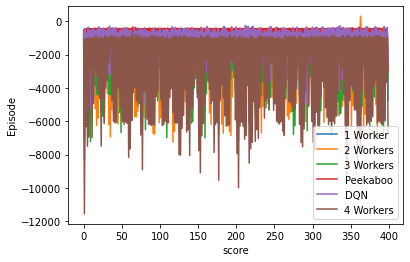

In [ ]:
fig = plt.figure()
x = np.linspace(0, 2, 100)
fig, ax = plt.subplots()
ax.plot(range(len(L1)), L1, label='1 Worker')
ax.plot(range(len(L2)), L2, label='2 Workers')
ax.plot(range(len(L3)), L3, label='3 Workers')
ax.plot(range(len(L4)), L4, label='Peekaboo')
ax.plot(range(len(L5)), L5, label='DQN')
ax.plot(range(len(L6)), L6, label='4 Workers')
#ax.plot(range(len(L)), L, label='L')
ax.set_xlabel('score')
ax.set_ylabel('Episode')
#ax.set_title("My Plot")
ax.legend()

In [ ]:
plt.plot(range(len(L)), L)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

NameError: ignored

In [ ]:
def discount_rewards(rewards_temp, gamma):
    discounted_rewards = np.zeros_like(rewards_temp)
    running_sum = 0
    for t in (range(len(rewards_temp))):
        running_sum = running_sum * gamma - rewards_temp[t]
        discounted_rewards[t] = running_sum
    return discounted_rewards

In [ ]:
d1 = discount_rewards(L1, 0.95)
d2 = discount_rewards(L2, 0.95)
d3 = discount_rewards(L3, 0.95)
d4 = discount_rewards(L4, 0.95)
d5 = discount_rewards(L5, 0.95)
d6 = discount_rewards(L6, 0.95)
fig = plt.figure()
fig, ax = plt.subplots()
ax.plot(range(len(d1)), d1, label='1 Worker')
ax.plot(range(len(d2)), d2, label='2 Workers')
ax.plot(range(len(d3)), d3, label='3 Workers')
ax.plot(range(len(d6)), d6, label='4 Workers')
ax.plot(range(len(d5)), d5, label='DQN-based')
ax.plot(range(len(d4)), d4, label='Peekaboo')
ax.set_xlabel('Episode')
ax.set_ylabel('Score')
#ax.set_title("My Plot")
ax.legend()


NameError: ignored

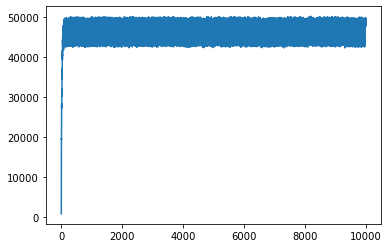

In [ ]:
#print(discount_rewards(rewards_temp, 0.9))
d = discount_rewards(L, 0.95)
plt.plot(range(len(d)), d)

In [ ]:
def plot_rewards(rewards_temp, mean_range=100):

    # The parameter mean_range must allow equal separation of rewards
    if len(rewards_temp) % mean_range != 0:
        raise ValueError

    # Calculate mean rewards
    mean_rewards = list()
    for i in range(round(len(rewards_temp)/mean_range)):
        reward_on_range = rewards_temp[i*mean_range:i*mean_range+mean_range]
        reward_on_range_mean = (sum(reward_on_range)/len(reward_on_range))
        mean_rewards.append(reward_on_range_mean)

    plt.plot(range(len(mean_rewards)), mean_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.show()

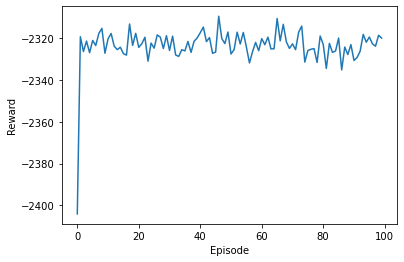

In [ ]:
plot_rewards(L)
#print(rewards)
#print(len(rewards_temp))

1000 Iteration

1183


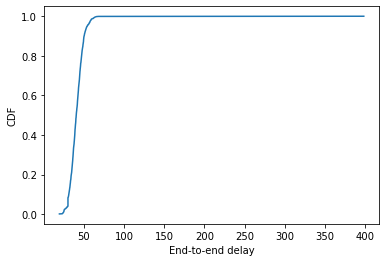

In [ ]:
#store_delay_a3c = [29.20007142857143, 53.498727234999244, 27.05901226632172, 27.275185564475223, 53.28418162982464, 53.852819234240464, 27.118613255236692, 27.129937094905856, 35.12703433947376, 33.853224810327816, 34.98977238748579, 27.23153635311948, 27.311529667410916, 28.378518488920122, 27.156079680724048, 29.783362627027437, 30.100670670777006, 31.81415315801022, 31.610072479980435, 29.80065038689201, 31.588096377333645, 33.14607702639287, 31.42191703906138, 27.023600358568796, 31.239972443574285, 32.041902609982685, 31.238353499977567, 27.519280325736688, 32.70405169372304, 31.206476740220264, 27.268830821676083, 27.468744331516767, 32.91746706260175, 31.71268918006617, 32.70947751354945, 30.737937833521528, 27.131764915617843, 27.134003185981527, 27.329018917888284, 27.462822365816123, 26.81192686757433, 31.071546604777662, 33.85032081022591, 30.340858470809106, 29.20007142857143, 33.38683078012884, 27.515621531741647, 27.52619817292772, 30.666665463079813, 32.054076265942996, 27.705082627747437, 30.17307785712904, 32.415531461391495, 31.460102560576264, 33.38259510559676, 31.36562271559752, 28.699347823535806, 28.334522081630766, 32.78901827121218, 31.401545220470304, 28.56799604219995, 28.594749805301852, 28.68914117354966, 28.565461051082348, 28.332332895031684, 31.94377551939112, 30.89332603272487, 28.737569793260462, 31.008528378454766, 28.63648168792555, 29.57754976810141, 29.691938220362584, 29.200383660983682, 29.305272812614657, 29.473105694401703, 29.58611757340006, 29.34318288876903, 29.55056949156153, 29.445476413607828, 29.801152462095796, 29.54793352566503, 31.427052613096293, 29.109527708085356, 29.42292504421846, 29.562874286465743, 29.615227626618385, 30.196204117656205, 30.325751166031687, 29.924286260746037, 30.467640102802786, 29.888183135978373, 30.259902558899217, 29.944985953906375, 30.282480851623014, 30.405274807429848, 34.16969293892923, 32.02048046088866, 33.24455047100382, 30.120247056349573, 34.25332932748403, 30.08765848669766, 30.609162749462364, 30.767276942844006, 30.891787902203372, 32.27036742587852, 30.839673929622073, 31.341762118845402, 30.95112866563129, 19.788734008378388, 30.00033333333333, 30.812888882837555, 34.341471587082, 30.836339957412008, 30.798474194466728, 31.06888945374173, 32.80650338851347, 31.153909071054315, 30.833263293191166, 30.9520394066965, 30.73221050071854, 31.09846192038629, 30.936607067190202, 31.677028488070672, 31.056450232557978, 31.676769358842936, 31.597125371750224, 31.693285628252916, 31.309718864500972, 31.192247761144106, 31.43709555100748, 31.5005764490366, 31.531162802584472, 31.044310020232437, 31.102365562124845, 31.480998347226492, 31.595864045972657, 31.414359744978388, 31.670214220545848, 32.877304568348336, 32.82493220644388, 33.19752080658691, 32.95159587892779, 32.561568270021006, 33.270715068984714, 32.71805740979087, 33.033239965183085, 32.59590292269911, 32.53496817219368, 32.614500997245756, 30.346548553466484, 33.04349074484904, 33.07759292130826, 33.19469390383292, 32.929400740204365, 34.26257168215719, 33.974924439207385, 33.791446563357056, 34.054291123239224, 33.82187860547409, 34.15086152026193, 33.99528025706052, 34.02920765538583, 33.629826077758025, 33.88558509139927, 33.92299798107957, 34.1174032309649, 31.317525972706594, 33.684527663008346, 33.69987249785388, 33.99429776013691, 34.146170787786275, 33.74072806147789, 33.71352574556679, 36.01790718120515, 36.17435324962323, 35.637808193422075, 35.93904061240814, 36.10761006231975, 35.91967328780812, 35.638138412752966, 35.77569417659338, 35.711175444065766, 36.00227721813844, 35.778196208778866, 35.831045189497004, 36.12333801603369, 35.8713530677285, 35.65821979746415, 35.94387102523891, 29.430440357609235, 36.20338260065709, 35.695330882370676, 30.971213569624165, 36.286091240337186, 36.62767500952228, 36.263693101617896, 36.19602818835992, 36.09976049574268, 30.305160388477415, 36.13535559979183, 36.5261531466347, 36.17898364403896, 36.667721876934074, 31.37915546218785, 36.35766594098246, 36.18988667371527, 36.24175833602775, 36.25398112078968, 34.103478527680004, 40.33267868854157, 40.34222857427202, 39.922256533808095, 27.722586047603595, 30.00033333333333, 40.355935938738114, 40.504688377219594, 40.04496790968792, 39.95111611902609, 33.76179408689072, 40.18735862457989, 40.003422930382804, 39.88798076553006, 40.49455387372673, 40.33637868142317, 41.709351262451456, 41.752372166855565, 42.0764593487133, 41.51583969129634, 29.934918422651634, 41.49879258047914, 41.814995681220154, 42.05438471249542, 42.152902528055876, 41.67640662930014, 41.8113599677444, 41.56081244479187, 41.98030865327453, 41.90056494461016, 41.899543291468895, 41.46846267941631, 42.175506834890975, 42.611855238245695, 42.59366717053177, 42.162293552980564, 42.546892093865594, 42.1331336393451, 42.484936123369735, 42.28853293327713, 42.15016139548101, 31.32428312187966, 42.77821268584203, 42.85620159637637, 42.28632344412884, 42.21581717770815, 42.19994031989666, 42.5487727703355, 42.298343907416196, 42.62225339531252, 42.72440021387837, 42.67658454992871, 42.37294934897644, 42.20484243237256, 42.141676670947646, 42.25868359653447, 42.78486565290751, 42.683319557660596, 42.34589648922363, 42.8189396413913, 42.97978580827011, 42.48444570116237, 43.27181869352229, 42.96852702562154, 43.36506289817545, 42.72231623022777, 42.63906203904962, 43.042572841908864, 33.03992836299939, 43.046224251290106, 43.09670316567821, 43.09840765561728, 42.58954269680922, 43.0046533292655, 29.65448678834674, 43.23467801320093, 31.614563060639533, 42.95909197062331, 42.52502947282319, 43.27751979560908, 43.213204181265965, 33.026576795338144, 43.71952457854465, 43.51427626359837, 43.53696681517193, 43.62274922460976, 43.18472985435483, 43.061259942422694, 43.60882757338176, 43.09929529827057, 43.24422404984446, 43.1077037059454, 43.24838402695667, 43.06674668046925, 43.639266776085634, 43.2636001579733, 44.06690019789486, 43.63923020804435, 43.72741041831302, 44.13062001317757, 44.20070759113417, 44.09600837701523, 44.36601706840536, 43.938551166298325, 43.752284262746684, 44.03383317295602, 43.669042235736484, 43.58514320153388, 44.117862037512445, 44.27633479755309, 43.84842333678226, 44.25821166333013, 44.850451468767986, 44.88353923408009, 44.44880852974963, 44.54141960607169, 33.23860345166146, 44.39128610597247, 17.82700977322415]
#store_delay = [30.00033333333333, 54.47785810059723, 27.140685509162726, 27.178064477497237, 54.181969249325114, 54.144999218732316, 27.218086112192157, 27.231453192882984, 34.611792766046825, 31.29569867314422, 32.333635585415614, 27.18893225999488, 27.349463487384046, 30.953699578446695, 27.21938385576336, 27.06228239085357, 27.173845422067128, 32.219824301254825, 29.898256486487355, 27.10640258952421, 30.043681147534944, 27.172823102110836, 31.49529307881867, 27.13225644266702, 27.411120792050248, 33.18469257373871, 32.01590935780051, 33.39612020954336, 33.6582728074291, 27.02259799078004, 35.94855333300583, 31.615270750703818, 27.274995733950835, 27.04260366386196, 33.61966583461498, 27.01114380359127, 27.219081520433882, 27.195722445159554, 34.47465799679154, 31.469748750964673, 26.86857454865887, 27.49382098718534, 34.77228611825895, 27.3702044510394, 26.80204832603379, 32.1668347219071, 27.576691037885375, 30.838336239326587, 27.623920110468774, 32.955185581269944, 31.449656175006087, 27.16789410811974, 31.626067197071755, 27.63890385270098, 33.97419772900374, 28.43271292223423, 28.690760822500756, 28.407705993973288, 28.69596317948059, 31.434363242014395, 28.560045223845684, 35.50817349368897, 28.69877953660746, 31.878065587409314, 28.34223385096014, 28.54712560500347, 28.66421803723272, 33.610896341065555, 28.18185259818177, 28.580594454516117, 33.23636937354039, 29.767978898009606, 30.247516022607094, 29.359878451393065, 30.601088357099904, 29.64392794979399, 31.807188832309567, 29.564341313034024, 32.869580335471525, 30.629713684380647, 29.628987512266217, 29.188846512720684, 29.14177129149793, 34.278689287722656, 29.641940980489267, 32.72383562230258, 29.91211162340278, 30.096096143312437, 30.436377775964548, 32.44415204251882, 32.16517672482497, 30.122897762804946, 29.940799070886452, 30.39755563686042, 33.69371832238785, 30.04475003997567, 29.594150504323284, 29.855554819621442, 35.860758286828904, 35.15429840914211, 31.79214176171753, 29.78347818680825, 30.703072886556658, 30.989949768289318, 34.29202551224569, 32.66747264526756, 31.30392547002893, 30.884833635200668, 30.844658960280658, 30.750301089475684, 32.48695178948567, 33.009666392619415, 30.85080161449707, 34.74484119821643, 31.035111655739716, 30.748579307244242, 31.26777226766817, 30.823676826791914, 35.658497911818394, 31.190942748416884, 31.082944667628364, 30.981450912035612, 31.703215262149463, 32.789895562851854, 35.93774737854893, 29.74365806943659, 35.14724523923178, 30.88441981449748, 31.50645338712447, 31.397525346032158, 31.53335104193034, 30.967337625007264, 31.58821468270627, 31.15855910201816, 30.326620675894095, 31.674405416459667, 31.789241256675137, 32.62442006143816, 31.000777600135237, 32.85134484496849, 33.242618659493516, 31.446352837856654, 31.60718642392215, 32.57810429703841, 31.263173288171927, 32.98113273303338, 32.67620418549439, 32.502035928810365, 32.592211936062796, 31.269275027107373, 32.982292435616564, 31.91505747360409, 33.19260622111151, 32.97253586939405, 34.1760382356987, 34.33075030703512, 33.244751947284776, 33.95702785989261, 33.90145060811351, 34.1881630037751, 30.239132886216062, 29.414400580514172, 33.61712750779506, 31.682321631278057, 33.848785950051045, 28.82881899432076, 34.20376019690856, 33.39827062744175, 37.77718375382691, 33.97459834452848, 34.0567246256884, 30.064869074973174, 33.80318454432334, 30.485128683683495, 32.02231552870564, 33.16518042155606, 32.2554681891752, 36.08280219912892, 35.99631640495432, 35.71178171418207, 35.73997435325765, 35.676694649707386, 28.682687042651747, 35.75851170378093, 35.77164359550348, 36.06631280024022, 35.85711175375558, 35.597709985997334, 35.852373560880395, 31.134340345382068, 36.20609809574542, 29.85994751475619, 36.698954165025405, 36.318770905840225, 36.56766717436177, 36.278359287724165, 36.16670103714317, 36.19253623933373, 36.767151131820754, 32.30591666164556, 29.17342008088254, 36.19659772634742, 29.45951455908026, 36.72056938229129, 34.5834113425719, 36.4826609381244, 32.505396709530274, 31.225104537802302, 40.15796334630553, 40.32552417781492, 30.170846151393434, 39.99858001763495, 28.96415304786783, 31.862055480091197, 40.39330008931552, 40.59561075315621, 30.3398270572302, 35.481375282624555, 31.70046340850646, 40.22130328402601, 39.91887088628335, 39.9377550273006, 30.618495313651717, 29.600763593490615, 41.75006644832684, 41.74988470333506, 42.11737835585349, 41.607594578408566, 30.97835754145941, 29.515229633680104, 41.89193713125057, 41.968280853867114, 42.08636960167513, 32.02797975741631, 32.197852895205344, 37.93847918820797, 32.03041314810587, 41.87194495981045, 34.510682685225206, 41.581915551542195, 42.19366625584845, 30.76940266118309, 42.588550505969124, 42.13523045544239, 32.85134578414697, 31.15862097244078, 42.39589128732035, 42.235630041875424, 42.172537619124874, 31.806646088279106, 42.70670773475019, 42.90114003861798, 42.44679590342333, 42.2903753518992, 32.69540498654337, 34.53778641154784, 42.20728660062083, 42.61571728110458, 42.82352834451578, 42.7052720326337, 42.34712715719628, 32.976473999074706, 42.15364595615292, 33.23386162410113, 42.86247975992041, 42.83676278860608, 32.337551813389084, 42.98994896739214, 35.56405084096129, 42.49995802032452, 31.40221350649947, 43.04075930476724, 43.32486829021039, 30.98881821687246, 29.25853404946248, 37.16233791323974, 42.93902373059484, 41.819249341233615, 43.10141734084637, 31.082855837313655, 42.67312803100677, 43.070007602449486, 43.1390843939173, 42.53236989459652, 31.906493814981804, 31.162805860054366, 30.97626572450102, 30.821241726434508, 43.25719126445767, 43.7889379019623, 43.73590524381729, 43.47225708202197, 35.84129488799986, 43.553217463774075, 43.17247567731534, 34.12821607816157, 43.66997597909769, 35.527627570776694, 35.96859949878465, 43.1698659222213, 29.622984528872276, 31.608789242692406, 32.55122191530346, 43.36919280886293, 44.15100118153989, 31.054754733225415, 31.31391408821001, 44.294466193010386, 30.38128039208067, 44.14143729069008, 44.27668178017083, 44.05851412288637, 30.840193750811135, 44.140691336037584, 43.7574047733153, 33.50920171212216, 31.17649006061033, 44.31377115742099, 34.04373063380239, 38.91638955548296, 44.86005077468589, 44.83240699280248, 44.44150884579863, 31.04971789229166, 34.51302572635567, 38.95580608945573, 30.27336925627826, 44.53280801661815, 31.127829396895837, 44.78585958232461, 33.5869224069724, 30.191754059854947, 44.33131716991056, 44.3812210232219, 35.140516585606036, 44.48987296272314, 44.590823009721085, 44.76453987854455, 21.34535666965937]
print(len(store_delay))
end_to_end_delay_sorted = np.sort(store_delay)
cdf = np.cumsum(np.ones_like(end_to_end_delay_sorted)) / len(end_to_end_delay_sorted)
plt.plot(end_to_end_delay_sorted, cdf)
plt.xlabel('End-to-end delay')
plt.ylabel('CDF')
plt.show()

1000 Iteration

100 Iteration

In [ ]:
rewards_temp = [-29.081135501013826, -25.59000445969497, -19.020316170121482, -18.28234856447805, -18.012455066221122, -18.01167556561209, -17.601718008938967, -17.31351157221808, -17.32591817810037, -17.605275911264698, -18.252565929227263, -19.34155094794743, -17.94805528920867, -17.772908607612234, -18.241238675563594, -18.015715171321364, -17.840036195331123, -17.94468862892247, -19.083044239231644, -19.340228930359803, -18.902994592556002, -19.146649959162424, -18.74361776932199, -19.411113209389256, -18.950948739757955, -18.899373097384625, -19.313997214170637, -18.980646026060715, -18.897060604210303, -17.919682274236308, -17.975374181138097, -18.026854296791225, -18.021764577237214, -17.994410832033715, -18.66276607173281, -18.858149255902262, -18.94317154154187, -19.216060312334722, -19.95586562672538, -19.530242535668133, -21.444412765541145, -28.858085004931525, -19.285799096162524, -17.9112977370994, -17.981990510080266, -18.12823213198788, -18.562130173183505, -17.98940157367084, -18.115003200921684, -17.99804329530488, -18.17731440153637]

In [ ]:
def plot_rewards(rewards_temp, mean_range=1):

    # The parameter mean_range must allow equal separation of rewards
    if len(rewards_temp) % mean_range != 0:
        raise ValueError

    # Calculate mean rewards
    mean_rewards = list()
    for i in range(round(len(rewards_temp)/mean_range)):
        reward_on_range = rewards_temp[i*mean_range:i*mean_range+mean_range]
        reward_on_range_mean = (sum(reward_on_range)/len(reward_on_range))
        mean_rewards.append(reward_on_range_mean)

    plt.plot(range(len(mean_rewards)), mean_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.show()

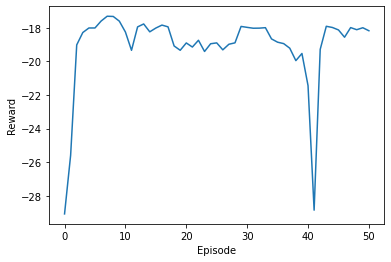

51


In [ ]:
plot_rewards(rewards_temp)
#print(rewards)
print(len(rewards_temp))

In [ ]:
def discount_rewards(rewards, gamma):
    discounted_rewards = np.zeros_like(rewards_temp)
    running_sum = 0
    for t in (range(len(rewards_temp))):
        running_sum = running_sum * gamma - rewards_temp[t]
        discounted_rewards[t] = running_sum
    return discounted_rewards

In [ ]:
print(discount_rewards(rewards_temp, 0.9))
d = discount_rewards(rewards_temp, 0.9)
plt.plot(range(len(d)), d)

NameError: ignored

* W4 --> EP 1000, Workers = 4 --> Time = 648.54 sec
* W3 --> EP 1000, Workers = 3 --> Time = 440.98 sec
* W2 --> EP 1000, Workers = 2 --> Time = 285.55 sec
* W1 --> EP 1000, Workers = 1 --> Time = 152.38 sec

In [ ]:
W4 = [-778, -8196, -910, -9085, -979, -12146, -1008, -11477, -1130, -13075, -1029, -13332, -1050, -12669, -1069, -13647, -949, -12632, -1089, -13285, -1089, -12937, -1049, -12582, -1090, -13236, -1079, -13090, -1039, -13088, -1119, -12983, -1040, -13182, -1030, -12644, -1060, -12840, -1129, -12954, -1130, -12894, -990, -13067, -1039, -13135, -1029, -13144, -1089, -13069, -1049, -12000, -1080, -12929, -1089, -13280, -1099, -13773, -1058, -12914, -1028, -13146, -1039, -13120, -1099, -13107, -1080, -12909, -1070, -13165, -979, -12917, -1100, -13303, -1099, -13203, -1080, -13407, -1100, -12918, -1030, -13255, -1100, -12867, -1009, -13219, -1080, -12860, -1140, -12617, -969, -12467, -1070, -13355, -1050, -12815, -1140, -12676, -1089, -12947, -1079, -12790, -1028, -13051, -1000, -12967, -1040, -12954, -1050, -13163, -1059, -13015, -1039, -13475, -1070, -13113, -1090, -13778, -1000, -12985, -1009, -13313, -1039, -13399, -1059, -13004, -1049, -13077, -1080, -13212, -1060, -13382, -1120, -13340, -1068, -12697, -1049, -12679, -1069, -12759, -1080, -12932, -1028, -12556, -1090, -13157, -1068, -13551, -1080, -13258, -989, -13031, -1059, -13147, -1039, -13251, -1070, -13296, -1060, -12342, -1089, -13053, -1039, -13058, -1110, -13553, -1059, -13303, -1039, -13030, -1040, -12853, -1030, -12488, -1090, -12863, -1049, -13059, -1029, -13558, -1039, -13390, -1069, -13552, -1060, -12722, -1039, -12909, -1089, -13685, -1029, -12873, -1000, -13139, -1040, -12914, -1040, -13100, -1049, -12843, -1080, -13040, -1108, -12796, -1099, -13210, -1099, -13183, -1119, -13029, -1010, -13797, -1080, -13748, -1059, -12925, -1009, -12892, -1129, -13249, -1029, -13219, -1120, -13023, -1079, -12242, -1039, -13641, -1089, -13028, -1040, -12969, -1099, -12807, -1070, -13604, -1119, -12978, -1060, -13288, -1109, -13587, -990, -13199, -1069, -13302, -1060, -13199, -1100, -13519, -1099, -13219, -1129, -12933, -1099, -12979, -1039, -13134, -1070, -13396, -1120, -13742, -1069, -13309, -1050, -12519, -1049, -12947, -1059, -13095, -1019, -12472, -1120, -13086, -1099, -12243, -1009, -13097, -1059, -12768, -1059, -12668, -1019, -12852, -1020, -12915, -1099, -13600, -1070, -12983, -1050, -13364, -1020, -12696, -1039, -13249, -1120, -13334, -1139, -13520, -1059, -12990, -1039, -13515, -1030, -13342, -1020, -13498, -1080, -13091, -1038, -13017, -1120, -13366, -1130, -13421, -1059, -12803, -1070, -13287, -1148, -13172, -1069, -13154, -1080, -12522, -1080, -13471, -1030, -13144, -1048, -12934, -1030, -13051, -970, -13077, -1000, -13233, -1089, -12842, -1090, -12710, -1068, -13669, -1070, -13022, -1050, -13019, -1029, -13516, -1089, -12947, -979, -13412, -1040, -13011, -1109, -13531, -1110, -13909, -1049, -12689, -1088, -13231, -1040, -13380, -1009, -13085, -1130, -13509, -1120, -12875, -1089, -13117, -1160, -12666, -1080, -13352, -1029, -12621, -990, -13162, -1090, -13103, -1129, -13066, -1168, -13082, -1019, -13149, -1090, -12890, -1049, -13085, -1060, -13620, -1020, -13213, -1058, -13393, -1049, -13029, -1040, -13025, -979, -12950, -1070, -13473, -1150, -13121, -1089, -12834, -1039, -13257, -1070, -12829, -1068, -12882, -1110, -13412, -1140, -13684, -1060, -13128, -1070, -13105, -1020, -13603, -1069, -13045, -1110, -13298, -1080, -12919, -1039, -13454, -999, -12999, -1008, -13257, -1030, -13728, -1060, -13052, -1069, -12779, -1059, -12824, -1029, -12650, -1049, -12957, -1049, -13324, -1070, -12647, -1020, -12930, -1070, -13014, -1009, -12442, -1060, -12860, -1059, -13096, -1069, -13327, -1169, -13215, -1040, -13413, -1070, -13703, -1130, -13168, -1050, -13209, -1060, -12863, -1070, -12817, -1110, -13216, -1080, -13428, -1090, -12906, -1078, -13416, -1009, -13156, -988, -12561, -1100, -12726, -1069, -12963, -1070, -13272, -1058, -12514, -1049, -13455, -1079, -12693, -1070, -13324, -1089, -13568, -1049, -12788, -1080, -12795, -1069, -12609, -1019, -13143, -1080, -12815, -1070, -12639, -1049, -13175, -989, -13085, -1089, -13243, -1060, -13443, -1110, -12910, -1068, -12986, -1130, -13047, -1009, -13092, -1070, -12686, -1030, -13084, -1028, -12469, -1019, -13101, -1079, -13574, -1080, -12965, -1079, -12591, -980, -12236, -1050, -13145, -1138, -13280, -1078, -13586, -1059, -13043, -1020, -13193, -1108, -13020, -1119, -13235, -989, -13010, -1030, -12921, -1139, -13600, -1060, -13383, -1050, -12965, -1140, -13709, -1010, -12881, -1099, -13102, -1000, -13218, -969, -13353, -1090, -12683, -1059, -13303, -1028, -13222, -1109, -13295, -1009, -13187, -1070, -13086, -990, -12633, -979, -13398, -1119, -13092, -1059, -12709, -1029, -13015, -1009, -12995, -1099, -13256, -1039, -12597, -1060, -12538, -1060, -12966, -1030, -12563, -1069, -13120, -1049, -12602, -1080, -13495, -1109, -13433, -1110, -12919, -1120, -13389, -1110, -13250, -1039, -13554, -1120, -13356, -1109, -12916, -1090, -13221, -1069, -13471, -1009, -13169, -1120, -13632, -1019, -12772, -1100, -13239, -1059, -12646, -1090, -13379, -1080, -13426, -1030, -13307, -1080, -13339, -1060, -12953, -1090, -13272, -1080, -12799, -1058, -13303, -1058, -13101, -1080, -12951, -1130, -13840, -1069, -13486, -1029, -12463, -1079, -13481, -1100, -13127, -1089, -13060, -1050, -13130, -1040, -12788, -1128, -13225, -1119, -13328, -1018, -12680, -1119, -12816, -1020, -13267, -1060, -12885, -1079, -13021, -1039, -13643, -1058, -13148, -1090, -12464, -1090, -12948, -1070, -13007, -1139, -12784, -1099, -12634, -1060, -13109, -1070, -12679, -1089, -13197, -1109, -13533, -1080, -12432, -1040, -12999, -1020, -12853, -1030, -12508, -1070, -12905, -1119, -13688, -1099, -12940, -1080, -12935, -1048, -12849, -1139, -13011, -1009, -13251, -1050, -13176, -1060, -12757, -1039, -12472, -1020, -13577, -960, -12924, -1060, -13546, -1079, -13004, -1110, -13415, -1109, -12919, -1059, -13163, -1119, -13151, -1079, -13272, -1109, -13378, -1090, -13170, -1039, -13020, -1099, -13086, -959, -13075, -1029, -13122, -1080, -13273, -1080, -12804, -1049, -13098, -1170, -12688, -1038, -13114, -1049, -12556, -1029, -12504, -1128, -13484, -1079, -13328, -1029, -12605, -1100, -13252, -1050, -12785, -1070, -12785, -1120, -12757, -1100, -12693, -1050, -13067, -1098, -12949, -1050, -13319, -999, -13380, -1070, -13013, -1089, -13411, -1119, -13352, -1020, -13247, -1040, -12820, -1079, -12990, -1010, -13328, -1100, -12828, -1060, -12664, -1039, -12689, -1139, -12959, -1059, -13246, -950, -12834, -1010, -12923, -1059, -12778, -1090, -12941, -1070, -13049, -1110, -12905, -1059, -12757, -1059, -13260, -1060, -12905, -1020, -12985, -1000, -13119, -1060, -12966, -1009, -13162, -1050, -13312, -970, -13389, -1109, -13621, -1079, -12690, -1110, -13147, -1110, -13047, -1038, -12392, -1099, -13883, -1089, -13071, -1070, -13177, -1009, -13513, -1070, -12997, -978, -13053, -1029, -12620, -1058, -13383, -1029, -13082, -1068, -12947, -1059, -13152, -1078, -12896, -1110, -13375, -1079, -13210, -960, -13589, -1079, -13192, -1070, -13099, -1050, -13257, -1069, -13223, -1059, -12976, -1050, -13535, -1020, -12780, -1080, -12826, -1120, -13077, -1129, -12732, -1019, -13214, -1110, -13242, -1109, -13233, -1090, -13303, -1020, -13237, -1069, -12704, -1080, -12324, -1040, -12772, -1069, -13324, -990, -13546, -1079, -13058, -969, -12630, -1000, -13102, -1068, -12801, -1099, -12903, -1120, -12938, -1040, -12706, -1079, -13068, -1060, -11909, -1028, -13454, -1139, -13149, -1100, -12611, -1098, -12743, -1040, -12250, -1090, -13201, -1030, -12453, -1038, -13070, -1050, -13556, -1040, -12958, -1119, -13472, -990, -13383, -1049, -13367, -1019, -12844, -1080, -13488, -1150, -12932, -1029, -12979, -1030, -13095, -1090, -13507, -1120, -12987, -1029, -12917, -1099, -13280, -999, -12665, -1109, -13508, -1080, -13466, -978, -12921, -1060, -12879, -1080, -12863, -1009, -13785, -1068, -13179, -1089, -13585, -1039, -12634, -1069, -12373, -998, -12891, -1089, -13161, -1040, -13400, -1049, -13194, -1070, -13083, -1150, -13625, -1099, -13630, -1040, -12601, -1068, -12994, -1000, -13400, -1020, -13199, -1069, -13117, -1080, -12405, -1059, -12687, -1070, -12721, -959, -12514, -1009, -12311, -1049, -13278, -1060, -13094, -940, -12985, -1030, -13131, -1099, -12766, -1029, -13704, -1039, -12837, -1079, -12829, -1020, -12570, -1090, -12354, -1110, -12794, -1090, -13102, -1059, -13091, -1069, -12463, -1099, -13182, -1129, -12932, -1080, -13511, -1099, -12598, -970, -13304, -1050, -13114, -1040, -13083, -1069, -12591, -1100, -13099, -1060, -13489, -989, -12797, -1070, -12895, -1049, -12766, -1090, -12584, -1030, -13160, -1080, -12931, -1040, -12900, -1119, -13318, -1069, -13456, -1069, -12760, -1130, -12452, -1070, -13155, -1030, -13079, -1058, -13264, -1019, -13618, -1090, -13227, -1069, -12916, -1109, -13263, -1029, -12790, -1129, -12410, -1060, -13286, -1090, -13009, -1070, -13072, -1020, -13331, -1090, -13161, -1060, -12708, -1009, -13148, -1069, -13149, -1029, -13163, -1020, -13158, -1060, -13022, -1050, -12693, -1179, -12890, -1060, -13355, -1129, -13320, -1119, -13330, -1089, -12795, -1060, -12831, -1048, -13058, -1100, -13199, -1019, -12955, -1030, -12615, -1039, -13454, -1099, -13324, -1090, -12969, -1000, -13008, -1029, -13622, -1080, -12725, -1060, -13465, -1120, -13440, -1040, -13366, -1039, -12993, -1110, -12805, -1079, -13410, -1059, -13611, -1129, -12533, -1089, -12694, -1089, -13156, -1110, -13353, -1000, -12968, -1030, -13181, -1049, -13029, -1080, -13438, -1039, -13348, -1010, -13703, -979, -12827, -1039, -12297, -1109, -13464, -1019, -12923, -999, -12965, -1099, -13409, -1050, -12604, -1019, -13550, -1119, -13687, -1109, -12960, -1000, -12676, -1089, -13248, -1060, -13069, -1099, -13788, -1070, -13099, -1069, -12970, -1030, -13941, -1010, -13082, -1119, -13454, -1019, -12722, -1179, -13513, -1150, -13660, -1040, -13246, -980, -13211, -1099, -13095, -1010, -12916, -1030, -13028, -1020, -12864, -1049, -13041, -1069, -12941, -1039, -13192, -1099, -13405, -1020, -13055, -1088, -13240, -989, -12691, -1050, -12976, -1099, -12962, -1059, -13283, -1009, -12502, -1059, -13342, -1060, -13052, -968, -12550, -1109, -13020, -1029, -13212, -1070, -12764, -1100, -12569, -1129, -13705, -1120, -13467, -1029, -13521, -1049, -13114, -1040, -12725, -1050, -12774, -1009, -12863, -1068, -13478, -1089, -12970, -1050, -13038, -1059, -13663, -1069, -12703, -990, -12885, -1050, -13467, -1010, -12846, -1029, -13412, -1090, -12941, -1090, -13911, -1069, -13180, -1050, -13202, -1020, -13165, -1119, -13484, -1059, -13613, -1009, -13048, -1090, -13239, -1060, -12936, -1069, -12829, -1068, -13238, -1119, -13172, -1009, -13288, -1120, -13522, -1020, -13691, -1099, -13235, -1070, -13097, -1050, -13414, -1059, -13476, -1070, -12826, -1130, -13278, -1050, -13130, -1009, -13288, -1079, -12782, -1029, -13054, -1070, -12997, -1008, -13228, -1130, -13170, -1110, -12914, -1018, -13210, -1058, -13502, -1060, -13492, -1090, -12771, -1029, -12870, -1159, -13527, -1009, -12730, -1090, -13291, -1070, -13086, -1079, -13032, -1020, -13189, -1080, -13590, -1109, -13462, -1100, -13547, -1100, -13480, -1119, -13298, -1048, -13308, -1049, -12941, -1050, -12996, -1090, -12960, -1070, -12853, -1090, -12761, -1158, -13756, -1050, -13280, -1120, -12876, -1140, -13622, -1079, -13428, -1070, -12888, -999, -12995, -1079, -13320, -1040, -13324, -1100, -12925, -1050, -13287, -1020, -13011, -1060, -12249, -1130, -12893, -1110, -13128, -1050, -12565, -1010, -12921, -1018, -12689, -1009, -12813, -1090, -12877, -999, -13609, -990, -12780, -1100, -13225, -1140, -13216, -1039, -13498, -1080, -12427, -1009, -13611, -1040, -13227, -1019, -13040, -999, -12730, -1089, -12883, -1030, -12950, -1070, -13022, -1039, -13153, -1099, -13165, -1120, -13164, -1050, -13217, -999, -13004, -1070, -13522, -1129, -13377, -1100, -13311, -1090, -12561, -1029, -13385, -999, -13482, -1079, -12980, -1070, -13077, -1029, -13536, -1019, -13443, -1070, -12884, -1049, -13202, -1089, -12798, -998, -13574, -1089, -13538, -1120, -13446, -1059, -13202, -1029, -12946, -1120, -12953, -1150, -13310, -1110, -12751, -1020, -12610, -990, -13369, -1109, -12899, -1020, -13166, -1149, -13001, -1039, -13064, -1058, -13312, -1030, -12492, -1090, -12741, -1100, -13241, -1030, -12687, -979, -13295, -1049, -12836, -1090, -12950, -1040, -12949, -1070, -13018, -1059, -13235, -1079, -13035, -1049, -13245, -1049, -13513, -1049, -12447, -980, -13087, -1070, -13219, -1078, -13098, -1110, -13035, -1039, -13280, -1089, -13358, -1110, -13472, -1050, -13175, -1080, -12832, -1100, -13029, -1100, -13957, -1120, -12970, -1089, -13154, -1079, -13169, -1070, -13030, -1069, -13405, -1100, -12960, -1080, -13319, -1040, -13101, -1039, -13171, -999, -12948, -1029, -13325, -1070, -12772, -1038, -12891, -1099, -13424, -1070, -13062, -1078, -13267, -1070, -13267, -1089, -13017, -1059, -12954, -1060, -12484, -1150, -12882, -1069, -13176, -1120, -12825, -1029, -13046, -1090, -13113, -1139, -12769, -1090, -13215, -1099, -12667, -1060, -13068, -1070, -13141, -1050, -12607, -1039, -12933, -1049, -13328, -1029, -12548, -1109, -13427, -1078, -12701, -1070, -12613, -1089, -12772, -999, -13728, -1009, -12923, -1109, -13196, -1110, -12837, -1098, -13016, -1110, -13160, -990, -12837, -1020, -13240, -1019, -13006, -1060, -12672, -1130, -13392, -1048, -12354, -1019, -12874, -1059, -13413, -1050, -12540, -1019, -13301, -1010, -13237, -1050, -13519, -1049, -12908, -1029, -13023, -1090, -12816, -1180, -13226, -1049, -13012, -1098, -13463, -1119, -12683, -1058, -13396, -999, -13189, -1109, -13314, -1109, -12747, -1020, -13453, -1100, -13398, -1120, -13573, -1089, -13525, -1039, -13513, -1089, -13545, -1119, -13409, -1069, -13451, -989, -13359, -1100, -13257, -1089, -13153, -1039, -13624, -1080, -13119, -1068, -12824, -1020, -12810, -1079, -13035, -1109, -13865, -1049, -12702, -1100, -13050, -1008, -12315, -1049, -13273, -1090, -13432, -1099, -12548, -1048, -13586, -1058, -12731, -1070, -12676, -1129, -12754, -1060, -12482, -1070, -13008, -1050, -13275, -1090, -12711, -1069, -13503, -1139, -13461, -1160, -13771, -1049, -13360, -1029, -13494, -1069, -13014, -1099, -13199, -1089, -12673, -1050, -13296, -1090, -12920, -1109, -12836, -1010, -13026, -1119, -12537, -998, -13530, -1089, -13002, -1109, -13179, -1050, -12945, -1030, -12811, -1150, -13653, -1069, -13280, -1099, -12400, -1020, -13152, -1030, -13625, -1068, -13022, -1018, -12845, -1079, -12887, -1060, -12847, -1110, -13046, -1070, -13078, -1058, -13277, -1050, -13475, -1079, -13311, -1079, -13185, -1110, -12965, -1128, -13852, -990, -13106, -999, -12630, -1060, -12986, -1040, -12683, -1050, -12415, -1060, -13116, -999, -12683, -1039, -12595, -1080, -12906, -1080, -12794, -1009, -12892, -960, -13198, -1020, -13637, -1089, -13103, -1060, -13016, -1150, -13253, -1120, -13424, -1029, -13135, -1109, -13497, -1118, -12710, -1069, -12772, -1050, -12906, -1069, -13280, -980, -12978, -1140, -13021, -1080, -12820, -1048, -12505, -1040, -13051, -1080, -13038, -1090, -13260, -1029, -13212, -1058, -13020, -1070, -13027, -1070, -13000, -1099, -13029]

In [ ]:
W3 = [-761, -341788, -940, -7585, -708, -7407, -730, -3951, -710, -3487, -690, -5491, -679, -4414, -699, -4418, -657, -4353, -667, -4386, -658, -4133, -700, -2776, -710, -3185, -690, -1814, -699, -4189, -602, -3810, -678, -3076, -667, -3696, -657, -3668, -688, -3426, -699, -3459, -700, -4114, -720, -4940, -602, -4284, -679, -4331, -648, -4373, -688, -3929, -669, -3220, -700, -2877, -690, -5373, -710, -7040, -699, -4968, -677, -4977, -678, -4340, -678, -3024, -657, -2982, -680, -2750, -710, -3339, -700, -4204, -635, -4361, -646, -4365, -647, -4308, -677, -4388, -669, -5870, -710, -4797, -700, -2267, -646, -1270, -601, -2821, -658, -3442, -679, -3743, -700, -3319, -656, -5740, -699, -2499, -690, -3930, -613, -4319, -689, -7002, -688, -2187, -710, -2436, -689, -4005, -680, -5121, -645, -4483, -647, -3548, -678, -4650, -570, -5373, -658, -3317, -656, -4754, -667, -3194, -678, -2182, -667, -4814, -680, -1602, -700, -2756, -710, -6431, -709, -7200, -666, -4247, -658, -4422, -657, -4407, -680, -5872, -689, -4739, -710, -3064, -690, -5056, -669, -5618, -645, -4358, -688, -4216, -635, -5325, -679, -7162, -646, -5616, -698, -3644, -658, -1944, -668, -4706, -668, -2437, -688, -3680, -700, -5330, -680, -4497, -646, -4421, -658, -7092, -680, -3772, -700, -4400, -644, -5550, -636, -1714, -710, -3586, -690, -3408, -680, -4496, -589, -5164, -677, -3607, -679, -2379, -668, -2449, -669, -1893, -670, -2541, -690, -3738, -710, -4138, -658, -5450, -657, -4618, -688, -2950, -688, -4404, -668, -4360, -688, -1836, -710, -3129, -700, -6018, -710, -6785, -612, -6726, -689, -3969, -678, -2036, -657, -1714, -678, -2445, -690, -3630, -658, -3650, -559, -3649, -646, -4514, -678, -4280, -668, -2248, -690, -3634, -668, -5634, -645, -4705, -646, -4464, -690, -5168, -667, -3077, -690, -5816, -668, -5378, -657, -4425, -666, -3805, -646, -3548, -680, -3099, -690, -4852, -710, -6673, -646, -6960, -656, -4587, -658, -4341, -677, -1853, -647, -1730, -690, -2331, -700, -4025, -680, -6292, -689, -6867, -667, -5352, -679, -4350, -677, -3671, -658, -4419, -679, -2290, -710, -3063, -680, -4945, -690, -7102, -699, -4985, -668, -4315, -677, -4544, -667, -2877, -656, -3400, -668, -4122, -645, -4679, -676, -4238, -636, -1845, -636, -3505, -678, -4351, -699, -5677, -657, -4419, -690, -3969, -667, -2732, -690, -5370, -635, -4205, -603, -3506, -677, -3243, -688, -3843, -668, -1877, -677, -2033, -680, -3149, -690, -3542, -690, -6135, -656, -6831, -669, -3776, -668, -3423, -679, -1737, -679, -1425, -720, -1618, -680, -3120, -690, -5960, -679, -4645, -657, -4341, -668, -4401, -667, -3161, -699, -1817, -636, -2715, -690, -2552, -690, -5323, -680, -4969, -625, -4814, -669, -4063, -636, -4379, -658, -2812, -689, -2109, -690, -2154, -700, -4581, -710, -6145, -678, -4858, -690, -5006, -679, -4219, -699, -6414, -647, -3147, -699, -904, -690, -3000, -680, -5387, -680, -4783, -625, -4451, -666, -4362, -677, -4437, -646, -4286, -635, -3969, -700, -2823, -700, -3352, -690, -4198, -678, -4353, -658, -4386, -679, -4384, -688, -4349, -655, -4359, -710, -1925, -680, -3559, -690, -3428, -700, -4463, -589, -4798, -667, -3463, -657, -4019, -667, -2363, -677, -1942, -700, -2513, -710, -5108, -710, -6890, -679, -5988, -678, -4385, -625, -3325, -658, -3007, -657, -5922, -688, -4413, -680, -3263, -700, -4253, -624, -4408, -668, -4415, -667, -4376, -678, -4444, -636, -4420, -710, -4040, -690, -3180, -700, -4100, -657, -4404, -690, -4357, -680, -5193, -645, -4429, -680, -4399, -710, -3824, -634, -2766, -677, -1474, -699, -4362, -602, -4251, -669, -4400, -635, -4383, -658, -4298, -680, -4214, -710, -4195, -678, -2382, -657, -2964, -668, -3393, -680, -2757, -700, -5286, -666, -4736, -669, -4575, -657, -5169, -658, -3009, -677, -1941, -688, -1553, -680, -2315, -700, -4096, -690, -5970, -670, -5441, -680, -4199, -690, -3848, -646, -1940, -676, -1531, -710, -5174, -668, -4782, -699, -3339, -658, -1987, -669, -1822, -690, -2745, -690, -3101, -680, -6164, -699, -6000, -646, -6216, -667, -3473, -667, -3868, -579, -3466, -680, -3152, -624, -2485, -680, -2102, -700, -1762, -700, -2193, -658, -3113, -645, -3222, -669, -2936, -657, -1797, -690, -4663, -700, -6708, -679, -4317, -698, -5570, -678, -4397, -657, -1471, -666, -1972, -680, -3947, -690, -3418, -710, -5449, -689, -6701, -602, -4419, -655, -4368, -656, -4394, -647, -4386, -646, -4173, -700, -2952, -700, -3277, -700, -4223, -679, -4713, -668, -4418, -647, -2723, -656, -3888, -667, -2317, -690, -1683, -710, -4183, -710, -6595, -680, -4000, -680, -4426, -710, -4552, -700, -6360, -700, -4891, -654, -3705, -700, -4816, -680, -3011, -710, -2638, -657, -4317, -656, -4453, -657, -4349, -690, -4420, -679, -3400, -699, -3764, -678, -2060, -656, -2798, -657, -1035, -689, -4821, -689, -3595, -678, -3111, -646, -4311, -680, -1608, -680, -4148, -680, -6336, -679, -4385, -624, -4298, -678, -4376, -667, -4383, -635, -4284, -680, -3484, -658, -2513, -679, -1898, -636, -2254, -700, -2335, -612, -4524, -666, -5929, -600, -6185, -690, -5783, -668, -3786, -680, -2825, -690, -2950, -700, -3667, -678, -3501, -700, -4357, -669, -4369, -678, -4451, -700, -4008, -690, -2974, -700, -4579, -690, -2816, -646, -4420, -635, -4646, -680, -6794, -680, -5562, -700, -4068, -680, -2870, -690, -3878, -698, -4386, -677, -4327, -656, -4450, -710, -4777, -667, -4338, -700, -5232, -592, -2868, -710, -3065, -657, -2436, -678, -4448, -668, -4383, -678, -4405, -658, -4461, -700, -4699, -700, -2797, -710, -3210, -690, -4080, -689, -4313, -657, -4381, -647, -4307, -690, -6564, -668, -6730, -601, -5569, -700, -2999, -690, -3699, -690, -1759, -700, -3915, -688, -3562, -680, -5170, -710, -6406, -680, -4701, -680, -2923, -680, -3053, -657, -4306, -678, -4354, -658, -4326, -679, -4388, -647, -6290, -690, -4397, -720, -4273, -678, -1602, -710, -4781, -678, -3656, -710, -3307, -657, -2290, -678, -2896, -666, -5317, -690, -1847, -680, -2835, -690, -2288, -679, -4285, -669, -3706, -678, -3653, -688, -3197, -668, -1164, -700, -1863, -700, -3702, -680, -5875, -710, -4397, -558, -5103, -688, -3799, -658, -4450, -667, -3591, -689, -1316, -690, -3958, -680, -4912, -700, -4301, -678, -5421, -688, -2991, -666, -3279, -690, -4515, -646, -6164, -690, -4694, -667, -2586, -612, -2645, -657, -1804, -690, -1619, -667, -4371, -667, -4374, -669, -4283, -680, -4596, -668, -2996, -647, -2064, -680, -4431, -624, -4366, -666, -4328, -600, -5098, -657, -4375, -646, -4234, -680, -2812, -710, -3261, -679, -2855, -657, -4371, -657, -4322, -700, -4341, -680, -5109, -655, -6856, -690, -4989, -720, -2961, -690, -3647, -699, -4439, -710, -3967, -668, -4330, -668, -5213, -636, -4185, -669, -6499, -700, -3335, -690, -3064, -657, -2066, -646, -3879, -657, -3659, -710, -5546, -668, -4831, -680, -4620, -668, -3130, -636, -1645, -669, -3889, -657, -4243, -689, -4311, -669, -4417, -689, -6458, -700, -5321, -700, -3417, -623, -3860, -669, -4085, -678, -3850, -678, -4776, -658, -4437, -667, -4700, -690, -4740, -680, -3434, -690, -4412, -699, -3227, -699, -1678, -580, -3755, -668, -4734, -678, -3980, -647, -4268, -657, -4468, -700, -2933, -668, -4703, -710, -2430, -690, -3520, -680, -2854, -680, -5104, -720, -7367, -646, -7127, -656, -4545, -678, -4328, -678, -4260, -656, -3041, -657, -3880, -690, -4643, -700, -5124, -679, -6958, -667, -3760, -646, -2174, -710, -3648, -700, -4031, -690, -3912, -668, -4769, -658, -3781, -688, -2084, -700, -3021, -700, -3348, -680, -4672, -669, -5703, -699, -3748, -690, -4212, -592, -4821, -687, -4426, -688, -3570, -710, -2824, -700, -4922, -690, -6640, -679, -5628, -657, -5067, -646, -4296, -688, -4448, -677, -4304, -690, -2603, -690, -3152, -680, -3717, -689, -4405, -656, -4330, -646, -4250, -700, -5855, -690, -5077, -646, -6064, -666, -2812, -667, -1839, -647, -1302, -579, -4273, -678, -4075, -668, -4386, -690, -5081, -700, -7463, -690, -4538, -690, -3174, -679, -2766, -580, -4150, -657, -4397, -678, -4434, -647, -4315, -657, -4321, -634, -3782, -700, -2875, -710, -3413, -710, -4235, -667, -4340, -688, -4397, -689, -4385, -678, -4362, -657, -5232, -688, -4929, -690, -2589, -679, -1442, -669, -3198, -680, -2990, -666, -3592, -669, -4451, -678, -4380, -624, -3988, -700, -2848, -690, -3276, -700, -4239, -678, -3772, -688, -4371, -667, -5169, -677, -5447, -677, -6792, -680, -4336, -690, -3243, -634, -2665, -690, -5302, -658, -5284, -699, -5055, -657, -3048, -655, -3228, -678, -1253, -710, -2773, -690, -5017, -699, -5927, -613, -4875, -656, -4101, -677, -3290, -656, -3466, -600, -4402, -680, -2921, -680, -3773, -678, -4025, -657, -4518, -690, -3801, -677, -5514, -700, -6827, -690, -5258, -646, -3786, -680, -5019, -657, -4083, -667, -3907, -657, -3944, -710, -4372, -710, -3743, -679, -4926, -710, -5130, -720, -3105, -699, -3628, -679, -6272, -700, -4991, -700, -4842, -710, -4384, -600, -7004, -666, -5012, -700, -3866, -710, -5358, -679, -4660, -613, -5418, -658, -3275, -678, -3384, -678, -1717, -646, -1188, -680, -2043, -710, -5898, -710, -4735, -623, -4427, -677, -4449, -688, -5201, -658, -2968, -667, -1468, -680, -2481, -690, -3418, -680, -5615, -689, -4375, -679, -4480, -669, -4371, -658, -4261, -658, -1907, -669, -1620, -710, -3559, -710, -6348, -700, -4001, -710, -2134, -710, -3754, -680, -3720, -657, -4544, -668, -3604, -690, -4096, -690, -5957, -689, -6534, -678, -2007, -666, -6018, -667, -4352, -679, -4338, -657, -3674, -690, -2903, -680, -4814, -710, -5221, -680, -2887, -687, -4851, -667, -4769, -678, -4362, -658, -1902, -623, -3375, -658, -2849, -678, -1927, -700, -1957, -668, -3267, -680, -2499, -710, -3063, -680, -4450, -601, -5287, -700, -3746, -690, -4507, -579, -3944, -678, -6060, -690, -3043, -667, -4365, -700, -5032, -699, -4391, -690, -2713, -710, -3188, -690, -3823, -592, -4302, -647, -4361, -688, -4414, -657, -2436, -690, -4397, -690, -3697, -700, -3828, -700, -6805, -680, -1529, -658, -4303, -688, -4291, -678, -1965, -690, -4671, -678, -4742, -668, -4352, -636, -1700, -667, -2051, -678, -4642, -667, -3409, -658, -2132, -690, -2238, -700, -3776, -700, -2990, -667, -2729, -669, -1642, -591, -3895, -680, -3072, -637, -4287, -690, -5666, -644, -4174, -666, -4761, -680, -3516, -666, -3019, -666, -4810, -668, -4441, -688, -4038, -668, -5998, -656, -2090, -680, -3123, -700, -5730, -690, -6816, -579, -6763, -688, -3955, -668, -1998, -689, -1685, -699, -3214, -700, -2525, -680, -4400, -689, -7334, -634, -6414, -677, -3738, -667, -2786, -667, -2311, -666, -1519, -710, -3381, -690, -4505, -700, -5438, -580, -5454, -646, -4648, -677, -3467, -679, -1826, -689, -4383, -680, -2831, -710, -3206, -690, -3962, -679, -4414, -667, -4321, -647, -4350, -700, -5568, -658, -5383, -667, -5670, -647, -2963, -677, -1837, -559, -4102, -657, -4333, -700, -3845, -688, -4311, -677, -5637, -646, -3600, -690, -2560, -700, -4932, -710, -4883, -590, -3659, -699, -3986, -680, -5525, -656, -4339, -658, -4399, -680, -2813, -710, -2747, -700, -4022, -613, -4274, -658, -4277, -657, -4336, -699, -6324, -657, -4408, -700, -3369, -666, -3023, -668, -2615, -647, -1268, -678, -3549, -668, -4327, -679, -4344, -657, -4381, -635, -3689, -657, -2980, -710, -2837, -677, -1979, -678, -3796, -710, -4183, -668, -3436, -699, -3182, -667, -4203, -690, -3433, -700, -3289, -669, -2748, -657, -4155, -666, -5735, -679, -4341, -658, -4404, -658, -4363, -656, -2327, -710, -3099, -700, -2162, -623, -1901, -710, -3206, -678, -4415, -647, -4287, -667, -4392, -666, -3975, -700, -2960, -710, -3339, -690, -6774, -667, -7047, -679, -4827, -658, -2827, -658, -1647, -666, -2028, -710, -2297, -710, -3856, -680, -6437, -699, -6461, -666, -5522, -647, -3754, -656, -3883, -678, -6205, -656, -2558, -679, -4218, -644, -2180, -667, -2535, -710, -3862, -647, -4664, -688, -4056, -658, -2959, -667, -3468, -635, -3073, -690, -3636, -710, -5041, -679, -3718, -688, -2525, -668, -4287, -667, -4420, -679, -5529, -688, -3710, -690, -3247, -647, -2076, -668, -3759, -680, -2964, -700, -5634, -658, -4194, -646, -3942, -700, -1374, -690, -4741, -680, -6001, -679, -7357, -688, -3841, -647, -3369, -689, -1860, -657, -1428, -699, -1491, -690, -2925, -689, -3418, -658, -1909, -700, -3557, -710, -5422, -647, -4317, -680, -4406, -680, -4387, -657, -2704, -710, -3835, -699, -4447, -625, -4327, -658, -4454, -657, -4386, -710, -6157, -645, -4871, -710, -2295, -710, -1814, -669, -2309, -667, -5863, -646, -4455, -666, -4351, -636, -3306, -699, -2440, -700, -3911, -690, -3870, -690, -4677, -677, -2518, -658, -2492, -679, -2574, -690, -2200, -710, -3072, -634, -2229, -710, -4119, -680, -4816, -710, -6989, -700, -3195, -690, -3987, -700, -3092, -624, -1668, -690, -2360, -690, -4274, -647, -4340, -680, -4452, -700, -4752, -690, -2839, -680, -2689, -669, -4044, -669, -2994, -689, -3149, -668, -3936, -680, -5449, -668, -5373, -680, -1703, -689, -2799, -646, -4846, -710, -3366, -570, -6550, -699, -4425, -646, -4212, -689, -4404, -690, -5800, -690, -6044, -669, -6912, -690, -4687, -580, -3997, -679, -2738, -678, -1709, -657, -1819, -689, -2821, -658, -2676, -700, -2862, -680, -4494, -667, -4383, -687, -4362, -677, -4306, -689, -4399]

Second

In [ ]:
W3 = [-776, -7962, -740, -5435, -678, -3712, -646, -3834, -690, -3477, -669, -3600, -690, -3495, -678, -3429, -720, -3270, -690, -3824, -680, -5070, -677, -3561, -690, -3965, -689, -4600, -677, -4206, -700, -2801, -688, -3847, -679, -3233, -656, -3128, -678, -1511, -700, -3974, -690, -3413, -679, -4329, -624, -4308, -677, -5800, -657, -4321, -677, -4430, -666, -3999, -680, -2868, -710, -3456, -710, -4263, -614, -4306, -668, -4570, -646, -3948, -677, -1537, -646, -3187, -635, -3155, -589, -4462, -668, -3908, -669, -3816, -667, -5231, -700, -4650, -710, -5869, -658, -4084, -668, -4189, -690, -4933, -680, -4208, -700, -4012, -689, -5676, -677, -3206, -658, -2969, -658, -4550, -657, -3161, -700, -1388, -710, -5107, -680, -6802, -669, -3950, -690, -2948, -668, -4177, -624, -3349, -602, -4375, -690, -3008, -699, -3681, -647, -4369, -667, -4578, -668, -5037, -680, -3234, -678, -3254, -678, -5960, -657, -1527, -688, -2807, -700, -5698, -699, -6766, -677, -5342, -657, -4417, -666, -4386, -690, -5135, -699, -7094, -667, -4577, -668, -2347, -646, -4350, -690, -1533, -680, -4156, -690, -5357, -669, -4355, -700, -4452, -700, -4441, -667, -2389, -647, -3385, -700, -1910, -658, -4384, -678, -4294, -690, -5707, -690, -5783, -593, -3810, -658, -2656, -667, -1953, -679, -1666, -679, -4361, -658, -4378, -720, -6338, -700, -6840, -657, -3451, -655, -2619, -710, -3951, -613, -3089, -690, -4412, -689, -4476, -680, -3364, -669, -4540, -710, -1797, -700, -3068, -710, -5653, -699, -4407, -668, -4806, -666, -4317, -678, -2189, -680, -4960, -690, -3610, -680, -3647, -710, -3461, -658, -1723, -647, -3913, -647, -4317, -710, -5847, -690, -7144, -690, -6076, -700, -2852, -689, -2360, -700, -4454, -679, -4628, -710, -3013, -668, -5149, -656, -2992, -678, -3921, -656, -3427, -700, -4997, -710, -4598, -669, -2902, -646, -3493, -680, -4247, -678, -4793, -658, -1626, -646, -1269, -710, -2865, -690, -5265, -690, -7049, -646, -4750, -657, -3898, -666, -4591, -657, -4215, -636, -3790, -690, -3706, -667, -4487, -680, -4986, -668, -5200, -700, -2950, -603, -4027, -677, -3580, -677, -2810, -659, -2902, -690, -4375, -690, -3501, -679, -4363, -634, -4371, -666, -4351, -647, -3933, -679, -4591, -699, -3672, -669, -3506, -688, -2280, -680, -2983, -690, -2100, -667, -4431, -667, -3523, -667, -3263, -645, -3529, -677, -2449, -680, -3531, -700, -6181, -680, -7135, -623, -4396, -689, -3790, -678, -4424, -658, -3594, -655, -1435, -690, -3007, -680, -4513, -700, -5069, -667, -6584, -669, -4677, -677, -4296, -647, -4351, -655, -1833, -680, -1801, -700, -3284, -710, -3860, -699, -4394, -666, -4396, -647, -3878, -667, -2207, -700, -6790, -677, -5701, -667, -3662, -658, -2062, -667, -1319, -658, -1340, -679, -3186, -710, -5166, -699, -6953, -677, -4416, -690, -2853, -700, -3217, -688, -1748, -688, -1812, -690, -4405, -710, -4336, -710, -6437, -625, -2949, -658, -3129, -668, -4306, -710, -3090, -657, -6712, -677, -5683, -688, -4135, -656, -3955, -646, -3373, -668, -4371, -679, -4601, -700, -5470, -720, -5955, -699, -4996, -689, -5169, -646, -3259, -688, -3119, -635, -3525, -677, -3951, -700, -5442, -680, -4855, -669, -5403, -622, -3921, -679, -3318, -669, -3810, -669, -3444, -635, -1339, -680, -2799, -710, -4879, -690, -4220, -655, -4548, -657, -4788, -668, -4363, -677, -2454, -657, -3593, -710, -2801, -700, -4658, -688, -1748, -647, -3892, -657, -4396, -646, -3765, -657, -4438, -700, -6375, -669, -3160, -690, -3726, -688, -2680, -700, -910, -700, -2830, -690, -3300, -668, -4372, -700, -5081, -680, -5816, -680, -3627, -667, -1962, -658, -2270, -668, -3292, -678, -4282, -690, -4888, -647, -4565, -645, -4902, -678, -4690, -680, -3595, -689, -1662, -689, -4348, -668, -4388, -668, -4253, -677, -4361, -677, -4359, -680, -3426, -690, -2945, -710, -3514, -657, -3978, -669, -4407, -678, -4382, -667, -4347, -720, -6351, -678, -4307, -690, -4002, -678, -2415, -667, -3425, -688, -4183, -699, -4009, -700, -5342, -657, -4735, -625, -2063, -690, -3042, -688, -2397, -657, -1615, -700, -1475, -689, -3010, -700, -4959, -678, -3418, -677, -2020, -700, -1714, -690, -4108, -690, -6009, -710, -7416, -612, -6342, -646, -4341, -677, -4320, -699, -1477, -689, -3064, -647, -3499, -668, -4049, -646, -3477, -622, -4273, -690, -3568, -700, -5360, -700, -4842, -700, -7316, -680, -2782, -678, -2850, -636, -2351, -667, -1512, -680, -3752, -591, -4497, -678, -4499, -669, -6713, -668, -5469, -666, -1704, -710, -3395, -700, -4351, -603, -4509, -658, -4387, -667, -4260, -688, -2448, -657, -1220, -710, -2309, -710, -5120, -700, -6428, -658, -4647, -690, -3237, -690, -4013, -690, -2807, -700, -2396, -690, -4391, -690, -4317, -658, -6589, -669, -4489, -680, -4868, -678, -3872, -667, -2879, -657, -3255, -656, -4928, -678, -4417, -670, -4714, -647, -3421, -657, -4321, -690, -3202, -680, -4620, -690, -4328, -679, -3678, -689, -4727, -656, -3601, -658, -3692, -710, -3297, -698, -4394, -646, -1790, -689, -6862, -669, -4189, -690, -3838, -699, -4202, -679, -1986, -680, -3073, -690, -5565, -668, -4573, -655, -4403, -668, -3362, -669, -4953, -657, -3118, -678, -4466, -667, -2118, -699, -4355, -680, -4402, -700, -6596, -646, -2731, -658, -2254, -690, -6064, -677, -3118, -710, -2513, -690, -3446, -690, -6253, -646, -3106, -614, -4440, -657, -4790, -690, -3787, -700, -4982, -720, -4696, -690, -2296, -700, -4004, -669, -6139, -603, -6444, -699, -5427, -656, -2294, -647, -1799, -679, -6522, -603, -4232, -636, -4387, -677, -4415, -666, -4339, -646, -4320, -710, -2744, -690, -3060, -699, -3275, -658, -3583, -659, -4163, -710, -3868, -680, -5763, -690, -6311, -668, -3550, -700, -2962, -680, -3368, -700, -4406, -579, -4372, -647, -4308, -688, -4426, -669, -4447, -669, -4361, -657, -3441, -668, -3039, -657, -1696, -667, -2493, -689, -4432, -679, -6143, -678, -5107, -678, -6434, -700, -4916, -700, -2005, -612, -2369, -688, -1936, -668, -3427, -625, -3882, -669, -4635, -667, -5342, -680, -2017, -666, -3950, -679, -2118, -677, -1216, -690, -5110, -590, -3642, -679, -3268, -624, -3284, -657, -3465, -689, -3612, -700, -3701, -669, -3786, -668, -3672, -678, -4380, -700, -5264, -647, -4072, -678, -4040, -646, -4546, -690, -3165, -710, -4030, -688, -3293, -668, -3926, -679, -2055, -700, -5198, -700, -6982, -680, -5572, -658, -3471, -700, -3281, -680, -6457, -689, -4472, -624, -4295, -634, -4332, -635, -3625, -667, -1982, -657, -2382, -680, -3823, -680, -2561, -677, -3557, -668, -4179, -656, -4282, -690, -5815, -690, -6884, -646, -3418, -710, -2698, -688, -2907, -655, -1531, -678, -4116, -636, -4176, -658, -4242, -700, -5527, -669, -6847, -667, -4941, -700, -5768, -690, -4067, -657, -3945, -680, -1560, -636, -4927, -667, -4451, -687, -4435, -656, -1250, -690, -1745, -710, -4886, -680, -6811, -657, -5437, -646, -4888, -658, -4717, -657, -4677, -669, -6575, -624, -3455, -603, -1857, -699, -4225, -569, -4253, -667, -4571, -688, -4446, -688, -4333, -677, -4322, -700, -3296, -647, -1653, -690, -2899, -699, -5304, -680, -2426, -667, -5262, -647, -4319, -656, -6878, -669, -5104, -710, -4028, -680, -5985, -680, -6599, -669, -4169, -679, -5168, -658, -4321, -668, -1920, -688, -1885, -668, -1492, -710, -4554, -690, -5232, -669, -4686, -644, -5493, -666, -3161, -634, -3061, -677, -1862, -658, -3048, -710, -2921, -690, -3370, -680, -4189, -623, -4284, -688, -4417, -668, -4354, -658, -4351, -669, -6795, -678, -3950, -710, -2301, -710, -1992, -700, -3477, -678, -1882, -687, -4708, -710, -4408, -699, -5357, -679, -5968, -680, -3032, -710, -3552, -658, -4076, -646, -4277, -668, -3725, -689, -6240, -680, -4502, -699, -4418, -656, -3991, -700, -3177, -700, -4123, -688, -4411, -668, -4384, -678, -4373, -658, -4343, -645, -1843, -690, -1966, -680, -4576, -680, -3711, -699, -4927, -669, -5410, -669, -3530, -678, -3689, -656, -1799, -687, -2944, -689, -3513, -647, -1675, -679, -4306, -680, -3888, -647, -4337, -656, -2076, -668, -1321, -645, -1767, -690, -2730, -679, -3315, -710, -4154, -667, -6753, -668, -4318, -679, -4388, -666, -4348, -689, -4432, -700, -2704, -690, -3163, -656, -1933, -657, -1809, -699, -3933, -710, -4101, -670, -5651, -657, -6561, -690, -6341, -669, -3996, -647, -2503, -690, -3152, -678, -4107, -678, -4374, -678, -4834, -680, -6918, -658, -5336, -657, -4931, -656, -2683, -710, -3414, -700, -3497, -666, -4418, -635, -2957, -658, -5430, -678, -6844, -700, -4538, -668, -1711, -636, -1141, -601, -3048, -678, -3854, -690, -5201, -690, -5077, -679, -6989, -710, -4023, -680, -2837, -680, -3321, -668, -3065, -625, -4429, -667, -4329, -690, -5452, -688, -5700, -710, -5370, -667, -4613, -700, -3157, -601, -3104, -646, -1780, -700, -2490, -645, -4352, -678, -4328, -688, -4342, -614, -4244, -647, -2869, -602, -2726, -678, -3939, -710, -3923, -657, -3417, -601, -4260, -669, -4214, -657, -3462, -657, -2605, -679, -3574, -656, -1555, -690, -4101, -677, -4542, -688, -4348, -668, -6509, -698, -5527, -689, -2739, -680, -1848, -690, -1812, -677, -2971, -658, -4342, -648, -4355, -657, -4321, -658, -4111, -710, -2845, -720, -3297, -690, -4168, -624, -4338, -657, -4386, -657, -4428, -646, -4431, -656, -4373, -700, -2736, -690, -3163, -656, -1171, -669, -3365, -678, -4204, -710, -5267, -636, -4969, -720, -4406, -669, -4701, -710, -3280, -657, -1637, -678, -3610, -656, -4074, -666, -4310, -710, -5728, -710, -6208, -656, -5993, -690, -5579, -690, -2173, -669, -1938, -700, -2332, -679, -2636, -656, -4846, -690, -5882, -690, -5599, -668, -4233, -710, -2581, -710, -3207, -668, -3649, -658, -2159, -668, -4155, -668, -4430, -668, -4403, -646, -4482, -700, -2701, -680, -3043, -690, -3657, -669, -4398, -689, -3524, -690, -1888, -625, -4285, -668, -4004, -658, -6195, -655, -4118, -679, -2524, -668, -4205, -657, -3716, -720, -4925, -644, -5504, -677, -6283, -666, -6696, -700, -3820, -689, -2935, -657, -2781, -700, -4967, -645, -4854, -689, -4831, -679, -4161, -624, -6210, -690, -5064, -645, -4571, -689, -2872, -688, -2668, -678, -3432, -700, -3450, -679, -5820, -644, -5967, -690, -4930, -689, -5165, -679, -2630, -656, -3147, -647, -3069, -679, -4312, -666, -4436, -669, -4352, -688, -4339, -700, -2755, -690, -3118, -646, -2040, -688, -4354, -679, -4347, -658, -4322, -678, -4383, -667, -1087, -669, -1610, -612, -3711, -700, -4538, -700, -5111, -658, -6122, -645, -6146, -636, -3885, -613, -4898, -646, -3164, -680, -1564, -710, -3800, -700, -5831, -710, -6216, -600, -4780, -635, -4251, -667, -4643, -679, -3988, -656, -3076, -658, -3559, -679, -1855, -658, -1249, -688, -1625, -710, -3336, -678, -4271, -679, -1972, -646, -1502, -699, -1458, -710, -4029, -680, -5064, -680, -3611, -710, -3892, -690, -4317, -690, -5783, -678, -4392, -658, -3983, -658, -4086, -690, -4940, -710, -5046, -680, -3072, -656, -3503, -688, -3324, -680, -4361, -720, -6038, -689, -4456, -669, -1983, -700, -1542, -690, -1936, -669, -4219, -677, -4394, -700, -6495, -678, -3320, -647, -1737, -690, -3028, -680, -3373, -700, -5023, -570, -4243, -669, -4362, -678, -4375, -667, -2887, -657, -7138, -668, -4323, -679, -4516, -679, -3810, -689, -4793, -690, -2925, -690, -4278, -635, -3501, -666, -1902, -657, -1634, -669, -3252, -700, -3880, -710, -4332, -669, -4417, -710, -4816, -689, -3858, -656, -4247, -658, -3513, -658, -3302, -657, -4505, -667, -4009, -679, -4143, -656, -3669, -690, -4312, -656, -4351, -667, -4382, -680, -3270, -668, -4616, -700, -3274, -656, -1408, -658, -2888, -647, -5337, -647, -4420, -669, -6451, -688, -5749, -658, -4874, -646, -2427, -667, -1319, -636, -1545, -690, -3667, -657, -4672, -720, -6444, -635, -7112, -710, -5673, -679, -3583, -678, -2209, -680, -2955, -680, -1914, -668, -4033, -680, -5573, -602, -5182, -644, -4777, -666, -4541, -710, -3682, -680, -5146, -669, -4368, -581, -4724, -658, -4814, -667, -3258, -676, -1613, -657, -1500, -680, -3649, -680, -5540, -690, -6924, -602, -7049, -667, -4628, -657, -2801, -658, -1527, -666, -1412, -679, -3202, -700, -3565, -710, -6409, -669, -4878, -678, -3724, -700, -3374, -658, -5506, -680, -2636, -700, -4307, -698, -3821, -710, -3566, -647, -2923, -699, -4427, -658, -5407, -699, -3701, -680, -4298, -689, -3348, -690, -4192, -680, -4277, -646, -4277, -690, -3629, -679, -4439, -657, -4380, -635, -5780, -667, -3335, -666, -839, -668, -1919, -647, -2710, -689, -3578, -580, -6251, -658, -6423, -677, -6261, -700, -4036, -591, -2660, -657, -1323, -636, -1653, -690, -2765, -667, -4396, -678, -4449, -700, -6846, -680, -3562, -636, -2736, -690, -3570, -689, -4371, -636, -4339, -678, -4364, -636, -4433, -636, -4332, -689, -3941, -690, -2839, -700, -3399, -710, -4304, -625, -4898, -669, -4306, -679, -4325, -679, -2100, -658, -1451, -690, -2356, -700, -4482, -710, -5522, -668, -4744, -668, -4285, -658, -4310, -668, -4307, -657, -4405, -667, -4385, -680, -2778, -700, -3373, -710, -4023, -679, -4407, -657, -4863, -647, -4190, -668, -2440, -647, -3492, -700, -3018, -680, -4449, -667, -4061, -679, -4426, -656, -3702, -688, -4300, -677, -3323, -625, -4247, -666, -1718, -680, -2996, -558, -4539, -667, -3713, -667, -3340, -646, -4319, -657, -2330, -657, -4283, -656, -4811, -700, -2887, -700, -3218]

In [ ]:
W3 = [-819, -6913, -718, -4619, -674, -6522, -679, -3049, -720, -3809, -680, -5830, -624, -4431, -688, -5388, -658, -3304, -647, -1639, -658, -977, -710, -2809, -710, -3797, -700, -6843, -689, -4544, -657, -5190, -658, -3263, -668, -3407, -667, -3130, -679, -4218, -647, -2865, -690, -4634, -699, -6623, -668, -5134, -646, -1991, -658, -3878, -634, -1297, -688, -1207, -690, -3395, -700, -3582, -689, -6398, -633, -4385, -680, -3551, -601, -4700, -688, -7190, -689, -3260, -700, -4153, -710, -4579, -710, -6743, -699, -6340, -677, -4462, -657, -3473, -677, -2423, -658, -2642, -700, -2564, -668, -1918, -690, -5646, -669, -4407, -636, -3385, -624, -4831, -678, -4708, -677, -4222, -646, -4028, -689, -4308, -645, -1557, -602, -3989, -657, -3767, -690, -3790, -645, -6035, -647, -6089, -680, -5442, -690, -3892, -679, -3994, -677, -1427, -669, -4224, -700, -2831, -680, -4987, -656, -5417, -636, -2699, -666, -4999, -690, -3967, -657, -1760, -667, -1746, -645, -2788, -688, -4340, -647, -4375, -646, -4353, -679, -3207, -700, -2951, -690, -3460, -634, -3603, -657, -4415, -655, -3709, -678, -3005, -658, -4396, -680, -5715, -710, -4078, -678, -4268, -667, -2477, -646, -5029, -669, -3793, -669, -3900, -658, -1829, -678, -2759, -658, -1365, -710, -2843, -700, -5273, -680, -5177, -667, -6649, -647, -4134, -677, -3248, -655, -2317, -646, -1804, -680, -3586, -677, -3075, -710, -3384, -613, -4045, -710, -4258, -690, -5111, -699, -4281, -690, -4385, -700, -4373, -680, -3991, -677, -2051, -689, -4186, -581, -4124, -679, -4396, -678, -4298, -657, -2378, -688, -3863, -690, -2801, -700, -3264, -680, -6659, -648, -4760, -668, -4386, -657, -2437, -667, -1407, -658, -1904, -690, -4306, -680, -4636, -690, -3203, -680, -3720, -656, -5144, -669, -3522, -647, -4204, -656, -3176, -690, -2609, -668, -2913, -690, -4753, -710, -6507, -623, -6069, -677, -4058, -666, -3958, -710, -6978, -679, -6113, -591, -3586, -657, -1961, -667, -1498, -700, -3881, -700, -4809, -668, -4045, -678, -3948, -669, -3318, -669, -3715, -700, -4862, -710, -4310, -700, -3360, -667, -5653, -657, -3085, -658, -3180, -679, -3769, -710, -3328, -658, -3609, -710, -3857, -710, -2881, -689, -4485, -689, -5274, -655, -5203, -646, -5596, -657, -5395, -680, -3594, -680, -4421, -668, -4309, -699, -5033, -668, -5941, -658, -4288, -689, -6442, -688, -4099, -657, -2250, -647, -1602, -636, -4407, -668, -4394, -680, -4176, -655, -2199, -680, -1217, -690, -6090, -679, -3849, -710, -5248, -700, -3996, -669, -3301, -645, -3991, -667, -1593, -667, -4383, -710, -3684, -657, -4603, -700, -7571, -710, -4161, -688, -4373, -658, -4377, -690, -4114, -680, -6605, -658, -4353, -690, -2699, -680, -3107, -690, -3727, -719, -4428, -678, -4417, -667, -4373, -636, -4333, -646, -4311, -645, -1968, -690, -2957, -690, -3375, -710, -4283, -559, -4250, -677, -4420, -688, -4427, -657, -4276, -581, -6424, -655, -3783, -646, -2139, -680, -3913, -646, -1583, -690, -2301, -678, -4615, -666, -4797, -688, -4781, -667, -2131, -700, -3210, -658, -3374, -636, -6329, -710, -3156, -666, -3436, -677, -3753, -634, -3878, -679, -3056, -669, -2575, -710, -4573, -710, -5048, -614, -6005, -676, -3461, -699, -3379, -676, -3433, -578, -4453, -656, -4689, -679, -5047, -700, -5823, -645, -6192, -710, -3153, -646, -1767, -710, -3512, -710, -4120, -700, -2889, -668, -2253, -710, -4935, -657, -6442, -668, -3221, -680, -5549, -680, -5093, -679, -6978, -680, -2897, -700, -3492, -690, -4328, -680, -4365, -690, -2827, -690, -5645, -656, -3572, -700, -4713, -647, -3881, -688, -4317, -710, -4745, -699, -5243, -700, -2230, -700, -3415, -678, -4129, -690, -5229, -667, -4476, -690, -2519, -590, -4613, -667, -2467, -668, -2576, -591, -4661, -690, -4372, -679, -7266, -700, -6118, -614, -3560, -690, -4273, -710, -6479, -699, -4330, -589, -4447, -657, -4169, -667, -4609, -680, -4723, -668, -3101, -690, -2501, -710, -4041, -690, -5746, -679, -6520, -657, -4631, -666, -3555, -667, -4329, -636, -4341, -690, -2969, -700, -3050, -690, -3533, -679, -4472, -635, -4417, -658, -4383, -669, -4451, -680, -5795, -614, -7189, -688, -4492, -700, -2740, -700, -4186, -688, -4406, -669, -4399, -634, -4265, -676, -4347, -667, -4373, -710, -2770, -700, -3055, -646, -2056, -666, -2207, -635, -4364, -687, -4489, -658, -4341, -699, -4360, -658, -3664, -710, -2920, -710, -3372, -679, -3976, -656, -4371, -657, -4330, -669, -4366, -657, -4359, -647, -4373, -710, -2895, -647, -2193, -667, -1350, -689, -7173, -678, -4805, -669, -3758, -666, -4396, -624, -6443, -657, -6726, -657, -4393, -655, -3286, -647, -2208, -689, -4299, -668, -4749, -668, -3000, -669, -2327, -666, -3545, -646, -3668, -668, -4009, -658, -2636, -690, -3466, -700, -1500, -699, -4314, -677, -1949, -657, -3502, -657, -3904, -699, -3403, -680, -3675, -710, -4214, -700, -5232, -624, -5747, -634, -4220, -647, -2929, -677, -3403, -636, -2377, -710, -3331, -690, -5388, -690, -5255, -611, -4957, -646, -4794, -677, -4392, -657, -4299, -635, -1325, -710, -2326, -710, -3165, -710, -4194, -679, -6484, -656, -5024, -668, -2601, -658, -4191, -647, -4321, -679, -3083, -700, -3725, -710, -5657, -689, -6109, -635, -6501, -657, -4438, -668, -3857, -667, -532, -678, -3669, -680, -4875, -678, -3334, -690, -6392, -677, -5663, -678, -4860, -666, -2384, -678, -3877, -656, -1736, -690, -2227, -700, -5309, -680, -3796, -669, -4693, -689, -5332, -657, -4316, -678, -2443, -656, -1406, -700, -1527, -680, -4212, -680, -5789, -657, -2927, -710, -4340, -656, -4273, -677, -4352, -646, -1815, -658, -1500, -710, -2955, -700, -5592, -700, -6275, -689, -5971, -669, -4450, -645, -2679, -645, -2515, -636, -1604, -700, -1785, -700, -3427, -680, -6161, -699, -7202, -647, -4980, -666, -3973, -677, -4383, -678, -2314, -657, -3717, -647, -3715, -657, -4454, -668, -3937, -710, -1547, -657, -4106, -656, -3883, -688, -3869, -689, -2987, -710, -4892, -700, -3643, -710, -7042, -658, -3870, -668, -3781, -647, -3910, -637, -1811, -655, -3407, -690, -2722, -710, -3074, -710, -3642, -689, -4398, -656, -3813, -688, -5361, -624, -6530, -688, -6143, -658, -5145, -668, -2922, -710, -3017, -710, -3328, -670, -2112, -656, -4351, -667, -2809, -668, -4658, -669, -4497, -699, -1715, -680, -3021, -668, -1661, -700, -4198, -655, -4235, -688, -4359, -678, -4340, -690, -3880, -669, -3257, -679, -2729, -647, -2054, -690, -2767, -656, -4814, -580, -3597, -710, -4402, -633, -4893, -690, -3063, -680, -2468, -700, -5844, -680, -6522, -591, -4242, -667, -4319, -667, -2586, -679, -1675, -678, -2976, -667, -3832, -700, -5024, -710, -6736, -679, -6772, -669, -5155, -678, -4445, -669, -2626, -624, -1914, -689, -1669, -680, -3482, -700, -4246, -710, -4900, -591, -6484, -647, -4280, -678, -5030, -657, -6546, -700, -5429, -679, -4689, -624, -4331, -646, -4584, -700, -4124, -669, -4770, -689, -4418, -668, -4344, -688, -4437, -710, -2681, -680, -4787, -700, -3834, -679, -6430, -647, -5901, -668, -4151, -655, -2901, -624, -4666, -647, -4859, -710, -3991, -710, -2545, -710, -4417, -559, -4151, -679, -4415, -668, -4350, -647, -4340, -679, -4488, -700, -2829, -700, -1711, -646, -4258, -689, -4034, -669, -4221, -690, -6498, -700, -5706, -669, -6493, -690, -3309, -677, -1684, -688, -3349, -668, -4471, -667, -3814, -680, -3385, -687, -3479, -645, -4462, -680, -3118, -700, -2488, -710, -5381, -689, -7410, -647, -6197, -678, -4395, -678, -2401, -678, -1703, -688, -3180, -647, -3004, -678, -3781, -680, -3891, -669, -5966, -689, -3660, -680, -4693, -700, -5711, -656, -4178, -658, -4243, -624, -2207, -699, -2033, -700, -2885, -656, -5209, -669, -1497, -658, -2719, -655, -3258, -700, -3281, -690, -3926, -690, -3634, -690, -5961, -613, -6659, -656, -3782, -668, -2635, -669, -2782, -700, -4500, -710, -3859, -687, -4137, -710, -4138, -668, -3714, -646, -3241, -700, -4907, -680, -4424, -635, -5559, -667, -3446, -680, -2910, -690, -4174, -710, -4246, -614, -4341, -667, -4458, -647, -4344, -656, -4345, -689, -7013, -669, -5541, -700, -3333, -700, -3413, -700, -5811, -666, -3297, -700, -4713, -658, -4129, -648, -3905, -699, -4930, -658, -3994, -700, -4385, -656, -4341, -710, -4110, -678, -4096, -644, -3057, -679, -3523, -699, -4747, -669, -4555, -667, -4153, -679, -4203, -636, -1965, -658, -4313, -690, -3881, -668, -1407, -689, -3356, -700, -1430, -710, -4053, -690, -3835, -679, -5169, -656, -5529, -667, -4425, -645, -4380, -658, -2733, -667, -1330, -700, -5246, -680, -4810, -720, -4975, -689, -4659, -636, -3436, -700, -4243, -680, -3837, -700, -5752, -669, -4338, -688, -3043, -700, -3920, -668, -3919, -710, -2160, -668, -3714, -647, -4114, -677, -3615, -690, -3414, -646, -3221, -645, -2721, -647, -5094, -679, -4955, -690, -3879, -690, -5763, -710, -6673, -657, -3728, -690, -2270, -700, -3033, -710, -4438, -646, -3322, -690, -3826, -690, -5105, -657, -5266, -668, -6322, -690, -4315, -656, -4121, -635, -1988, -668, -6413, -647, -4641, -611, -4164, -690, -5866, -669, -3231, -657, -3150, -690, -3384, -700, -3188, -669, -4271, -688, -3053, -657, -4384, -710, -4790, -710, -6795, -669, -6949, -568, -4890, -678, -2794, -677, -1472, -720, -1873, -656, -3281, -690, -4453, -710, -4880, -646, -6586, -669, -5338, -668, -3215, -710, -5307, -710, -5053, -624, -4229, -679, -3331, -657, -3857, -655, -4309, -690, -4239, -677, -4141, -689, -4123, -690, -2931, -689, -6735, -668, -5017, -667, -3461, -667, -1938, -666, -3806, -668, -2530, -700, -3517, -710, -5147, -689, -6188, -625, -5232, -658, -4701, -603, -3644, -687, -3019, -677, -3504, -680, -3402, -668, -3186, -633, -4251, -656, -4309, -655, -2383, -678, -2334, -657, -1380, -710, -2797, -690, -3846, -680, -1791, -687, -2705, -688, -5392, -700, -5545, -658, -4727, -668, -1679, -710, -2729, -655, -4273, -680, -2250, -710, -4572, -669, -3775, -677, -3540, -658, -3794, -646, -3339, -646, -2979, -690, -2920, -680, -4332, -680, -3806, -668, -5209, -678, -3843, -667, -4319, -688, -3593, -655, -3585, -700, -2665, -710, -5178, -710, -4718, -658, -3723, -677, -2993, -680, -3591, -666, -3560, -635, -2022, -668, -881, -710, -4168, -700, -5326, -679, -7324, -635, -4537, -668, -4620, -658, -2579, -647, -1721, -625, -2305, -657, -3726, -590, -4216, -668, -1735, -700, -2049, -690, -3118, -658, -4278, -667, -4296, -669, -4316, -680, -2879, -690, -4770, -710, -4957, -690, -1929, -678, -2060, -698, -4891, -658, -3909, -669, -3815, -647, -4483, -677, -4139, -658, -1574, -690, -1838, -669, -3934, -699, -4450, -678, -3978, -648, -2914, -688, -3885, -680, -2835, -690, -5254, -690, -7116, -658, -7068, -667, -4868, -667, -4481, -710, -6263, -679, -7256, -658, -4892, -690, -2166, -710, -4670, -699, -5161, -647, -4374, -647, -4026, -657, -2555, -678, -3871, -667, -1903, -710, -3400, -644, -4256, -700, -4671, -667, -5846, -669, -3777, -668, -3384, -666, -3657, -646, -2032, -700, -1821, -700, -4998, -690, -5764, -699, -6135, -667, -4430, -667, -4395, -656, -1766, -688, -3196, -678, -4045, -690, -4599, -690, -3712, -678, -3624, -612, -4361, -679, -4319, -688, -4406, -700, -5111, -668, -3482, -710, -3710, -669, -1943, -700, -4331, -667, -3890, -657, -4327, -677, -4338, -710, -4668, -689, -6916, -700, -3260, -646, -2328, -690, -1306, -589, -4271, -668, -4363, -677, -4480, -677, -4326, -688, -4403, -710, -6272, -667, -3912, -688, -2182, -667, -1930, -657, -1516, -700, -2441, -689, -4404, -668, -4352, -657, -4266, -667, -5489, -655, -3410, -690, -3539, -669, -4308, -647, -4289, -667, -3390, -677, -4362, -667, -4383, -677, -3671, -680, -2794, -680, -3241, -710, -4296, -591, -4251, -677, -4444, -658, -4285, -689, -4362, -636, -4293, -710, -2829, -700, -3064, -700, -3816, -669, -4357, -667, -3325, -669, -4383, -658, -4463, -690, -4409, -700, -5229, -633, -3305, -669, -1275, -680, -2137, -679, -3681, -623, -4672, -680, -3375, -668, -3878, -668, -5995, -657, -5175, -622, -4219, -678, -1756, -667, -3570, -646, -1496, -690, -3376, -700, -5750, -710, -7111, -580, -6616, -700, -2646, -690, -2836, -678, -1431, -680, -3838, -578, -4354, -657, -3635, -678, -1789, -646, -3882, -657, -2968, -710, -2888, -680, -4216, -700, -5625, -603, -5699, -688, -4940, -688, -3373, -679, -5164, -710, -4575, -700, -2960, -690, -2357, -689, -3888, -690, -4016, -678, -4471, -690, -4623, -569, -6041, -699, -2856, -648, -3755, -690, -4810, -680, -6345, -680, -3868, -647, -5144, -635, -3776, -634, -3040, -679, -3748, -668, -4765, -700, -3704, -657, -4900, -659, -3996, -690, -4303, -700, -4069, -678, -3397, -646, -4079, -658, -4522, -710, -4462, -657, -2561, -667, -2626, -669, -1457, -669, -4353, -646, -4340, -680, -4319, -690, -6802, -635, -4402, -700, -2877, -700, -5320, -679, -4457, -679, -4412, -699, -4255, -690, -6238, -678, -4339, -700, -3295, -690, -3119, -669, -2284, -668, -3583, -647, -1485, -689, -4854, -658, -2141, -668, -4464, -647, -4264, -690, -4120, -679, -3191, -666, -1875, -679, -3460, -666, -1805, -679, -4510, -666, -4462, -635, -4328, -657, -5925, -668, -3136, -688, -2050, -687, -2175, -710, -3262, -700, -4110, -678, -5150, -655, -4199, -677, -5076, -668, -5211, -680, -3510, -680, -1376, -646, -3435, -690, -4469, -689, -3615, -710, -6258, -668, -4369, -657, -2479]

In [ ]:
W2 = [-818, -7216, -719, -5147, -729, -6682, -730, -6961, -690, -4492, -676, -3395, -669, -1930, -667, -1505, -677, -3470, -677, -2524, -666, -2626, -710, -3391, -710, -4606, -709, -5458, -699, -4253, -666, -1686, -636, -1583, -690, -2394, -710, -4004, -700, -5618, -700, -5515, -689, -7025, -634, -6751, -657, -4873, -688, -4047, -667, -2734, -679, -1928, -678, -1331, -666, -1346, -699, -1698, -680, -3079, -700, -4760, -680, -6204, -710, -5390, -689, -4574, -690, -3538, -669, -4712, -666, -3902, -679, -3520, -658, -4430, -624, -3909, -667, -3969, -700, -2457, -710, -4099, -680, -5649, -690, -6878, -699, -7046, -613, -6408, -667, -4417, -669, -3670, -678, -2066, -668, -1894, -648, -2297, -677, -2004, -709, -1813, -700, -3376, -680, -4473, -690, -6177, -710, -6969, -668, -5024, -657, -5724, -678, -4112, -656, -4349, -647, -4083, -688, -4446, -656, -5539, -625, -3017, -679, -3604, -720, -3085, -680, -3480, -700, -4176, -699, -4407, -644, -4274, -646, -4363, -656, -4304, -647, -4350, -657, -4316, -666, -4426, -636, -4158, -710, -2774, -700, -3049, -710, -3294, -700, -3733, -690, -4296, -669, -4298, -668, -4409, -666, -4350, -667, -4262, -655, -4386, -678, -4481, -644, -4379, -647, -3727, -710, -2828, -690, -3009, -690, -3381, -680, -3737, -699, -4401, -668, -4416, -677, -4384, -678, -4373, -677, -4373, -646, -4296, -677, -4319, -657, -4373, -699, -3521, -700, -2864, -680, -3056, -710, -3443, -690, -4076, -699, -4321, -590, -4369, -689, -4406, -666, -4390, -658, -4272, -658, -4253, -655, -4380, -658, -4309, -700, -2789, -710, -2952, -690, -3183, -680, -3546, -710, -4321, -669, -4405, -656, -4273, -668, -4340, -657, -4288, -645, -4281, -658, -4346, -657, -4348, -647, -3961, -700, -3777, -659, -3473, -680, -2219, -690, -5007, -679, -4195, -679, -4577, -611, -4549, -690, -4540, -710, -5637, -710, -6202, -690, -6306, -647, -6739, -680, -4364, -644, -3237, -656, -2150, -699, -1516, -668, -3363, -657, -1942, -625, -2895, -680, -3285, -646, -4311, -710, -5846, -690, -6426, -636, -7103, -689, -6041, -623, -4254, -655, -2710, -688, -1564, -657, -1569, -710, -1423, -644, -4352, -678, -4606, -634, -3810, -658, -4162, -658, -4364, -657, -2716, -657, -1741, -689, -1375, -710, -2931, -680, -4540, -680, -5948, -700, -4468, -669, -7000, -600, -4525, -658, -4819, -666, -3469, -647, -4720, -656, -4279, -646, -4482, -646, -5034, -666, -4359, -688, -3226, -635, -1774, -689, -1860, -668, -1591, -658, -4233, -657, -3391, -710, -3599, -680, -5354, -658, -4311, -690, -5143, -669, -7029, -688, -5296, -635, -3745, -667, -3106, -710, -3382, -700, -4007, -689, -4349, -612, -4292, -679, -4452, -647, -4372, -678, -4318, -699, -4410, -646, -4227, -665, -4317, -658, -3101, -680, -2892, -690, -3139, -710, -3493, -690, -4135, -669, -4384, -613, -4353, -646, -4264, -677, -4485, -647, -4352, -677, -4339, -645, -4382, -644, -4128, -690, -2757, -710, -2992, -690, -3275, -700, -3788, -690, -4331, -657, -4397, -657, -4430, -645, -4297, -657, -4320, -688, -4409, -677, -4307, -678, -4308, -679, -3274, -700, -2800, -670, -3099, -700, -3413, -700, -4168, -669, -4427, -611, -4306, -678, -4316, -688, -4339, -658, -4321, -688, -4363, -688, -4408, -666, -4294, -680, -2723, -690, -3009, -710, -3351, -680, -3658, -679, -4285, -646, -4319, -678, -4449, -669, -4419, -657, -4354, -667, -4384, -678, -4325, -635, -4251, -669, -3231, -679, -2850, -710, -3191, -690, -3373, -669, -1601, -680, -2523, -690, -2351, -710, -4756, -600, -4192, -645, -4109, -635, -6119, -690, -5833, -690, -6901, -647, -5421, -669, -3656, -689, -2364, -668, -1505, -710, -4373, -622, -4266, -668, -4318, -657, -4076, -658, -4340, -667, -4362, -647, -4297, -688, -4363, -688, -3545, -680, -2907, -700, -3106, -700, -3434, -700, -4086, -699, -4388, -568, -4106, -679, -4408, -689, -4463, -678, -4317, -636, -4452, -646, -4329, -689, -4397, -700, -2790, -680, -2843, -690, -3271, -700, -3686, -680, -4276, -668, -4375, -647, -4277, -657, -4245, -658, -4341, -658, -4362, -667, -4317, -636, -4401, -635, -3561, -680, -2763, -690, -3119, -710, -5681, -680, -6802, -689, -7333, -580, -5374, -602, -4032, -689, -4360, -646, -4255, -657, -4291, -678, -4727, -668, -5974, -657, -4646, -689, -3356, -690, -3262, -700, -3792, -690, -4353, -677, -4340, -624, -4367, -667, -4418, -667, -4321, -667, -4397, -667, -4409, -688, -4414, -690, -3175, -710, -2844, -690, -3060, -680, -3368, -680, -4148, -669, -4361, -601, -4321, -678, -4425, -657, -4334, -667, -4444, -689, -4325, -688, -4357, -667, -4254, -700, -2806, -680, -3020, -690, -3332, -700, -3780, -720, -4379, -669, -4377, -646, -4386, -668, -4328, -658, -4318, -689, -4340, -677, -4430, -677, -4405, -666, -3518, -720, -2845, -690, -3103, -700, -3417, -680, -4023, -679, -4314, -591, -4352, -647, -4322, -656, -4388, -688, -4463, -678, -4408, -657, -4279, -679, -4286, -720, -2788, -710, -2896, -700, -3318, -690, -3656, -700, -4286, -668, -4442, -668, -4430, -657, -4398, -625, -4319, -656, -4385, -656, -4373, -657, -4341, -647, -3680, -700, -2734, -700, -3095, -670, -3321, -700, -3928, -679, -4389, -690, -3706, -669, -4805, -656, -4447, -658, -4367, -678, -4677, -667, -4441, -646, -3905, -647, -4914, -700, -3236, -710, -3502, -690, -3645, -700, -2865, -710, -2416, -699, -4111, -647, -4340, -678, -5020, -679, -6177, -668, -4244, -690, -6475, -612, -6146, -710, -3857, -689, -3274, -690, -2220, -710, -6521, -690, -4904, -689, -6089, -656, -6045, -656, -4535, -677, -4506, -678, -2046, -668, -1746, -647, -1593, -668, -1890, -700, -2694, -710, -4494, -700, -5839, -710, -5484, -689, -6465, -600, -4867, -659, -4351, -679, -3737, -678, -3247, -667, -4254, -658, -5147, -669, -5124, -645, -2835, -690, -3170, -700, -5117, -700, -6572, -710, -6760, -680, -4991, -677, -5923, -688, -4449, -667, -3579, -625, -2307, -689, -1861, -635, -2910, -689, -1534, -690, -2329, -700, -4053, -690, -5624, -700, -6494, -669, -4320, -666, -1721, -657, -3552, -678, -4285, -646, -4333, -690, -5651, -680, -6384, -689, -7133, -668, -5694, -668, -3593, -668, -2734, -667, -1562, -648, -1557, -690, -2678, -667, -3991, -678, -3647, -678, -4276, -677, -4315, -635, -5690, -678, -6464, -647, -5839, -666, -5087, -647, -3495, -677, -2137, -657, -1577, -700, -3965, -679, -5231, -579, -4420, -658, -4416, -647, -3910, -669, -2664, -635, -3846, -678, -1494, -658, -1505, -690, -1669, -680, -3455, -680, -5289, -690, -6534, -690, -7500, -669, -6961, -646, -5346, -647, -4524, -678, -4642, -657, -4596, -657, -4613, -657, -4179, -710, -1725, -700, -2718, -710, -4445, -690, -5724, -710, -7237, -679, -6895, -603, -4253, -679, -4994, -677, -3698, -669, -2740, -668, -4429, -668, -1449, -658, -1390, -710, -2534, -668, -3027, -680, -3272, -710, -3176, -699, -4307, -592, -4371, -669, -4360, -635, -4319, -656, -4294, -679, -4293, -655, -4383, -678, -4412, -679, -3084, -700, -2789, -690, -3285, -690, -3453, -690, -4190, -679, -4422, -636, -4364, -668, -4377, -699, -4399, -668, -4279, -679, -4437, -667, -4324, -655, -3822, -700, -2691, -680, -3005, -690, -3282, -690, -3869, -699, -4417, -634, -4327, -687, -4407, -647, -4340, -677, -4321, -678, -4318, -667, -4351, -668, -4416, -699, -3161, -680, -2898, -690, -3153, -710, -3491, -680, -4224, -669, -4344, -624, -4405, -678, -4426, -647, -4282, -668, -4319, -688, -4282, -647, -4462, -647, -4178, -690, -2657, -680, -2842, -690, -3266, -700, -3756, -680, -4397, -668, -4405, -668, -4445, -678, -4328, -668, -4308, -657, -4437, -656, -4338, -668, -4342, -678, -3457, -680, -2775, -700, -3153, -680, -3406, -710, -4203, -689, -4209, -602, -4230, -688, -4429, -657, -4333, -690, -4448, -710, -5813, -578, -7056, -668, -6258, -690, -2822, -658, -3124, -680, -3091, -668, -1546, -690, -2293, -689, -5342, -689, -4613, -659, -3692, -667, -4374, -688, -4371, -669, -4088, -636, -4510, -667, -3441, -688, -3920, -699, -2892, -700, -3286, -700, -4861, -690, -2038, -680, -4208, -689, -4207, -656, -4245, -688, -3187, -658, -3008, -668, -3246, -677, -1375, -710, -1476, -680, -3143, -710, -4582, -690, -6068, -700, -6958, -679, -4682, -635, -5551, -647, -4350, -657, -4251, -644, -3781, -646, -1686, -623, -1642, -677, -1628, -670, -2473, -700, -3619, -680, -2799, -699, -1672, -688, -1652, -690, -4658, -669, -4719, -690, -5049, -656, -4283, -645, -4383, -667, -4868, -656, -6353, -668, -4801, -635, -3196, -690, -3294, -690, -3967, -669, -4240, -621, -4304, -689, -4386, -656, -4305, -657, -4373, -667, -4351, -678, -4409, -667, -4250, -647, -3244, -710, -2863, -700, -3149, -690, -3384, -700, -4195, -669, -4387, -603, -4319, -636, -4265, -677, -4475, -658, -4387, -679, -4456, -655, -4328, -645, -4113, -720, -2766, -680, -2925, -680, -3259, -690, -3777, -690, -4353, -657, -4388, -667, -4405, -669, -4464, -655, -4419, -657, -4375, -667, -4317, -667, -4318, -699, -3478, -690, -2798, -700, -3045, -700, -3458, -680, -4084, -669, -4398, -603, -4252, -679, -4339, -677, -4415, -679, -4421, -667, -4383, -646, -4360, -657, -4114, -680, -2811, -680, -2978, -710, -3331, -680, -3766, -710, -4357, -678, -4317, -688, -4427, -646, -4370, -677, -4331, -667, -4396, -688, -4361, -667, -4388, -669, -3231, -680, -2844, -680, -3076, -690, -5025, -680, -6277, -710, -5392, -668, -5618, -688, -4948, -635, -4160, -656, -4179, -658, -4043, -667, -1610, -656, -1902, -678, -1645, -680, -3251, -690, -4247, -710, -5653, -680, -6735, -689, -7252, -569, -6369, -657, -4448, -688, -3716, -657, -2934, -666, -1662, -658, -3537, -667, -1614, -710, -1833, -700, -3593, -690, -5184, -700, -6170, -700, -1425, -679, -4428, -647, -3632, -678, -3958, -699, -4540, -657, -4288, -677, -3730, -657, -5306, -669, -5449, -677, -4009, -710, -2584, -690, -2117, -680, -2125, -690, -3744, -668, -4696, -658, -4233, -690, -4081, -636, -4375, -710, -6431, -690, -6785, -700, -5901, -668, -4770, -647, -3190, -659, -2176, -667, -1820, -710, -1935, -679, -4116, -680, -2358, -700, -3308, -720, -5002, -669, -5904, -667, -2733, -633, -1747, -668, -1599, -670, -2345, -680, -4010, -690, -4839, -710, -6548, -688, -4420, -623, -4264, -666, -4324, -658, -4350, -656, -4441, -646, -4437, -655, -4385, -678, -4204, -710, -2703, -690, -2997, -680, -3283, -690, -3789, -690, -4441, -678, -4459, -668, -4355, -669, -4429, -668, -4408, -669, -4351, -656, -4317, -657, -4273, -677, -3336, -700, -2833, -690, -3095, -690, -3516, -680, -4164, -689, -4384, -611, -4266, -699, -4401, -657, -4262, -646, -4359, -689, -4467, -688, -4420, -644, -4161, -689, -2777, -690, -2910, -710, -3351, -700, -3822, -690, -4356, -668, -4287, -688, -4438, -657, -4284, -666, -4432, -668, -4428, -669, -4418, -656, -4365, -657, -3479, -700, -2767, -700, -3069, -690, -3337, -710, -4132, -669, -4317, -570, -4338, -678, -4306, -677, -4350, -689, -4369, -689, -4384, -666, -4351, -666, -4390, -710, -2896, -680, -2942, -710, -3188, -680, -3572, -710, -4312, -679, -4405, -635, -4419, -658, -4338, -677, -4351, -657, -3115, -689, -2362, -677, -2920, -646, -1656, -699, -1504, -700, -3126, -700, -4351, -710, -6014, -710, -6934, -668, -6703, -625, -4807, -657, -4768, -658, -4319, -668, -3338, -647, -3701, -658, -1670, -666, -1520, -680, -1987, -690, -3635, -680, -5383, -680, -6427, -700, -7421, -647, -5970, -655, -4976, -644, -4496, -647, -3814, -657, -1902, -657, -2198, -688, -1467, -646, -1812, -700, -2635, -690, -4480, -690, -3825, -700, -2413, -690, -3700, -690, -3254, -690, -2845, -700, -4375, -687, -4077, -667, -4416, -668, -6696, -668, -3754, -710, -2904, -658, -3099, -658, -1638, -710, -2555, -710, -3673, -669, -4342, -690, -3781, -669, -4094, -657, -4026, -646, -4298, -633, -5541, -625, -5729, -689, -5251, -677, -3864, -669, -2753, -657, -2518, -678, -1501, -657, -1488, -657, -3735, -668, -3160, -647, -4454, -679, -2889, -699, -4386, -657, -4310, -668, -3624, -710, -2795, -700, -3087, -700, -3491, -700, -4033, -689, -4449, -558, -4330, -669, -4348, -647, -4327, -658, -4374, -657, -4366, -677, -4350, -647, -4352, -690, -2790, -710, -2973, -690, -3230, -690, -3551, -680, -4229, -678, -4428, -667, -4317, -678, -4432, -667, -4424, -658, -4286, -699, -4383, -646, -4331, -678, -3615, -690, -2801, -690, -3133, -700, -3496, -690, -4069, -689, -4361, -589, -4229, -669, -4288, -689, -4363, -657, -4374, -667, -4395, -667, -4360, -646, -4372, -670, -2809, -710, -2875, -710, -3215, -680, -3593, -680, -4262, -699, -4407, -668, -4368, -656, -4373, -689, -4438, -635, -4351, -666, -4413, -658, -4229, -677, -4052, -700, -2753, -700, -3021, -700, -3296, -700, -3868, -699, -4408, -644, -4327, -668, -4391, -624, -4452, -656, -2767, -657, -2965, -646, -4490, -700, -6591, -570, -5827, -710, -3945, -668, -3112, -666, -1992, -657, -2287, -689, -1920, -680, -3151, -690, -2295, -710, -3866, -680, -5463, -668, -4267, -676, -1673, -636, -2416, -677, -1719, -700, -2950, -700, -4527, -700, -5278, -700, -6949, -669, -6750, -613, -5946, -669, -5163, -677, -4339, -657, -4410, -710, -7158, -679, -7088, -680, -6155, -699, -4735, -636, -2583, -677, -2035, -656, -1097, -656, -1612, -646, -3464, -668, -3440, -700, -3714, -700, -5293, -700, -4396, -700, -6780, -678, -5649, -658, -3933, -680, -2826, -635, -2404, -700, -3365]

In [ ]:
W1 = [-870, -4071, -769, -6467, -678, -5313, -668, -4751, -688, -4679, -668, -4414, -656, -4384, -688, -4229, -657, -3315, -690, -2780, -720, -2824, -700, -3025, -710, -3140, -680, -3295, -700, -3450, -680, -3760, -700, -4118, -699, -4328, -679, -4344, -668, -4288, -625, -4474, -667, -4405, -680, -4385, -646, -4417, -666, -4427, -668, -4360, -677, -4296, -680, -4323, -636, -4370, -668, -4431, -667, -4366, -646, -4430, -666, -4228, -677, -3458, -700, -2758, -680, -2830, -710, -2919, -710, -3153, -680, -3247, -700, -3507, -710, -3734, -700, -4073, -690, -4306, -679, -4306, -677, -4394, -602, -4340, -647, -4442, -658, -4457, -678, -4317, -668, -4346, -636, -4385, -657, -4408, -677, -4393, -678, -4372, -656, -4382, -667, -4296, -667, -4318, -636, -4252, -669, -3611, -700, -2730, -680, -2787, -710, -3018, -680, -3054, -690, -3261, -710, -3390, -710, -3601, -680, -3969, -710, -4372, -679, -4389, -679, -4404, -601, -4333, -667, -4282, -668, -4406, -646, -4362, -668, -4393, -645, -4351, -668, -4375, -657, -4375, -670, -4407, -678, -4359, -657, -4349, -655, -4402, -656, -4358, -657, -3795, -689, -3098, -700, -2726, -700, -2822, -710, -3019, -690, -3239, -710, -3306, -700, -3582, -690, -3854, -680, -4242, -669, -4276, -669, -4443, -634, -4369, -645, -4406, -689, -4338, -657, -4273, -656, -4504, -636, -4370, -647, -4486, -688, -4387, -688, -4402, -667, -4316, -678, -4422, -647, -4417, -656, -4317, -658, -3976, -679, -3005, -700, -2777, -690, -2910, -680, -2973, -710, -3180, -689, -3328, -700, -3500, -690, -3913, -690, -4185, -679, -4355, -689, -4460, -655, -4196, -633, -4351, -679, -4315, -668, -4287, -644, -4327, -646, -4327, -656, -4350, -658, -4407, -688, -4291, -668, -4461, -647, -4386, -667, -4324, -677, -4462, -666, -4066, -679, -3145, -700, -2693, -690, -2815, -680, -3005, -690, -3161, -710, -3351, -700, -3605, -690, -3757, -690, -4255, -669, -4354, -689, -4293, -668, -4306, -590, -4265, -678, -4348, -668, -4393, -625, -4362, -678, -4529, -657, -4326, -656, -4309, -669, -4360, -678, -4398, -677, -4382, -668, -4376, -636, -4458, -677, -4208, -688, -3436, -680, -2682, -680, -2754, -680, -3041, -710, -3061, -680, -3197, -680, -3372, -680, -3637, -690, -4092, -700, -4328, -699, -4556, -688, -4339, -556, -4196, -643, -4425, -688, -4407, -655, -4309, -687, -4378, -657, -4365, -668, -4307, -667, -4429, -677, -4396, -677, -4375, -668, -4406, -657, -4333, -636, -4032, -668, -3080, -680, -2746, -710, -2777, -700, -3021, -710, -3109, -710, -3368, -690, -3492, -700, -3818, -690, -4231, -710, -4306, -669, -4386, -657, -4340, -622, -4283, -657, -4375, -667, -4286, -658, -4324, -677, -4424, -625, -4312, -678, -4530, -668, -4343, -689, -4374, -656, -4284, -655, -4385, -656, -4416, -668, -4430, -688, -3479, -700, -2788, -680, -2871, -670, -2945, -680, -3113, -710, -3295, -690, -3525, -700, -3669, -690, -4030, -690, -4387, -699, -4428, -678, -4330, -579, -4230, -645, -4403, -657, -4365, -644, -4293, -646, -4412, -667, -4473, -668, -4306, -677, -4460, -677, -4451, -667, -4473, -666, -4345, -657, -4342, -679, -4354, -700, -3338, -690, -2810, -710, -2829, -700, -2985, -690, -3105, -680, -3258, -690, -3410, -700, -3778, -710, -4161, -700, -4339, -679, -4321, -689, -4403, -612, -4326, -677, -4381, -668, -4365, -646, -4340, -656, -4330, -677, -4303, -668, -4360, -668, -4306, -647, -4290, -668, -4395, -668, -4263, -679, -4362, -656, -4371, -656, -3512, -700, -2735, -680, -2866, -690, -3092, -710, -3085, -690, -3302, -700, -3463, -700, -3696, -680, -3867, -710, -4376, -689, -4420, -679, -4299, -568, -4294, -657, -4320, -668, -4398, -667, -4391, -646, -4321, -656, -4395, -666, -4329, -635, -4340, -678, -4351, -657, -4376, -657, -4361, -656, -4414, -679, -4407, -658, -3663, -699, -2799, -700, -2830, -680, -2945, -710, -3106, -690, -3206, -710, -3423, -690, -3640, -690, -4008, -710, -4328, -689, -4374, -699, -4415, -625, -4393, -612, -4245, -648, -4297, -678, -4321, -677, -4357, -679, -4367, -657, -4386, -657, -4261, -699, -4438, -677, -4328, -636, -4409, -636, -4384, -666, -4404, -667, -3877, -700, -2996, -680, -2803, -700, -2867, -690, -3078, -690, -3195, -690, -3320, -710, -3512, -690, -3810, -680, -4110, -699, -4317, -699, -4372, -667, -4467, -614, -4349, -679, -4372, -676, -4390, -624, -4352, -657, -4388, -667, -4376, -677, -4406, -669, -4398, -668, -4340, -666, -4495, -636, -4286, -647, -4362, -646, -4034, -699, -3281, -680, -2769, -680, -2858, -710, -2932, -690, -3116, -710, -3319, -700, -3476, -700, -3807, -680, -4197, -699, -4298, -669, -4373, -678, -4370, -600, -4284, -656, -4404, -677, -4380, -667, -4414, -688, -4471, -656, -4470, -657, -4327, -668, -4328, -668, -4427, -657, -4376, -667, -4492, -646, -4503, -678, -4251, -700, -3342, -700, -2792, -680, -2814, -700, -3021, -700, -3176, -700, -3329, -710, -3414, -700, -3824, -680, -4131, -679, -4446, -699, -4329, -666, -4340, -601, -4277, -669, -4392, -667, -4447, -678, -4305, -647, -4420, -677, -4427, -658, -4361, -688, -4445, -647, -4328, -646, -4305, -634, -4318, -667, -4372, -667, -4340, -657, -3373, -700, -2883, -700, -2799, -680, -2927, -710, -3132, -710, -3292, -710, -3588, -700, -3733, -680, -4086, -700, -4407, -699, -4295, -668, -4381, -568, -4282, -658, -4344, -668, -4369, -656, -4372, -668, -4350, -657, -4407, -667, -4263, -678, -4331, -668, -4410, -658, -4339, -645, -4319, -626, -4309, -678, -4288, -700, -3325, -690, -2813, -680, -2781, -680, -2953, -700, -3121, -700, -3291, -700, -3415, -680, -3866, -680, -4163, -690, -4391, -679, -4374, -655, -4272, -634, -4360, -657, -4283, -699, -4384, -686, -4379, -678, -4351, -668, -4415, -667, -4439, -678, -4406, -668, -4309, -647, -4302, -636, -4418, -646, -4273, -678, -4384, -658, -3350, -700, -2827, -700, -2832, -690, -2964, -690, -3153, -700, -3194, -690, -3461, -690, -3747, -680, -4171, -680, -4384, -669, -4394, -688, -4333, -590, -4320, -667, -4380, -667, -4388, -666, -4294, -647, -4394, -668, -4395, -658, -4284, -635, -4430, -689, -4316, -688, -4625, -658, -4408, -679, -4417, -676, -4403, -658, -3539, -680, -2792, -700, -2818, -700, -2889, -700, -3164, -710, -3227, -710, -3394, -710, -3783, -700, -4077, -700, -4328, -679, -4414, -679, -4332, -569, -4289, -679, -4344, -647, -4375, -647, -4377, -646, -4294, -647, -4376, -688, -4403, -647, -4396, -679, -4372, -688, -4351, -667, -4350, -678, -4414, -667, -4373, -646, -3593, -690, -2797, -700, -2765, -700, -2924, -700, -3078, -680, -3198, -710, -3416, -690, -3661, -680, -4017, -700, -4352, -699, -4466, -669, -4402, -621, -4401, -667, -4416, -647, -4407, -668, -4353, -657, -4236, -646, -4354, -658, -4297, -647, -4364, -658, -4365, -657, -4338, -677, -4439, -668, -4498, -647, -4478, -677, -3908, -680, -2889, -690, -2843, -680, -2824, -690, -3175, -680, -3260, -680, -3358, -690, -3583, -680, -3878, -700, -4298, -699, -4341, -669, -4343, -645, -4274, -647, -4409, -669, -4319, -677, -4355, -646, -4262, -666, -4295, -678, -4359, -677, -4350, -669, -4337, -677, -4316, -698, -4400, -636, -4339, -677, -4340, -656, -4115, -658, -3175, -700, -2868, -710, -2771, -710, -3057, -680, -3126, -690, -3298, -690, -3492, -680, -3771, -690, -4206, -700, -4416, -699, -4362, -647, -4321, -602, -4285, -677, -4437, -658, -4409, -656, -4393, -647, -4419, -689, -4352, -647, -4339, -688, -4359, -689, -4329, -688, -4372, -667, -4374, -669, -4355, -646, -4205, -679, -3315, -700, -2790, -710, -2796, -710, -3090, -680, -3240, -710, -3288, -700, -3445, -700, -3713, -710, -4175, -710, -4284, -699, -4369, -688, -4490, -602, -4363, -668, -4375, -647, -4506, -689, -4353, -677, -4335, -647, -4400, -657, -4294, -656, -4451, -679, -4329, -669, -4351, -657, -4265, -677, -4329, -667, -4354, -647, -3508, -710, -2743, -690, -2746, -680, -2943, -710, -3042, -680, -3245, -700, -3453, -690, -3783, -690, -4195, -690, -4342, -689, -4518, -678, -4316, -602, -4339, -647, -4386, -647, -4285, -647, -4307, -647, -4404, -637, -4308, -656, -4397, -667, -4397, -658, -4276, -678, -4414, -665, -4392, -646, -4362, -646, -4211, -689, -3293, -700, -2789, -700, -2851, -700, -2958, -680, -3033, -680, -3317, -710, -3524, -680, -3711, -710, -4231, -690, -4317, -669, -4354, -658, -4358, -578, -4286, -655, -4449, -688, -4404, -699, -4381, -666, -4377, -647, -4345, -658, -4251, -677, -4382, -647, -4447, -658, -4458, -667, -4335, -677, -4314, -678, -4296, -699, -3339, -690, -2811, -680, -2801, -690, -2920, -680, -3142, -700, -3333, -710, -3478, -690, -3728, -710, -4165, -700, -4340, -699, -4382, -668, -4456, -579, -4319, -678, -4350, -689, -4374, -679, -4329, -656, -4347, -699, -4404, -658, -4311, -658, -4362, -668, -4372, -657, -4419, -658, -4297, -667, -4438, -666, -4207, -699, -3427, -690, -2698, -700, -2828, -680, -2910, -710, -3117, -690, -3258, -710, -3385, -680, -3725, -680, -4101, -710, -4391, -679, -4442, -669, -4440, -569, -4218, -666, -4417, -658, -4300, -645, -4332, -689, -4362, -636, -4352, -647, -4362, -666, -4363, -678, -4363, -657, -4407, -646, -4306, -689, -4418, -668, -4362, -677, -3578, -700, -2797, -690, -2897, -700, -3048, -680, -3009, -710, -3372, -690, -3392, -700, -3724, -700, -4073, -710, -4304, -699, -4328, -679, -4461, -611, -4415, -657, -4379, -699, -4460, -656, -4371, -657, -4413, -644, -4311, -668, -4296, -657, -4451, -646, -4355, -689, -4372, -677, -4347, -625, -4264, -657, -4415, -646, -3901, -699, -3030, -690, -2770, -700, -2824, -690, -3008, -690, -3151, -710, -3371, -690, -3472, -700, -3939, -690, -4230, -689, -4383, -668, -4415, -622, -4357, -655, -4335, -658, -4361, -646, -4417, -689, -4405, -658, -4336, -646, -4272, -667, -4314, -688, -4315, -669, -4329, -668, -4411, -666, -4430, -657, -4429, -646, -4065, -700, -3308, -680, -2667, -690, -2791, -690, -2973, -710, -3151, -710, -3358, -690, -3407, -700, -3765, -690, -4218, -710, -4370, -679, -4408, -669, -4429, -592, -4346, -656, -4374, -689, -4440, -678, -4406, -677, -4451, -666, -4383, -688, -4432, -678, -4363, -668, -4405, -646, -4406, -666, -4283, -657, -4336, -678, -4319, -658, -3364, -690, -2754, -690, -2884, -710, -3011, -720, -3131, -710, -3275, -680, -3386, -700, -3746, -680, -4065, -710, -4360, -679, -4297, -668, -4340, -567, -4251, -623, -4373, -699, -4373, -656, -4359, -646, -4352, -656, -4353, -678, -4456, -657, -4364, -669, -4320, -688, -4451, -667, -4349, -677, -4362, -636, -4353, -690, -3384, -690, -2719, -690, -2901, -680, -2960, -690, -3264, -690, -3220, -690, -3469, -680, -3779, -680, -4097, -699, -4294, -699, -4316, -678, -4470, -592, -4218, -647, -4415, -677, -4312, -688, -4362, -658, -4316, -658, -4387, -657, -4350, -667, -4314, -668, -4341, -657, -4327, -646, -4309, -656, -4350, -666, -4350, -668, -3495, -700, -2727, -690, -2846, -700, -2963, -690, -3139, -710, -3270, -690, -3415, -690, -3757, -700, -4031, -690, -4347, -669, -4285, -678, -4460, -567, -4203, -678, -4384, -678, -4344, -678, -4402, -668, -4374, -658, -4293, -679, -4343, -677, -4327, -677, -4349, -688, -4434, -659, -4420, -669, -4241, -689, -4296, -666, -3700, -679, -2964, -710, -2746, -700, -2826, -700, -3084, -680, -3110, -680, -3330, -710, -3592, -690, -3910, -710, -4194, -699, -4416, -679, -4317, -624, -4365, -625, -4386, -657, -4398, -667, -4318, -647, -4363, -656, -4469, -689, -4451, -657, -4339, -658, -4409, -678, -4463, -668, -4404, -647, -4375, -666, -4321, -666, -3834, -689, -2898, -690, -2809, -690, -2862, -680, -3085, -710, -3184, -710, -3336, -690, -3547, -690, -3904, -690, -4243, -679, -4375, -689, -4440, -646, -4319, -634, -4375, -647, -4305, -688, -4468, -658, -4355, -657, -4285, -688, -4339, -667, -4337, -669, -4331, -677, -4439, -647, -4364, -656, -4371, -666, -4373, -657, -3910, -678, -3010, -690, -2822, -680, -2849, -700, -3009, -690, -3123, -690, -3292, -690, -3492, -710, -3843, -680, -4242, -679, -4319, -689, -4340, -655, -4403, -612, -4288, -679, -4384, -688, -4430, -657, -4300, -657, -4419, -647, -4354, -678, -4407, -658, -4374, -689, -4339, -658, -4315, -666, -4329, -677, -4385, -666, -4064, -677, -3128, -680, -2723, -700, -2844, -710, -3075, -680, -3140, -680, -3285, -710, -3526, -700, -3802, -690, -4231, -680, -4444, -689, -4347, -668, -4373, -612, -4321, -678, -4436, -659, -4323, -688, -4394, -688, -4590, -668, -4222, -647, -4327, -666, -4387, -688, -4467, -657, -4462, -625, -4244, -648, -4415, -658, -4115, -680, -3143, -690, -2782, -720, -2843, -700, -2968, -700, -3187, -690, -3268, -690, -3457, -690, -3842, -690, -4218, -700, -4296, -669, -4318, -667, -4341, -602, -4317, -679, -4386, -668, -4329, -646, -4406, -668, -4387, -636, -4373, -668, -4398, -679, -4460, -666, -4371, -657, -4330, -657, -4391, -647, -4298, -656, -4228, -667, -3276, -710, -2863, -680, -2892, -700, -3007, -680, -3161, -690, -3182, -680, -3440, -690, -3673, -710, -4152, -690, -4323, -679, -4348, -669, -4458, -568, -4337, -655, -4357, -646, -4362, -658, -4459, -667, -4395, -666, -4285, -678, -4385, -668, -4317, -658, -4314, -658, -4363, -678, -4428, -677, -4438, -669, -4386, -689, -3519, -690, -2704, -690, -2844, -680, -2956, -700, -3106, -700, -3228, -710, -3382, -690, -3678, -690, -4060, -710, -4303, -710, -4365, -688, -4349]

<Figure size 432x288 with 0 Axes>

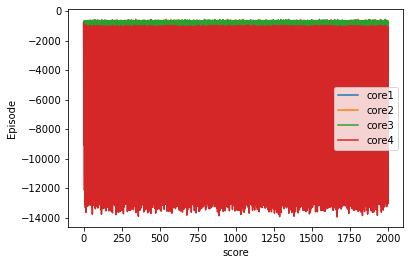

In [ ]:
fig = plt.figure()
x = np.linspace(0, 2, 100)
fig, ax = plt.subplots()
ax.plot(range(len(W1)), W1, label='core1')
ax.plot(range(len(W2)), W2, label='core2')
ax.plot(range(len(W3)), W3, label='core3')
ax.plot(range(len(W4)), W4, label='core4')
#ax.plot(range(len(L)), L, label='L')
ax.set_xlabel('score')
ax.set_ylabel('Episode')
#ax.set_title("My Plot")
ax.legend()

In [ ]:
def discount_rewards(rewards_temp, gamma):
    discounted_rewards = np.zeros_like(rewards_temp)
    running_sum = 0
    for t in (range(len(rewards_temp))):
        running_sum = running_sum * gamma - rewards_temp[t]
        discounted_rewards[t] = running_sum/100
    return discounted_rewards

<Figure size 432x288 with 0 Axes>

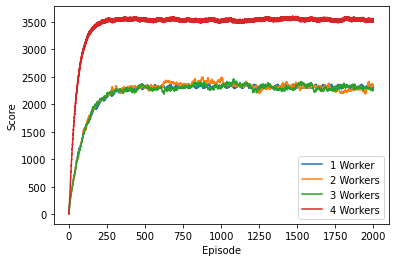

In [ ]:
d1 = discount_rewards(W1, 0.99)
d2 = discount_rewards(W2, 0.99)
d3 = discount_rewards(W3, 0.99)
d4 = discount_rewards(W4, 0.98)
#d5 = discount_rewards(L, 0.99)
fig = plt.figure()
fig, ax = plt.subplots()
ax.plot(range(len(d1)), d1, label='1 Worker')
ax.plot(range(len(d2)), d2, label='2 Workers')
ax.plot(range(len(d3)), d3, label='3 Workers')
ax.plot(range(len(d4)), d4, label='4 Workers')
#ax.plot(range(len(d5)), d5, label='L')
ax.set_xlabel('Episode')
ax.set_ylabel('Score')
#ax.set_title("My Plot")
ax.legend()

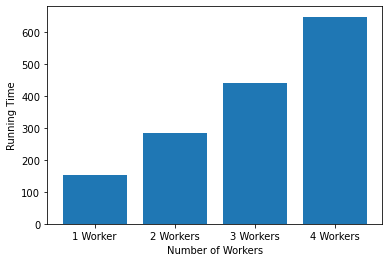

In [ ]:
Running_Time = [152.38, 285.55, 440.98, 648.54]
labels = ["1 Worker", "2 Workers", "3 Workers", "4 Workers"]
plt.bar(labels, Running_Time)
plt.xlabel("Number of Workers")
plt.ylabel("Running Time")
#plt.title("Bar Chart")
plt.show()

In [1]:
!git init

Initialized empty Git repository in C:/Users/17789/.git/


In [3]:
!git config --global user.email amirsepahi@uvic.ca

In [4]:
!git config --global user.name sepamir

In [ ]:
!git add -A